<h1><center>Lending Club Case Study</center></h1>

## Importing the libraries and setting universal parameters

In [1]:
# import all required libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.2f}'.format

sns.set_style()

## Loading dataset loan.csv as a dataframe

In [2]:
# import data file
loan_df=pd.read_csv("loan.csv", header=0)
loan_df.head(5) # Take a look at the dataset

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000         4,975.00   36 months   
1  1077430    1314167       2500         2500         2,500.00   60 months   
2  1077175    1313524       2400         2400         2,400.00   36 months   
3  1076863    1277178      10000        10000        10,000.00   36 months   
4  1075358    1311748       3000         3000         3,000.00   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT   24,000.00            Verified  Dec-11   Fully Paid   
1           RENT   30,000.00     Source Verified  Dec-11  Charged Off   
2           RENT   12,252.00        Not Verified  Dec-11   Fully Paid   
3           RENT   49,200.00     Source Verified  Dec-11   Fully Paid   
4           RENT   80,000.00     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state   dti  delinq_2yrs  \
0              Computer    860xx         AZ 27.65            0   
1                  bike    309xx         GA  1.00            0   
2  real estate business    606xx         IL  8.72            0   
3              personel    917xx         CA 20.00            0   
4              Personal    972xx         OR 17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                   35.00   
4           Jan-96               0                   38.00   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
0                   f       0.00           0.00     5,863.16         5,833.84   
1                   f       0.00           0.00     1,008.71         1,008.71   
2                   f       0.00           0.00     3,005.67         3,005.67   
3                   f       0.00           0.00    12,231.89        12,231.89   
4                   f     524.06         524.06     3,513.33         3,513.33   

   total_rec_prncp  total_rec_int  tota

In [3]:
# Checking the shape of dataset
loan_df.shape

(39717, 111)

In [4]:
#Check the datatypes of all the columns of the dataframe
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

<h2><center>Data Cleaning</center></h2>

### Checking for misssing column values

As first glance from above loan_df information, we can see there are many 0 non-null records are present.<br>
Let's check percentage of non-null columns as well to get clear understanding

In [5]:
# not-null value checks in percentage terms
nulls = round(100*loan_df.isnull().sum()/len(loan_df.index),2)

#set the maximum number of rows to be displayed when printing a pandas DataFrame or Series to 500
pd.options.display.max_rows = 500

# Create a temp data frame to hold null percentage data
null_per=pd.DataFrame({'Null Value Percentage': nulls })
null_per[null_per['Null Value Percentage'] != 0.0]

Null Value Percentage
emp_title                                        6.19
emp_length                                       2.71
desc                                            32.58
title                                            0.03
mths_since_last_delinq                          64.66
mths_since_last_record                          92.99
revol_util                                       0.13
last_pymnt_d                                     0.18
next_pymnt_d                                    97.13
last_credit_pull_d                               0.01
collections_12_mths_ex_med                       0.14
mths_since_last_major_derog                    100.00
annual_inc_joint                               100.00
dti_joint                                      100.00
verification_status_joint                      100.00
tot_coll_amt                                   100.00
tot_cur_bal                                    100.00
open_acc_6m                                    100.00
open_il_6m                                     100.00
open_il_12m                                    100.00
open_il_24m                                    100.00
mths_since_rcnt_il                             100.00
total_bal_il                                   100.00
il_util                                        100.00
open_rv_12m                                    100.00
open_rv_24m                                    100.00
max_bal_bc                                     100.00
all_util                                       100.00
total_rev_hi_lim                               100.00
inq_fi                                         100.00
total_cu_tl                                    100.00
inq_last_12m                                   100.00
acc_open_past_24mths                           100.00
avg_cur_bal                                    100.00
bc_open_to_buy                                 100.00
bc_util                                        100.00
chargeoff_within_12_mths                         0.14
mo_sin_old_il_acct                             100.00
mo_sin_old_rev_tl_op                           100.00
mo_sin_rcnt_rev_tl_op                          100.00
mo_sin_rcnt_tl                                 100.00
mort_acc                                       100.00
mths_since_recent_bc                           100.00
mths_since_recent_bc_dlq                       100.00
mths_since_recent_inq                          100.00
mths_since_recent_revol_delinq                 100.00
num_accts_ever_120_pd                          100.00
num_actv_bc_tl                                 100.00
num_actv_rev_tl                                100.00
num_bc_sats                                    100.00
num_bc_tl                                      100.00
num_il_tl                                      100.00
num_op_rev_tl                                  100.00
num_rev_accts                                  100.00
num_rev_tl_bal_gt_0                            100.00
num_sats                                       100.00
num_tl_120dpd_2m                               100.00
num_tl_30dpd                                   100.00
num_tl_90g_dpd_24m                             100.00
num_tl_op_past_12m                             100.00
pct_tl_nvr_dlq                                 100.00
percent_bc_gt_75                               100.00
pub_rec_bankruptcies                             1.75
tax_liens                                        0.10
tot_hi_cred_lim                                100.00
total_bal_ex_mort                              100.00
total_bc_limit                                 100.00
total_il_high_credit_limit                     100.00

Looking at percentage of non-null columns, we can see majority of columns have 100 percent null data.</br>
Also there are columns like mths_since_last_delinq, mths_since_last_record and next_pymnt_d where null-value percentage is more than 50 </br>
These columns are of no use for us to Analyse. Hence we can drop all those columns where null percentage is > 50.

In [6]:
# dropping the columns with more than 50% Null Values
lab1 = loan_df.columns[nulls>50.0]
loan_df.drop(labels = lab1, axis=1, inplace=True)

In [7]:
loan_df.shape

(39717, 54)

Well that's good. Half of the columns are gone after removing those which are not required for us.</br>
Let's go further deep into our Analysis by taking look at some random 5 records.

In [8]:
loan_df.sample(5) # to get5 random records

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
1532   1049271    1280483       1200         1200         1,200.00   
34527   450579     554340       5500         5500         5,500.00   
16810   725933     921253      13500        13500        13,475.00   
21895   635024     813477       4000         4000         3,425.00   
32335   483590     615413       4800         4800         4,725.00   

             term int_rate  installment grade sub_grade  \
1532    36 months   13.49%        40.72     C        C1   
34527   36 months   14.96%       190.55     D        D2   
16810   36 months    7.66%       420.93     A        A5   
21895   36 months    5.79%       121.31     A        A2   
32335   36 months   10.62%       156.29     B        B3   

                                 emp_title emp_length home_ownership  \
1532                     APM Terminals, NA    4 years       MORTGAGE   
34527                                 PPDG    7 years       MORTGAGE   
16810             St Joseph Mercy Hospital    3 years       MORTGAGE   
21895                Tech Data Corporation    2 years       MORTGAGE   
32335  Tallahassee Primary Care Associates    2 years           RENT   

       annual_inc verification_status issue_d loan_status pymnt_plan  \
1532    60,000.00        Not Verified  Dec-11  Fully Paid          n   
34527   52,000.00        Not Verified  Oct-09  Fully Paid          n   
16810   34,000.00            Verified  Apr-11  Fully Paid          n   
21895   75,000.00            Verified  Dec-10  Fully Paid          n   
32335   14,400.00        Not Verified  Feb-10  Fully Paid          n   

                                                     url  \
1532   https://lendingclub.com/browse/loanDetail.acti...   
34527  https://lendingclub.com/browse/loanDetail.acti...   
16810  https://lendingclub.com/browse/loanDetail.acti...   
21895  https://lendingclub.com/browse/loanDetail.acti...   
32335  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
1532     Borrower added on 12/01/11 > Looking to add ...    home_improvement   
34527   554340 added on 10/10/09 > TRY TO PAY OFF ALL...  debt_consolidation   
16810                                                NaN               other   
21895    Borrower added on 12/22/10 > Please provide ...                 car   
32335                                                     debt_consolidation   

                              title zip_code addr_state   dti  delinq_2yrs  \
1532               Home Improvement    282xx         NC 22.40            0   
34527                       FREEDOM    320xx         FL 18.74            0   
16810                          Home    488xx         MI  8.96            0   
21895                   Aaron's Car    760xx         TX 10.75            0   
32335  Rosemary Katherine Elizabeth    323xx         FL  3.33            0   

      earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
1532            Sep-00               1         9        0      10980   
34527           Aug-98               2        11        0      10655   
16810           Oct-01               1         7        0       3743   
21895           Apr-97               2        13        0      15294   
32335           Mar-03               1         2        0       1977   

      revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv  \
1532      94.70%         20                   f       0.00           0.00   
34527     58.20%         37                   f       0.00           0.00   
16810     16.10%         12                   f       0.00           0.00   
21895     32.90%         36                   f       0.00           0.00   
32335     23.80%          4                   f       0.00           0.00   

       total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
1532      1,213.78         1,213.78         1,200.00          13.78   
34527     6,825.07   

id, member_id and url columns looks like unique identifiers for borrowers. </br>
These might not be helpful in providing any useful insights</br>
Hence dropping columns id , member_id and url

In [9]:
# dropping columns id , member_id and url
loan_df = loan_df.drop(columns=['id','member_id','url'])

Looking at dataset there are few columns where a unique value is populated all over the column. </br>
Let's check how many such columns are present

In [10]:
unique_val_col_list=[c for c in loan_df.columns if len(loan_df[c].unique()) <= 1]
loan_df[unique_val_col_list[:]].value_counts()

pymnt_plan  initial_list_status  policy_code  application_type  acc_now_delinq  delinq_amnt
n           f                    1            INDIVIDUAL        0               0              39717
dtype: int64

In [11]:
# print data in cols unique_val_col_list before dropping these columns
[loan_df[c].value_counts() for c in unique_val_col_list]

[n    39717
 Name: pymnt_plan, dtype: int64,
 f    39717
 Name: initial_list_status, dtype: int64,
 1    39717
 Name: policy_code, dtype: int64,
 INDIVIDUAL    39717
 Name: application_type, dtype: int64,
 0    39717
 Name: acc_now_delinq, dtype: int64,
 0    39717
 Name: delinq_amnt, dtype: int64]

In [12]:
# Drop the columns where a unique value is populated all over the column.
loan_df = loan_df.drop(columns=unique_val_col_list)

Let's do describe at loan_df data frame to check how integer columns data is present

In [13]:
loan_df.describe()

loan_amnt  funded_amnt  funded_amnt_inv  installment   annual_inc  \
count  39,717.00    39,717.00        39,717.00    39,717.00    39,717.00   
mean   11,219.44    10,947.71        10,397.45       324.56    68,968.93   
std     7,456.67     7,187.24         7,128.45       208.87    63,793.77   
min       500.00       500.00             0.00        15.69     4,000.00   
25%     5,500.00     5,400.00         5,000.00       167.02    40,404.00   
50%    10,000.00     9,600.00         8,975.00       280.22    59,000.00   
75%    15,000.00    15,000.00        14,400.00       430.78    82,300.00   
max    35,000.00    35,000.00        35,000.00     1,305.19 6,000,000.00   

            dti  delinq_2yrs  inq_last_6mths  open_acc   pub_rec  revol_bal  \
count 39,717.00    39,717.00       39,717.00 39,717.00 39,717.00  39,717.00   
mean      13.32         0.15            0.87      9.29      0.06  13,382.53   
std        6.68         0.49            1.07      4.40      0.24  15,885.02   
min        0.00         0.00            0.00      2.00      0.00       0.00   
25%        8.17         0.00            0.00      6.00      0.00   3,703.00   
50%       13.40         0.00            1.00      9.00      0.00   8,850.00   
75%       18.60         0.00            1.00     12.00      0.00  17,058.00   
max       29.99        11.00            8.00     44.00      4.00 149,588.00   

       total_acc  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  \
count  39,717.00  39,717.00      39,717.00    39,717.00        39,717.00   
mean       22.09      51.23          50.99    12,153.60        11,567.15   
std        11.40     375.17         373.82     9,042.04         8,942.67   
min         2.00       0.00           0.00         0.00             0.00   
25%        13.00       0.00           0.00     5,576.93         5,112.31   
50%        20.00       0.00           0.00     9,899.64         9,287.15   
75%        29.00       0.00           0.00    16,534.43        15,798.81   
max        90.00   6,311.47       6,307.37    58,563.68        58,563.68   

       total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
count        39,717.00      39,717.00           39,717.00   39,717.00   
mean          9,793.35       2,263.66                1.36       95.22   
std           7,065.52       2,608.11                7.29      688.74   
min               0.00           0.00                0.00        0.00   
25%           4,600.00         662.18                0.00        0.00   
50%           8,000.00       1,348.91                0.00        0.00   
75%          13,653.26       2,833.40                0.00        0.00   
max          35,000.02      23,563.68              180.20   29,623.35   

       collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
count                39,717.00        39,717.00                   39,661.00   
mean                     12.41         2,678.83                        0.00   
std                     148.67         4,447.14                        0.00   
min                       0.00             0.00                        0.00   
25%                       0.00           218.68                        0.00   
50%                       0.00           546.14                        0.00   
75%                       0.00         3,293.16                        0.00   
max                   7,002.19        36,115.20                        0.00   

       chargeoff_within_12_mths  pub_rec_bankruptcies  tax_liens  
count                 39,661.00             39,020.00  39,678.00  
mean                       0.00                  0.04       0.00  
std                        0.00                  0.20       0.00  
min                        0.00                  0.00       0.00  
25%                        0.00                  0.00       0.00  
50%                        0.00                  0.00       0.00  
75%                        0.00                  0.00       0.00  
max                

In [14]:
print(loan_df['collections_12_mths_ex_med'].value_counts(dropna=False))
print(loan_df['tax_liens'].value_counts(dropna=False))
print(loan_df['chargeoff_within_12_mths'].value_counts(dropna=False))

0.00    39661
NaN        56
Name: collections_12_mths_ex_med, dtype: int64
0.00    39678
NaN        39
Name: tax_liens, dtype: int64
0.00    39661
NaN        56
Name: chargeoff_within_12_mths, dtype: int64


As we can obsere columns collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens have majority populated as value 0. </br>
</n>
This kind of information provided is not at all usefull for Analysis and hence dropping these columns

In [15]:
# Dropping all the columns observed to be redundant

loan_df = loan_df.drop(columns=['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'])

Few more observations from visual inspection</n>
- Column zipcode has masking 'xx' at end of value. Which will not be usefull in doing analysis based on location. We can use addr_state column for this purpose. Hence we can drop zipcode column
- columns desc, title are user filled columns and have many unique values depending on what the user has provided. We can drop these columns. 
- Though purpose is also user filled, purpose looks like LC provided selected pre-defined options for borrower to select . Hence we can keep this column

In [16]:
# Dropping all the columns observed to be redundant

loan_df = loan_df.drop(columns=['desc', 'title', 'zip_code'])

Let's Again check the null values percentage on remaining columns and print only those columns where percentage is not equal to 0.

In [17]:
# not-null value checks in percentage terms
nulls = round(100*loan_df.isnull().sum()/len(loan_df.index),2)

#set the maximum number of rows to be displayed when printing a pandas DataFrame or Series to 500
pd.options.display.max_rows = 500

# Create a temp data frame to hold null percentage data
null_per=pd.DataFrame({'Null Value Percentage': nulls })
null_per[null_per['Null Value Percentage'] != 0.0]

Null Value Percentage
emp_title                              6.19
emp_length                             2.71
revol_util                             0.13
last_pymnt_d                           0.18
last_credit_pull_d                     0.01
pub_rec_bankruptcies                   1.75

#### We can observe that still there are few columns which has NULL values with top 2 being `emp_title` and `emp_length` with 6.19% and 2.71% NULL values respectively.

Let's analyze emp_title first

In [18]:
loan_df.emp_title.value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [19]:
print('Total number of unique values present in emp_title : ',len(loan_df.emp_title.unique()))
print('Maximum numer of values of emp_title are present for "',loan_df.emp_title.mode()[0],'" with value of ' , len(loan_df[(loan_df['emp_title']==loan_df.emp_title.mode()[0])]))

Total number of unique values present in emp_title :  28821
Maximum numer of values of emp_title are present for " US Army " with value of  134


As we observe, emp_title is with 28820 distinct values with top applicats are from " US Army " with value of  134 </n> 
Hence it may not provide insight of how it weights loan_status.

In [20]:
# Hence we can drop emp_title column

loan_df = loan_df.drop(columns='emp_title')

#### Column `pub_rec_bankruptcies` has 1.76% of NaN values. These can be either imputed or dropped based on the kind of values in this column.

In [21]:
loan_df.pub_rec_bankruptcies.value_counts(dropna=False, normalize=True)*100

0.00   94.01
1.00    4.21
NaN     1.75
2.00    0.02
Name: pub_rec_bankruptcies, dtype: float64

Although `0` is the most occuring value at 94%, we cannot impute the NaNs by 0 (as it is mode) because it would imply that those customers have not had any  bankruptcies record in the past. Instead we can impute it by some value which denotes "No information available":

Let's go with most famous 404 error code for data not available.

-404 : Denotes the records where no information is available`

In [22]:
loan_df.pub_rec_bankruptcies.fillna(-404, inplace=True)

#### Before proceeding futher lets once again take a look at remaining columns.

In [23]:
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

#### After going through all these columns using data dictionary we can segregate these columns into 3 categories.
#### This classification is done based on domain (loan/credit card) knowledge, description of the column and to identify variables which can help in finding defaulters or non-defaluters

#### These can be classified as:-

#### -  1. `Applicant Demographic Variables` : These are related to the applicants. During the time of application these are filled by applicant self.
#### -  2. `The characteristics of the loan`   : These describe the kind of loans and all its characteristics. Also can have infomartion about on what basis a loan is approved like Grades. 
#### -  3. `Customer behaviour variables`  :  These are the variables which can occur only after the loan has been approved

#### Apart from 3 kinds of variables we need to identity target variable - for us which is loan_status. As based on this column only we can say whether a applicant is defaulter or non-defaulter

### Since we have to identify the `defaulting parameters` while it being processed by the LC i.e. before the loan is approved/rejected, we can neglect all the customer behaviour variables.


Let's prepare a list of all different variables by category.

In [24]:
# List of Applicant Demographic Variables

applicant_demographic_variables = ['addr_state']

# List of The characteristics of the loan

Loan_Characterized_variables = ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_length',
                                'home_ownership','annual_inc','verification_status','issue_d','purpose','dti','pub_rec_bankruptcies']

#List of Customer behaviour variables

cust_behaviour_variables = ['last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'collection_recovery_fee', 'recoveries',
                            'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
                            'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'open_acc','delinq_2yrs',
                            'earliest_cr_line', 'inq_last_6mths','pub_rec']

# target variable

target_variable=['loan_status']

#### Dropping the columns which denote customer behaviour:-

In [25]:
# Dropping all customer behaviour related parameters

loan_df.drop(cust_behaviour_variables, axis=1, inplace=True)

In [26]:
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

#### As we figured out our target variable should be loan_status, Let us see what values are populated in it

In [27]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Here Fully Paid means non-defaulter and Charged Off means defaulter.</br>
Where loan_status as `Current`cannot purely qualify as either of this. </br>
As our aim is to find variables on to study defaulter or non-defaulter, we can remove `Current` loan status records

In [28]:
# We can remove Current loan_status records as it adds more descrepency to our analysis.
# We can generate insights only from those where the actual due date/loan tenure is completed.
# On-going loan can be considered either of Defaluter or non-defaulter and may provide incorrect results.

loan_df=loan_df[~(loan_df['loan_status']=='Current')]

### Fixing Data types of the remaining columns wherever required

#### 1. The column "term" is an object type column with duration as either `36 months` or `60 months`. So we can remove the string `months` change it to int type

In [29]:
loan_df.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [30]:
loan_df.loc[:,'term'] = loan_df['term'].apply(lambda x : x.strip(' months'))
loan_df.term=loan_df.term.astype("int32")

#### 2. The column `emp_length` is an object type column with emplyment tenure ranging from <1year to 10+ years So we can change it to `int type` and then calculate the `mean/median tenure of the people` to impute the Null values. Or we can drop the rows where it has NULL

In [31]:
#Checking for distinct values in emp_length
loan_df.emp_length.value_counts(dropna=False)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
NaN          1033
Name: emp_length, dtype: int64

In [32]:
loan_df[loan_df.emp_length.isna()].loan_status.value_counts(dropna=False)

Fully Paid     805
Charged Off    228
Name: loan_status, dtype: int64

Looking at distinct values of `emp_length`, `10+years` occurs maximum time, while the 2nd and 3rd most frequent values are diametrically opposite to it at `2years` and `<1years` respectively. So, any imputation might skew our dataset for 1033 applicants. So it is best to drop those rows where the emp_length is NaN.

In [33]:
loan_df = loan_df[loan_df['emp_length'].notnull()]

#### 3. The column "issue_d" is an object type column where as it should actually be date dtype. So let's modify this to date.

In [34]:
# issue_d  is a date column but it is showing as object type. Hence we need to first convert this column into date format            

loan_df.issue_d=pd.to_datetime(loan_df.issue_d, format='%b-%y', errors='coerce')

#### 4. **The column `int_rate`  have a %** sign to denote percentage terms. We'll remove the % sign and change it to **float type**

In [35]:
# int_rate column is considerd in percentage by default. Hence we can remove % symbol from this colum

loan_df.loc[:,'int_rate']=loan_df['int_rate'].apply(lambda x: float(x[:-1]))

### Deriving new metrics which migth be usefull for our Analysis

#### 1. Deriving new column `issue_d_year` from issue_d column.

In [36]:
# Add a new column "Year" by extracting it from issue_d

loan_df['issue_d_year']=pd.DatetimeIndex(loan_df.issue_d).year

In [37]:
# Let's update Loan_Characterized_variables list by adding issue_d_year col and removing issue_d

Loan_Characterized_variables.remove('issue_d')
Loan_Characterized_variables.append('issue_d_year')
Loan_Characterized_variables

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'purpose',
 'dti',
 'pub_rec_bankruptcies',
 'issue_d_year']

#### 2. Though we have `loan_status` as a target variable with 2 unique values as "Fully paid" & "Charged off", It might be easy if we have a column which say whether a person is default or not.
For this purpose let's add a new column `Default`, where 1 denotes charged off and 0 denotes Fully paid

In [38]:
loan_df['Default'] = loan_df.loan_status.apply(lambda x: 1 if x=='Charged Off' else 0)

<h2><center>Univariate Analysis</center></h2>

#### 1. Analysis on on Loan Amount column

#### 1.1 Checking the distribution of various kind of loan amounts to identify the best one for analysis

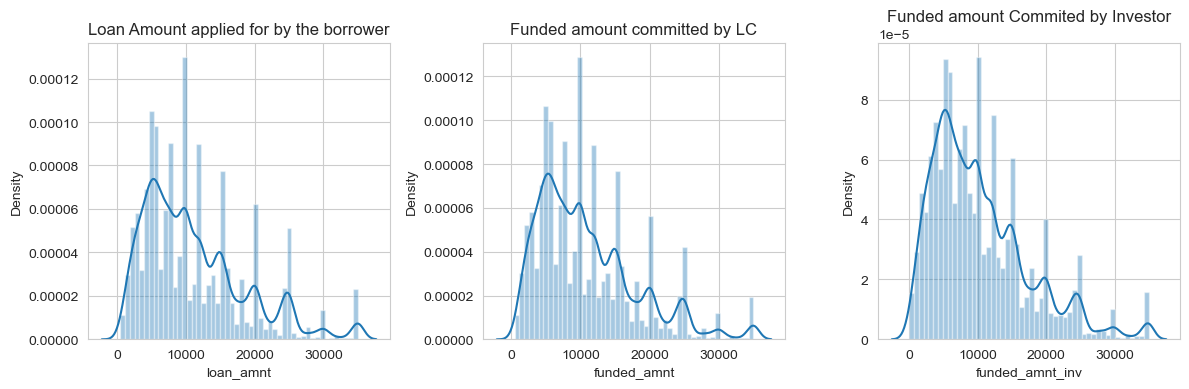

In [39]:
# Set Graph style to whitegrid.
sns.set_style("whitegrid")

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Subplot 1
sns.distplot(loan_df.loan_amnt, hist = True,ax=axes[0])
axes[0].set_title('Loan Amount applied for by the borrower')

# Subplot 2
sns.distplot(loan_df.funded_amnt, hist = True, ax=axes[1])
axes[1].set_title('Funded amount committed by LC')

# Subplot 3
sns.distplot(loan_df.funded_amnt_inv, hist = True, ax=axes[2])
axes[2].set_title('Funded amount Commited by Investor')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

The distribution of these 3 variables is so similar. So for our analysis, We'll consider the **loan_amnt** as the amount of loan taken by the person

In [40]:
# Let's update Loan_Characterized_variables list by removing funded_amnt and funded_amnt_inv as we don't use these for our Analysis

Loan_Characterized_variables.remove('funded_amnt')
Loan_Characterized_variables.remove('funded_amnt_inv')

##### Let's try to find if there are any outlier values present in loan_amnt column.
#### 1.2 As it is the amount of loan taken, we need to check, how loan_amount is distributed among all borrowers

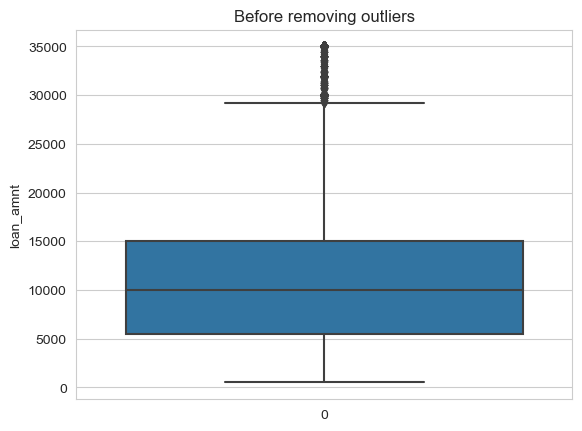

In [41]:
# Plotting box plot for loan_amnt
sns.boxplot(loan_df.loan_amnt)
plt.title("Before removing outliers")
plt.ylabel("loan_amnt")
plt.show()

Let's roughly check how many people are present who borrowed more than 30000

In [42]:
# Calculate IQR and outliers (both upper and lower) for column loan_amnt
quant1, quant2 = loan_df.loan_amnt.quantile([0.25, 0.75])
IQR = quant2 - quant1
print('IQR :', IQR)
lower_outlier=quant1 - ( 1.5 * IQR )
upper_outlier=quant2 + ( 1.5 * IQR )
print('lower_outlier :', lower_outlier)
print('upper_outlier :', upper_outlier)

IQR : 9500.0
lower_outlier : -8750.0
upper_outlier : 29250.0


In [43]:
len(loan_df[loan_df.loan_amnt>upper_outlier]) # Number of people who took loan more than upper outlier

1078

In [44]:
# check number of people who cleared loans present above upper_outlier
loan_df[loan_df.loan_amnt>upper_outlier].loan_status.value_counts()

Fully Paid     831
Charged Off    247
Name: loan_status, dtype: int64

#### As we can observed, out of 37544 people who took loan, about 3.5 percent people are present who took loan amount >  29250.0
#### Out of these 3.5 percent people around 80 percent of the people are non-defaulters.
####  These set of people might skew our Analysis and may not be usefull for our Analysis. Hence we can drop these set of people.

####  obsevation: People who took  loan amount >  29250.0 are outliers and cannot can skew our analysis

In [45]:
# Create a backup dataframe loan_df_loan_amnt_outliers before removing outlier records.
# If required we can analyse these set of people as seperate category
loan_df_loan_amnt_outliers=loan_df[loan_df.loan_amnt>=upper_outlier]

# Removing outlier records.
loan_df=loan_df[loan_df.loan_amnt<upper_outlier]

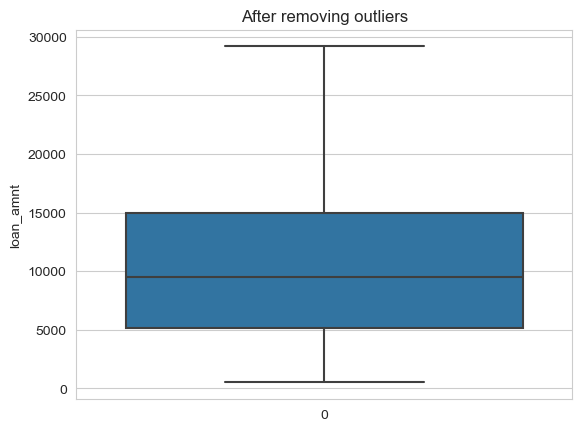

In [46]:
# Let's once again check how loan amount is distributed now
sns.boxplot(loan_df.loan_amnt)
plt.title("After removing outliers")
plt.ylabel("loan_amnt")
plt.show()

#### 2. Checking distribution of home_ownership. 

In [47]:
# Check values of home_ownership. As per the data dictonary the possible values should be RENT, MORTGAGE, OWN and OTHER  
loan_df.home_ownership.value_counts()

RENT        17802
MORTGAGE    15850
OWN          2713
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [48]:
# checking data for **NONE** home_ownership

loan_df[loan_df.home_ownership=='NONE']

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
39318      10000        10000         1,228.06    36      7.75       312.22   
39659       4000         4000         1,925.00    36      9.64       128.41   
39660       2800         2800         1,625.00    36      8.70        88.65   

      grade sub_grade emp_length home_ownership  annual_inc  \
39318     A        A3    5 years           NONE   22,200.00   
39659     B        B4   < 1 year           NONE  100,000.00   
39660     B        B1   < 1 year           NONE  120,000.00   

      verification_status    issue_d loan_status             purpose  \
39318        Not Verified 2008-01-01  Fully Paid  debt_consolidation   
39659        Not Verified 2007-08-01  Fully Paid               other   
39660        Not Verified 2007-08-01  Fully Paid               other   

      addr_state   dti  pub_rec_bankruptcies  issue_d_year  Default  
39318         VA  5.24               -404.00          2008        0  
39659         CA 15.00               -404.00          2007        0  
39660         MA 15.00               -404.00          2007        0

As per the data dictonary the possible values should be RENT, MORTGAGE, OWN and OTHER.</br>
But there are 3 records with home_ownership as NONE and all these are non-defaulters.
We can mark these records as invalid as these may provide incorrect results and also the count is very less.

In [49]:
# Dropping records where home_ownership = NONE

loan_df = loan_df[~(loan_df['home_ownership']=='NONE')]

In [50]:
# As Data cleaning is completed lets reset the Index.

loan_df.reset_index(inplace=True, drop=True)

In [51]:
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36463 entries, 0 to 36462
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36463 non-null  int64         
 1   funded_amnt           36463 non-null  int64         
 2   funded_amnt_inv       36463 non-null  float64       
 3   term                  36463 non-null  int32         
 4   int_rate              36463 non-null  float64       
 5   installment           36463 non-null  float64       
 6   grade                 36463 non-null  object        
 7   sub_grade             36463 non-null  object        
 8   emp_length            36463 non-null  object        
 9   home_ownership        36463 non-null  object        
 10  annual_inc            36463 non-null  float64       
 11  verification_status   36463 non-null  object        
 12  issue_d               36463 non-null  datetime64[ns]
 13  loan_status     

### 3. Default Rate Percentage

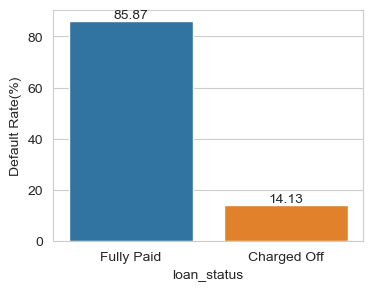

In [52]:
plt.figure(figsize=[4,3])
ax = sns.barplot( data=loan_df, x="loan_status", y="Default", estimator=lambda x: len(x) / len(loan_df) * 100)
plt.ylabel('Default Rate(%)', fontsize=10) 

# Add annotations
for p in ax.patches:
    height = round(p.get_height(),2)
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

    
plt.show()

#### Conclusion 1 : Around 14 percent of the loans are defaulted

### Defining functions to plot variables with target variable for easier approach

#### Defining function to plot variables w.r.t defaulters and non-defaulters counts

In [53]:
# Defining a Function to plot the count of defaulted(Charged Off Loans) across various variables
size=(30,5)
def plot_defaulted_counts(col, s=size, hues=None):
    
    """
    Plot the count of defaulted (Charged Off Loans) across various variables.

    Parameters:
    - data: The column of a loan data frame loan_df

    Returns:
    - height
    """
    # figure display settings
    
    plt.figure(figsize=s)
    sns.set(style="darkgrid")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.set_color_codes("muted")

    # Plotting bar plot input column to show defaulted count
        
    ax = sns.barplot(x=col, y="Default", data=loan_df.sort_values(col), hue=hues, 
                     estimator= lambda x: len(x)/len(loan_df)*100,
                     palette='tab10', ci=None)

    # Adding title and x & y labels
        
    plt.title(f'Loan Status v/s {col.title()}')    
    plt.ylabel('Percentage count of Loans', fontsize=17)
    plt.xlabel(col.title(), fontsize=17)

    # Add annotations
    
    for p in ax.patches:
        height = round(p.get_height(),2)
        hei = str(height)+'%'
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(hei, (x, y), ha='center')
        
    return plt.show()

#### Defining function to create plots for variable w.r.t Default rate (Says how much percent are defaulters)

In [54]:
# Defining a Function to plot the default rate across various variables
# This say how much percent is defaulted for a particular variable.

size=(30,5)

def create_plot_default_rate(col, s=size, hues=None):
    
    """
    Plot the default rate across various variables.

    Parameters:
    - data: The column of a loan data frame loan_df

    Returns:
    - None
    """
    # figure display settings
    
    plt.figure(figsize=s)
    sns.set(style="darkgrid")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.set_color_codes("muted")
    
    # Create a new temprary dataframe "grouping_tmp" for input column
    
    grouping_tmp = loan_df.groupby([col, 'Default']).Default.count().unstack().reset_index()
    grouping_tmp['Total'] = grouping_tmp[0] + grouping_tmp[1]
    grouping_tmp['default_rate'] = grouping_tmp[1] / grouping_tmp['Total']*100
    grouping_tmp.sort_values('default_rate', ascending=False)
    
    # Plotting bar plot for temp data frame created based on input column
    
    ax = sns.barplot(x=col, y="default_rate", data=grouping_tmp, hue=hues, palette='tab10', ci=None)
    
    # Adding title and x & y labels
    
    plt.title(f'Comparison between Default rate and the {col.title()}')
    plt.ylabel('Default Rate(%)', fontsize=17)
    plt.xlabel(col.title(), fontsize=17)

    # Add annotations
    
    for p in ax.patches:
        height = round(p.get_height(),2)
        hei = str(height) + '%'
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(hei, (x, y),ha='right')
        
    return plt.show()

### 4.1 Comparing Default Rate across every categorical variable

In [55]:
target_var = ['loan_status', 'Default']

categorical_var = ['term', 'issue_d_year', 'purpose', 'verification_status', 'home_ownership', 'emp_length', 'grade', 'sub_grade', 'addr_state']

numerical_var = ['loan_amnt', 'dti', 'annual_inc', 'installment', 'int_rate', 'pub_rec_bankruptcies']

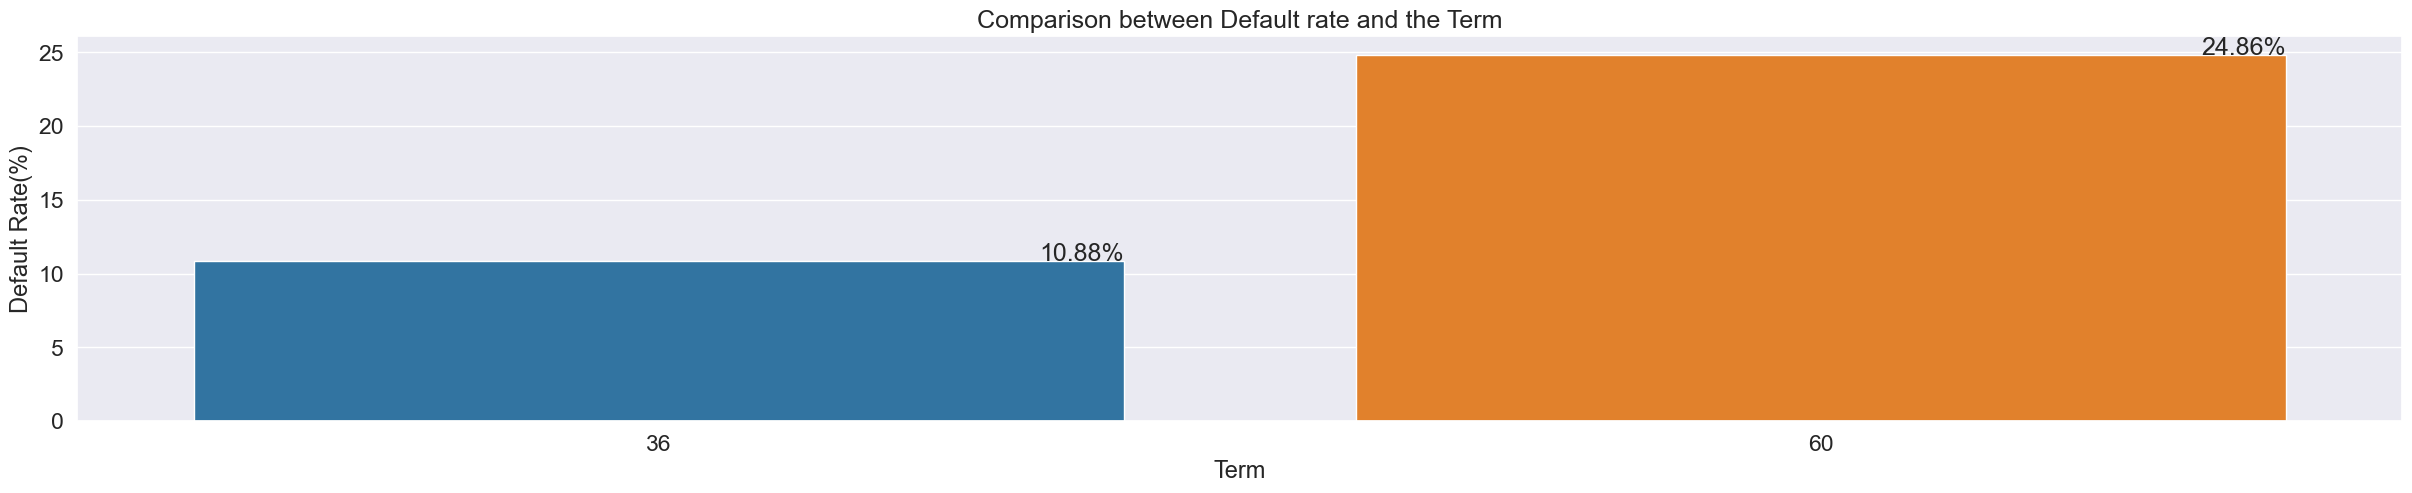

In [56]:
create_plot_default_rate('term', s=(30,5))

1. In Graph *"Comparision between Default rate and the Term"* Around 10.88% of the loans given for 36 months are defaulted whereas 24.86% of the loans given for a duration of 60 months are defaulted. </br>
Therefore, **loans should be given for shorter terms as loans given for longer periods like 60 months are more likely to be defaulter**. 

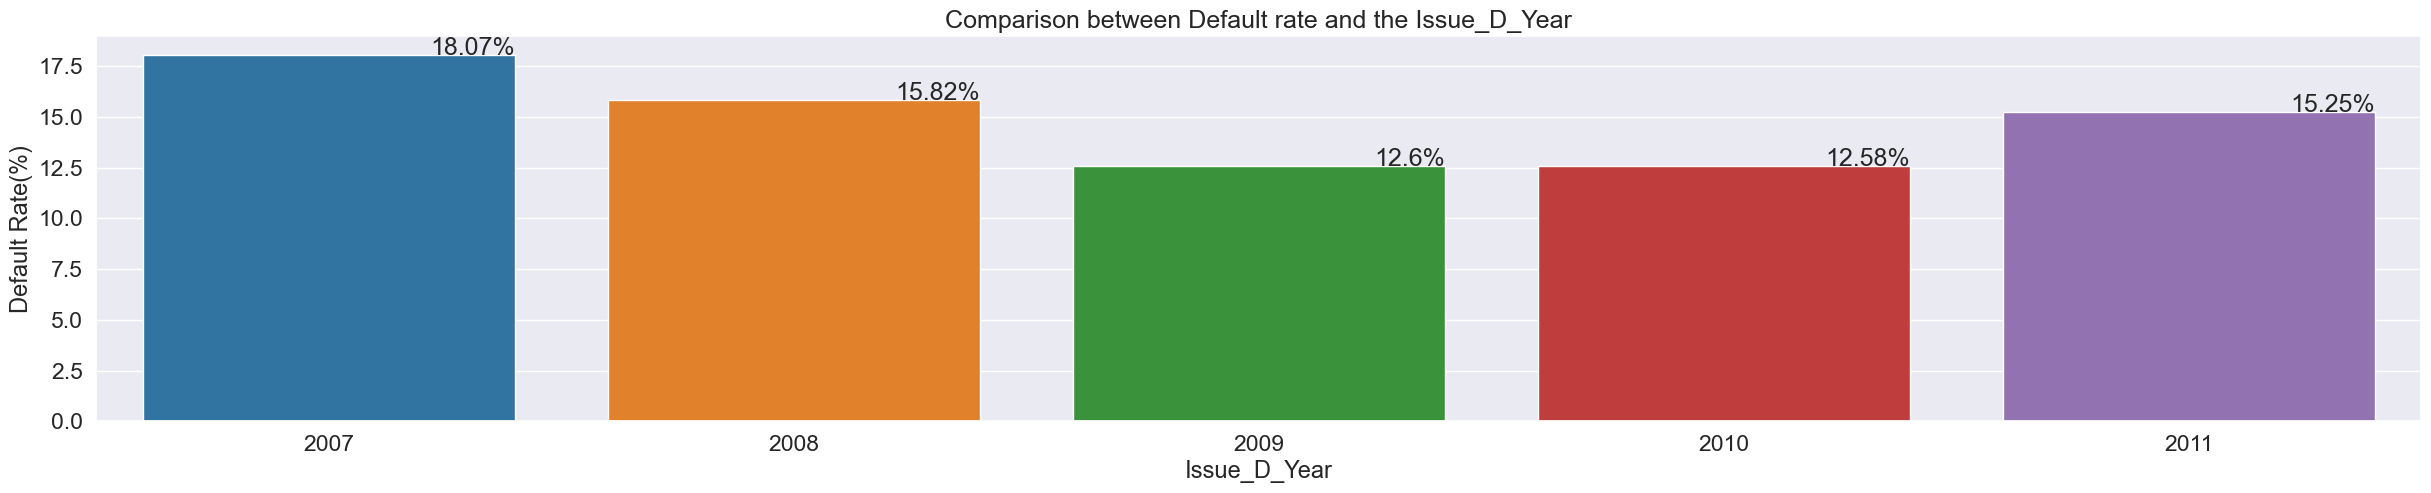

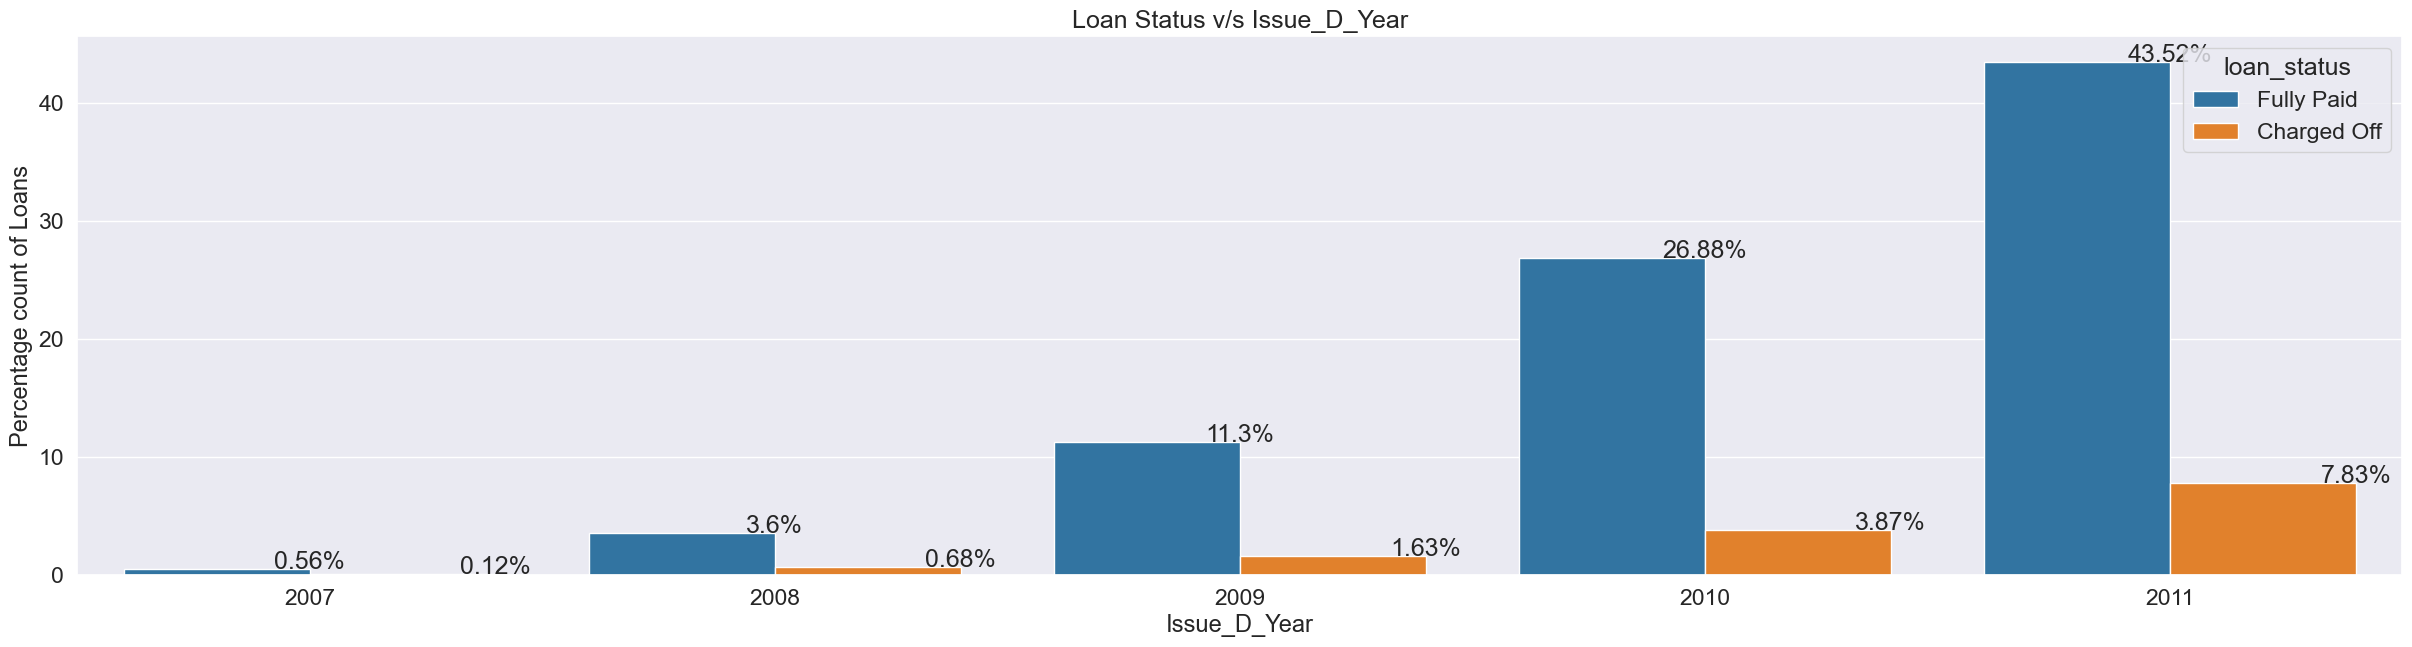

In [57]:
create_plot_default_rate('issue_d_year', s=(30,5))
plot_defaulted_counts('issue_d_year', s=(30,7), hues='loan_status')

2. In Graph *"Comparision between Default rate and the Issue_D_Year"* we can see **highest default rate is observed in 2007 and there on default rate is decreasing**. This is a very clear trend due to recession of 2008 and led to more defaults especially on loans on the mortgaged property. After it, banks were more cautious. That is why the number of fully paid loans also goes up.
</br>

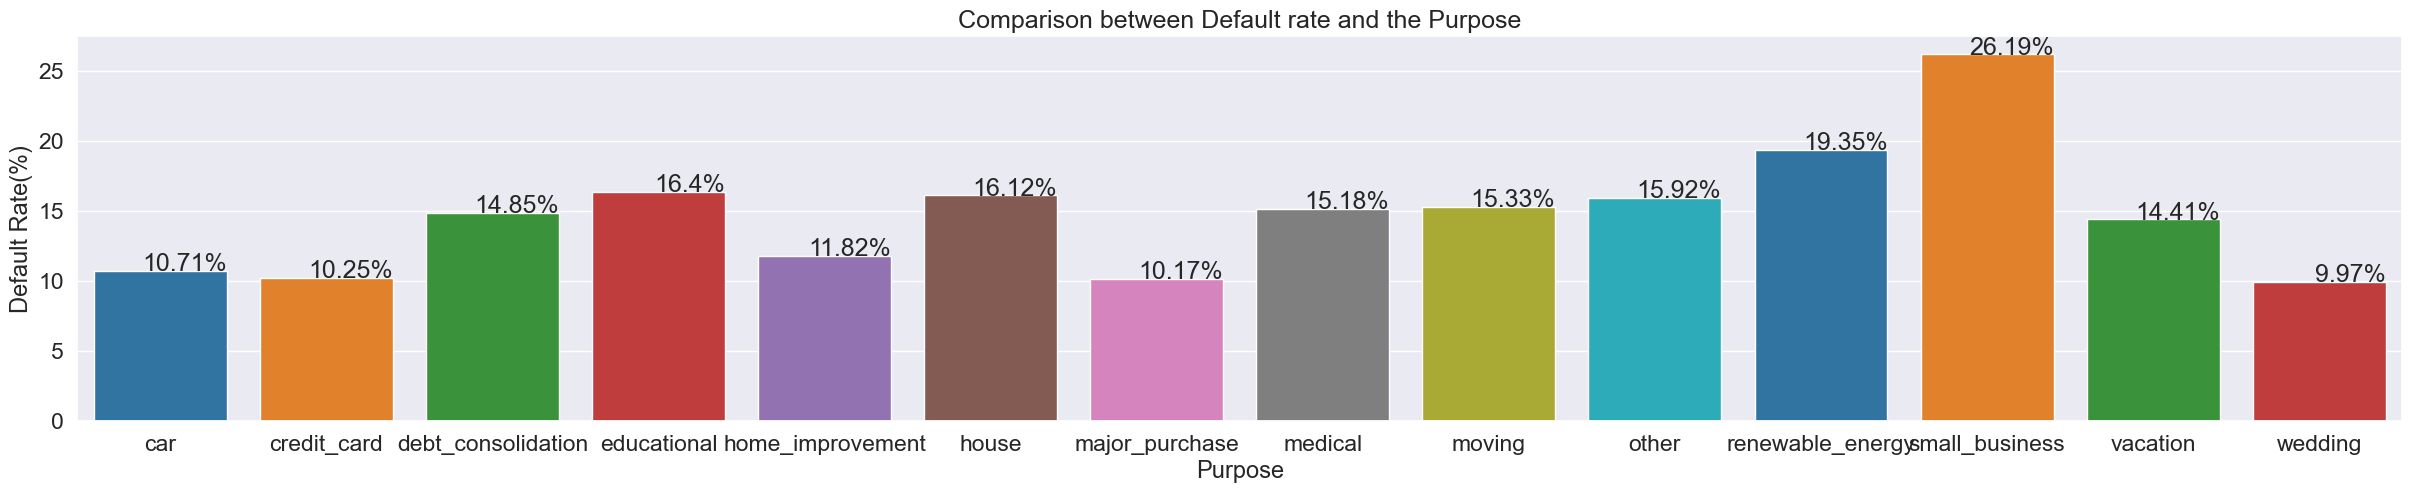

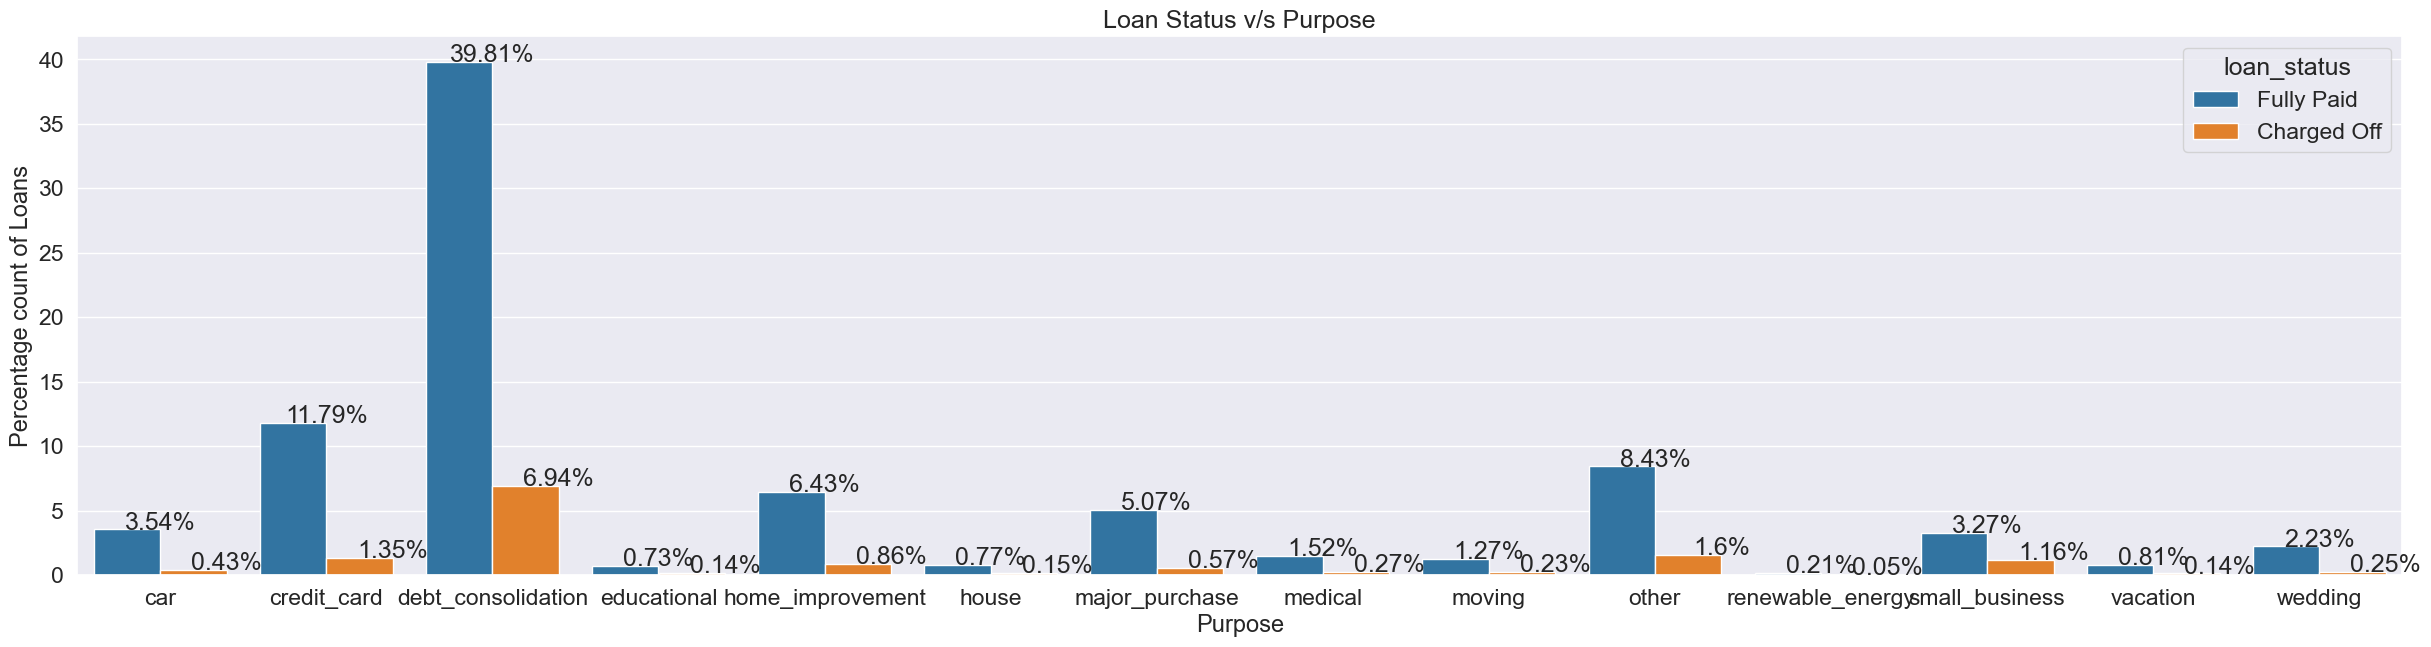

In [58]:
create_plot_default_rate('purpose', s=(30,5))
plot_defaulted_counts('purpose', s=(30,7), hues='loan_status')

3. In Graph *"Comparision between Default rate and the Purpose"* We can observe most of the *Purpose* of loans are hovering between 10 and 15 percent. On top is small_business with 26.19% defaulted next to renewable_energy with "19.35". **Just these 2 purposes namely "small_business" and "renewable_energy" are contributing to almost 45.5% of Defaulters**.
- Interestingly we can also observe that loans taken on **purpose of wedding or on credit_cards, cars and major_purchaces stand at bottom with higher pay-off rate**</br>
- So while providing loans for small_business/renewable_energy, should be carefull.</n>
</br>

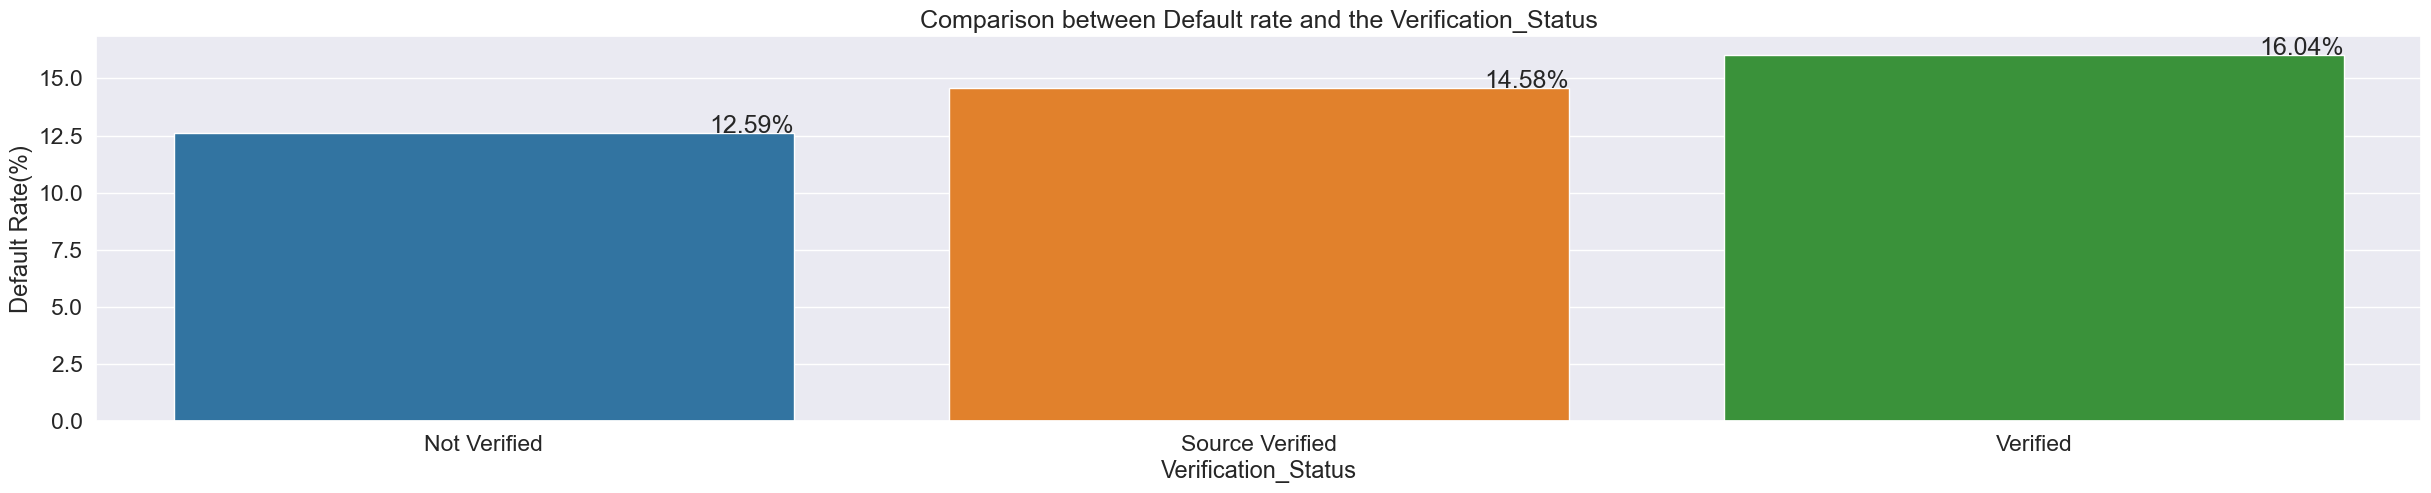

In [59]:
create_plot_default_rate('verification_status', s=(30,5))

4. In Graph *"Comparision between Default rate and the Verification_status"*, though there is no much difference beween percentages of defaulters of all 3 verifications_status, But it surprising to see **verified** annual_income people has more default rate. 
- Meaning out of 100 people whose income status is verified, 16 people are most likely to default, where as if those 100 people status is not verified, then 14 people are likely to default. 
- It is quite contradictory. Will be interesting to see how this depends on annual income and will check this in bivariate analysis.</n>
</br>

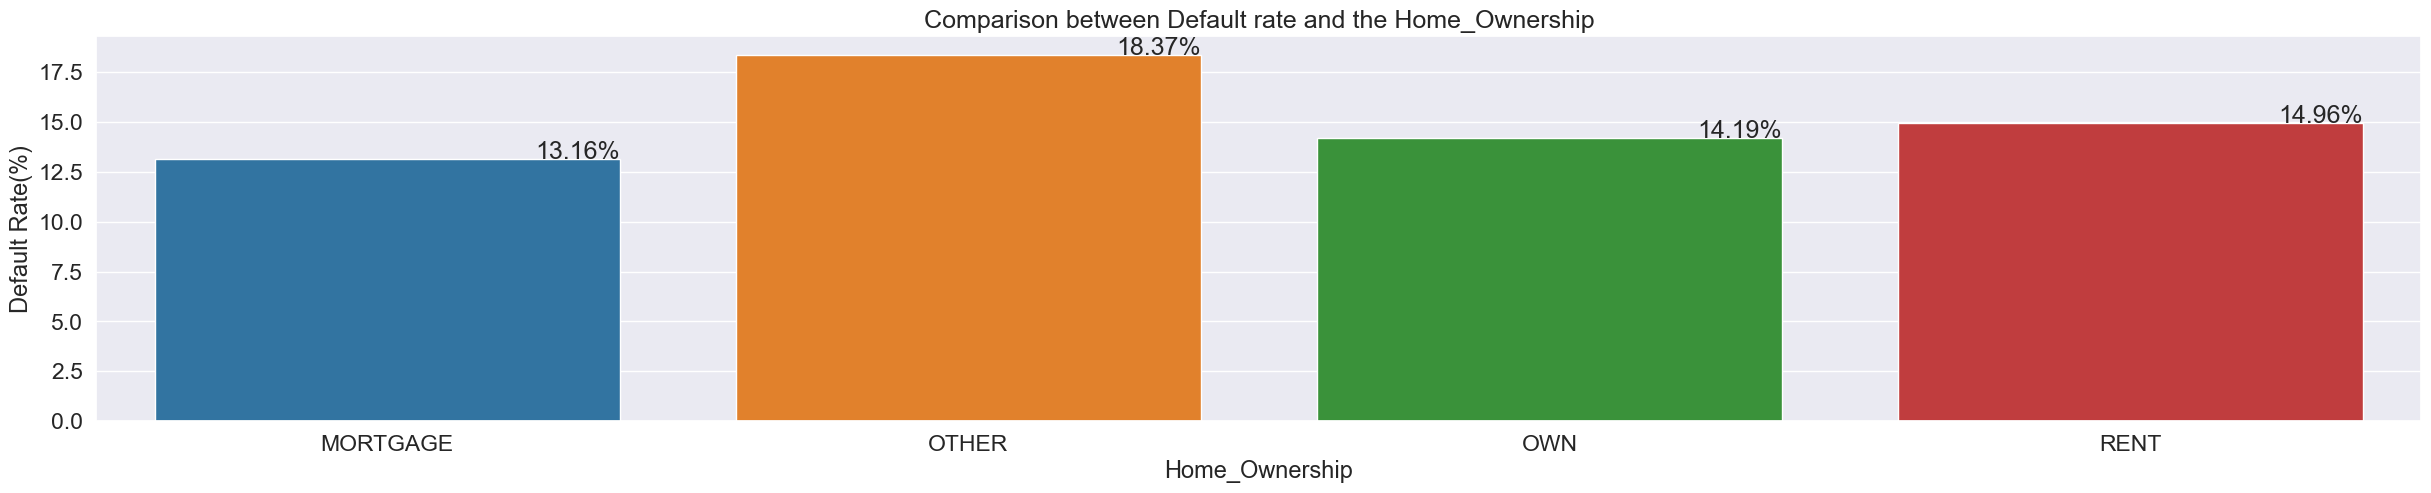

In [60]:
create_plot_default_rate('home_ownership', s=(30,5))

5. In Graph *"Comparision between Default rate and the home_ownership"*, It's clear that people living in **OTHER** are more likely to default on their loans (close to 18%). It could be an import factor to decide whether to provide loan or not.</br>
</br>

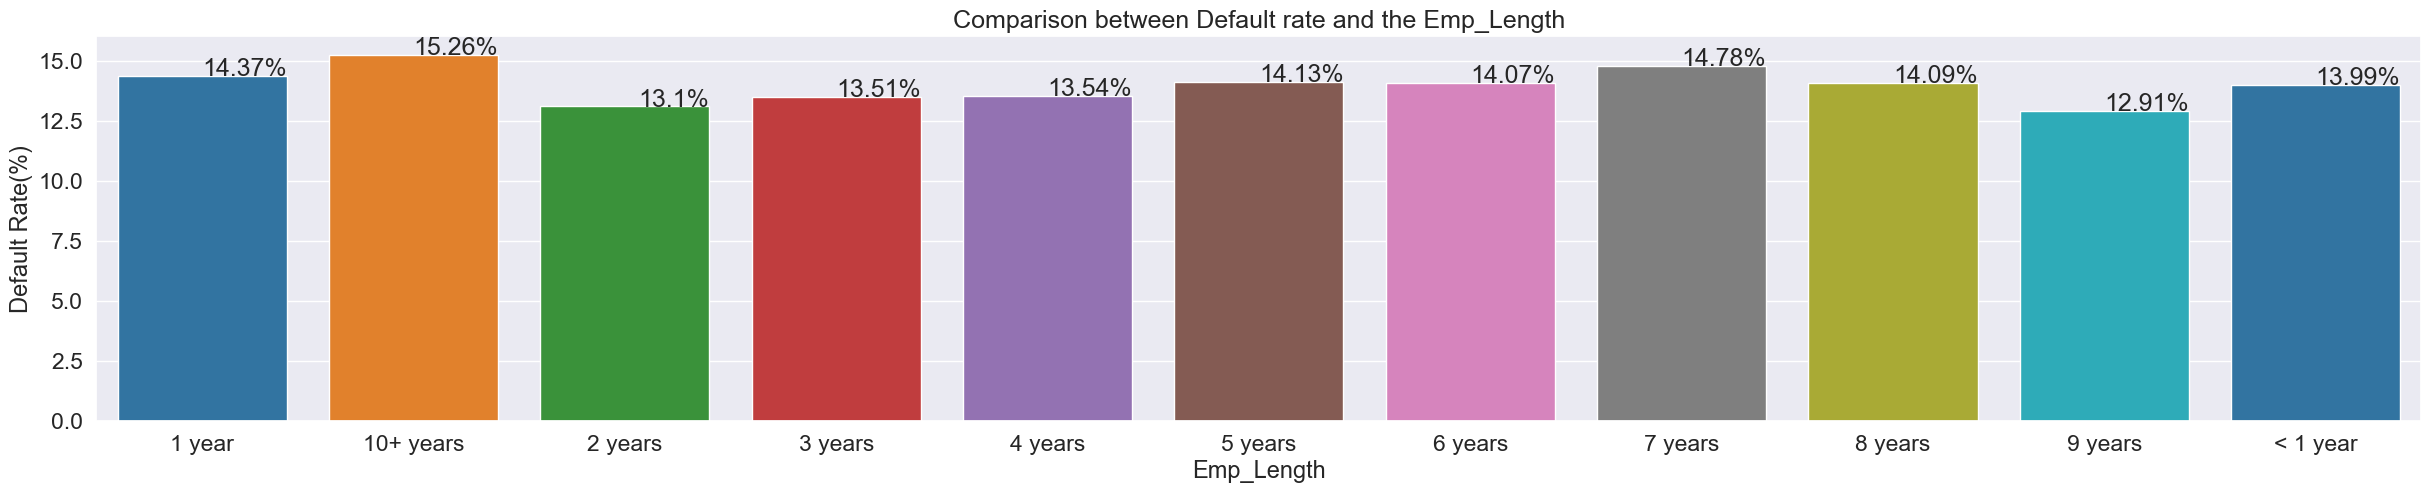

In [61]:
create_plot_default_rate('emp_length', s=(30,5))

6. In Graph *"Comparision between Default rate and the Emp_length"*, The graph is very symmetrical across all employee years of working. It doesn't give any conclusion. But looking at counts from initial steps, people with 10+ years or <1 years have higher charged_off counts from initial analysis.</br>
</br>

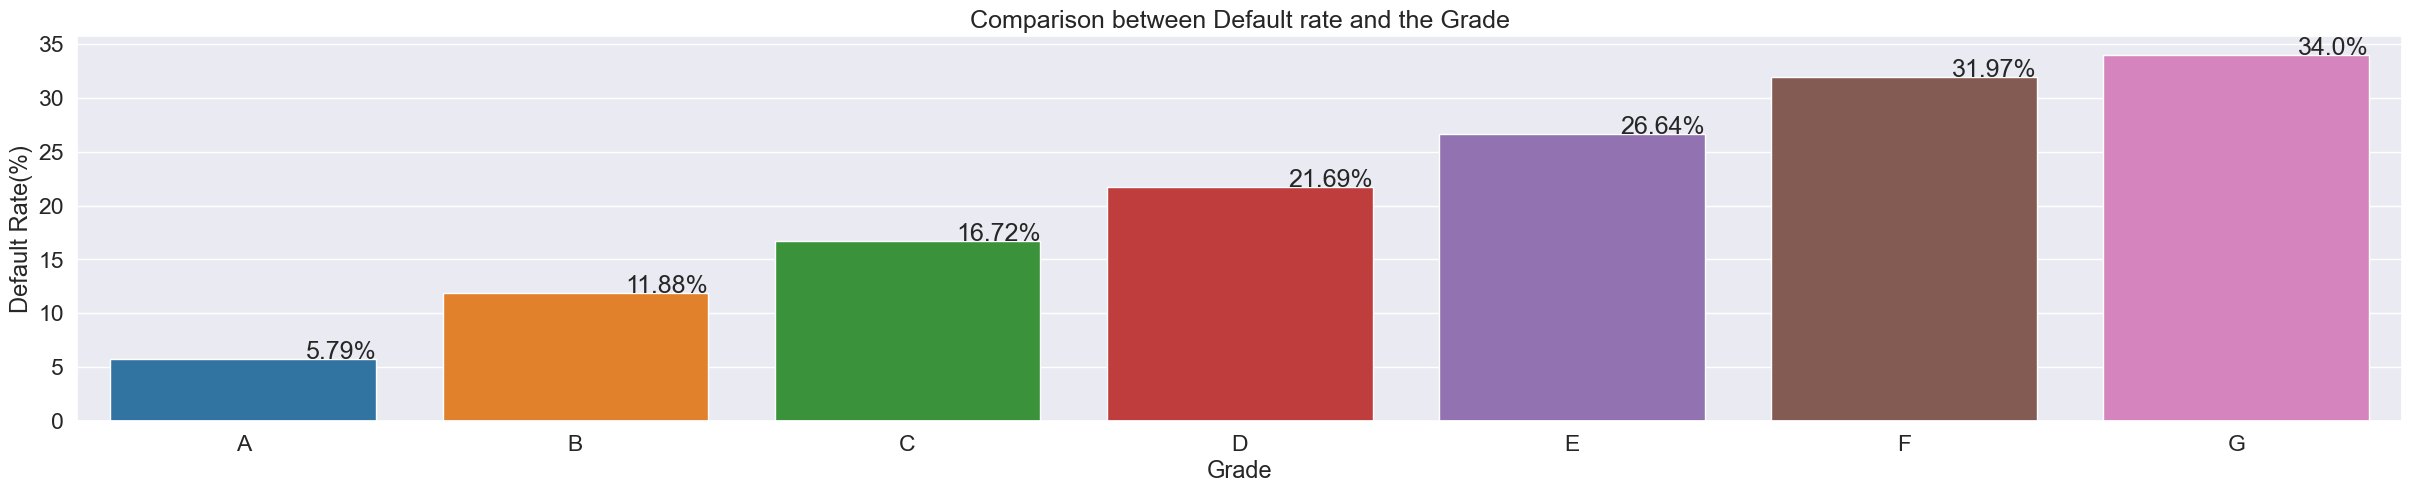

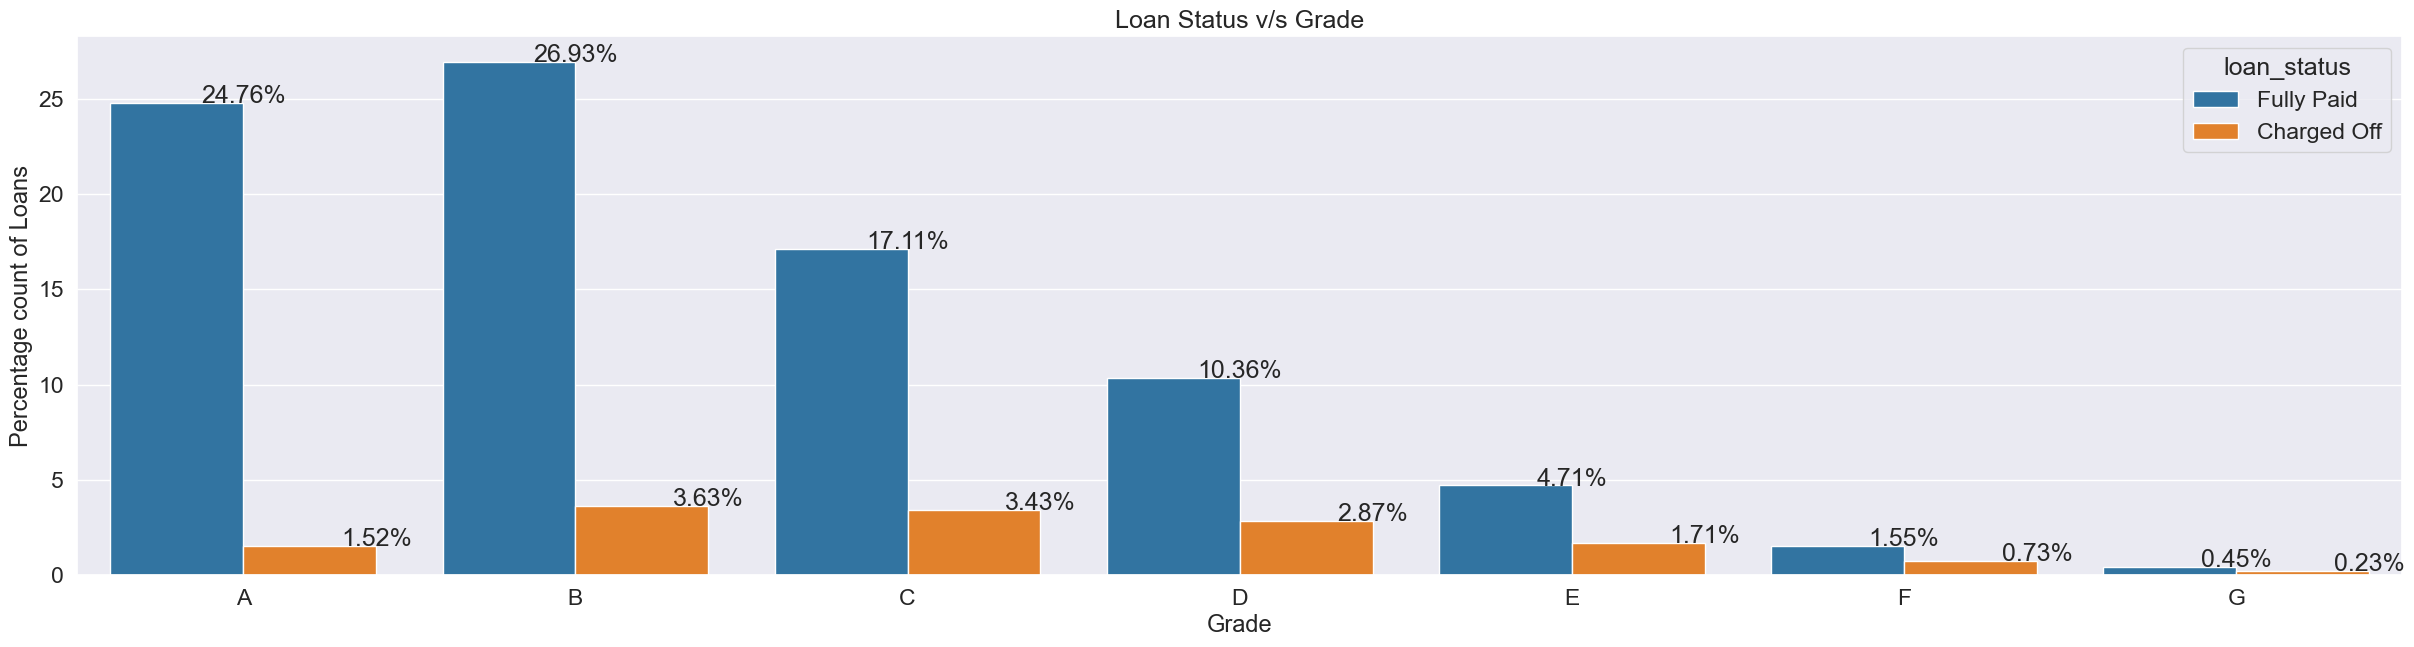

In [62]:
create_plot_default_rate('grade', s=(30,5))
plot_defaulted_counts('grade', s=(30,7), hues='loan_status')

7. In Graph *"Comparision between Default rate and the Grade"*, Default rate of **G grade > F grade > E grade and so on till A**. This may be due to the fact that **as grade increases , interest rate increases and so default rate increases**.
- We see that even though G grade has lowest number of defaulters, its default rate is maximum. This is a alarming situation and LC should be careful about it.</br>
</br>

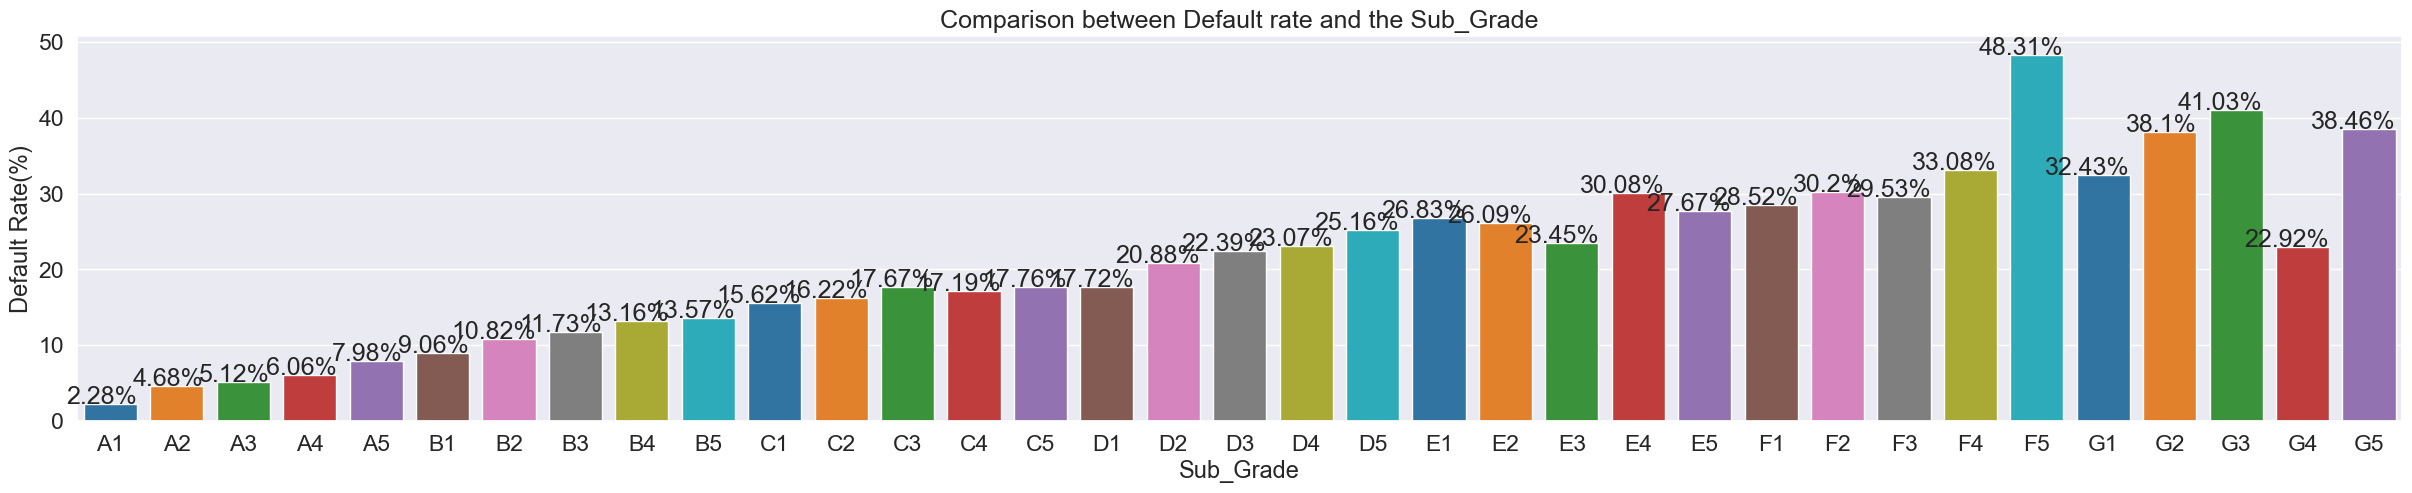

In [63]:
create_plot_default_rate('sub_grade', s=(30,5))

8. In Graph *"Comparision between Default rate and the Sub_Grade"*, As expected **Higher grades loans have the highest default rates**. This may be due to the fact that these also have higher interest rate.
- So LC properly need to check the people who get loans at higher grades</br>
</br>

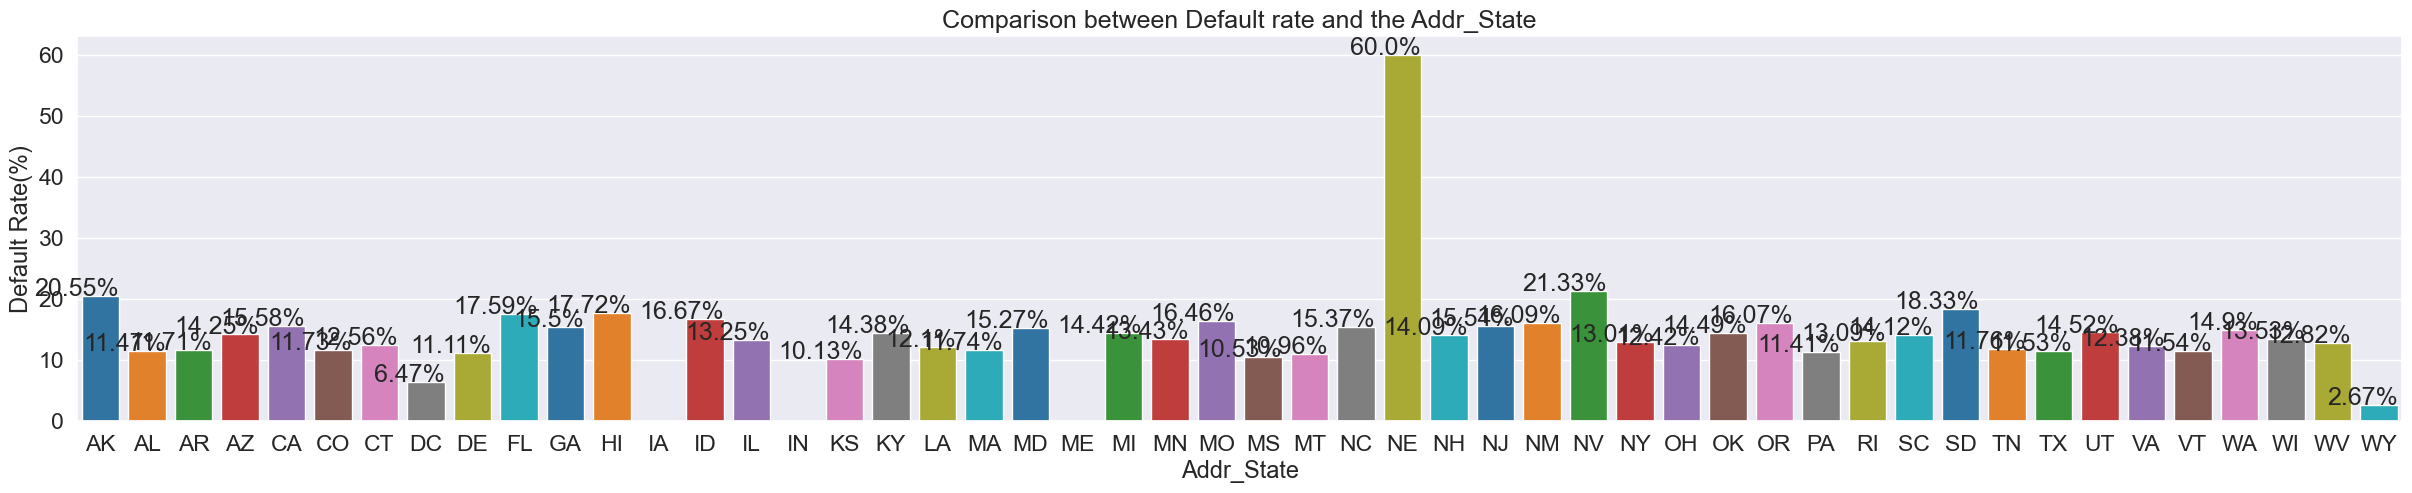

In [64]:
create_plot_default_rate('addr_state', s=(30,5))

9. In Graph *"Comparision between Default rate and the addr_state"*, This is an Interesting observation as it says people of NE state are more likely to default their loans with 60 percent default rate but out of 36k only 5 loans are there from NE State. And next immediate value is 21.33 for NV state and 20.55 for AK state. Analysis on this variable need to be considered in bivarite as we couldn't get much information here</br>
</br>

### 4.2 Comparing Default Rate across every Continous/numerical variable

#### 4.2.1 Comparing the Default Rate with Interest rates

In [65]:
# Since int_rate is a continous variable, we'll check its characterisitics and then bin it in appropriate brackets.
loan_df.int_rate.describe()

count   36,463.00
mean        11.85
std          3.61
min          5.42
25%          8.94
50%         11.71
75%         14.27
max         24.40
Name: int_rate, dtype: float64

We see that minimum interest rate is 5.42% while maximum is 24.40%. So we'll create bins of 3%

In [66]:
# Creating buckets for interest_rate

loan_df['int_rate_bin'] = pd.cut(loan_df['int_rate'], 
                      [x for x in range(3, 28, 3)], labels=[str(x)+'-'+str(x+3)+'%' for x in range (3, 27, 3)])

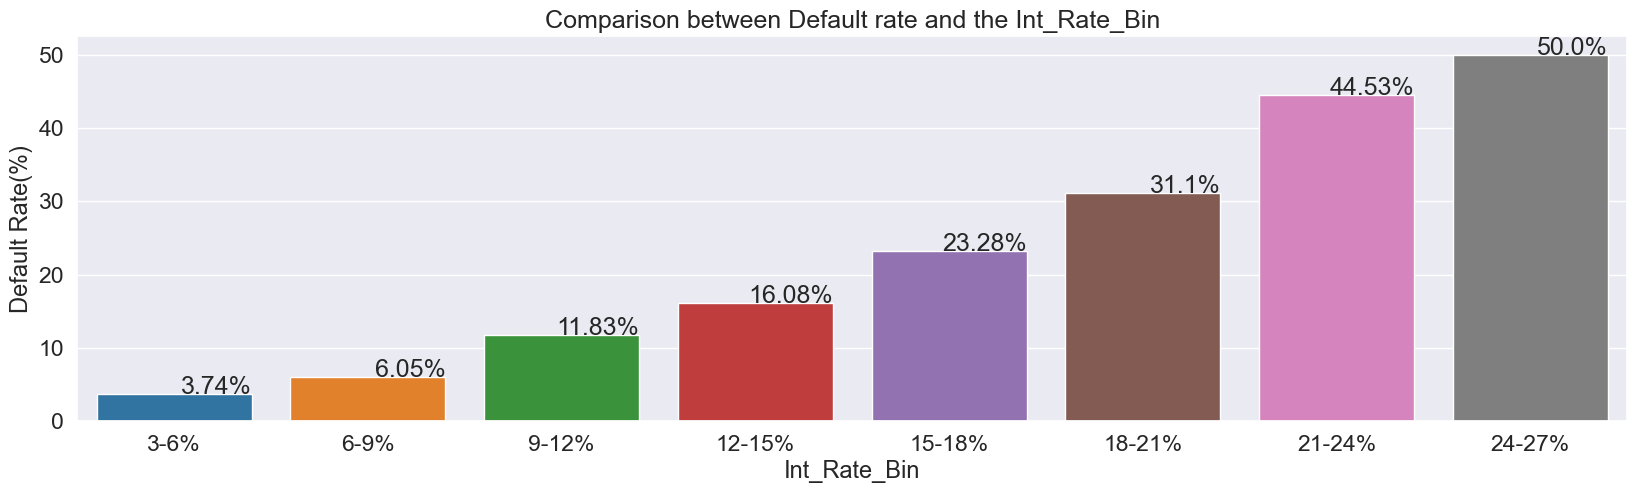

In [67]:
create_plot_default_rate('int_rate_bin', s=[20,5])

10. We can see that as interest rates goes up, default rate is also increasing. This is a clear trend which indicates that as interest rate increases, repay capacity decreases</br>
</br>

#### 4.2.2 Comparing the Default Rate with loan amounts

In [68]:
loan_df.loan_amnt.describe()

count   36,463.00
mean    10,472.02
std      6,396.11
min        500.00
25%      5,162.50
50%      9,500.00
75%     15,000.00
max     29,175.00
Name: loan_amnt, dtype: float64

There seems to be a periodic rise of price 5000 till 75th percentile so we can create a bin of size 5000 for loan amount.

In [69]:
loan_df['loan_amnt_bin'] = pd.cut(loan_df['loan_amnt'], 
                            [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

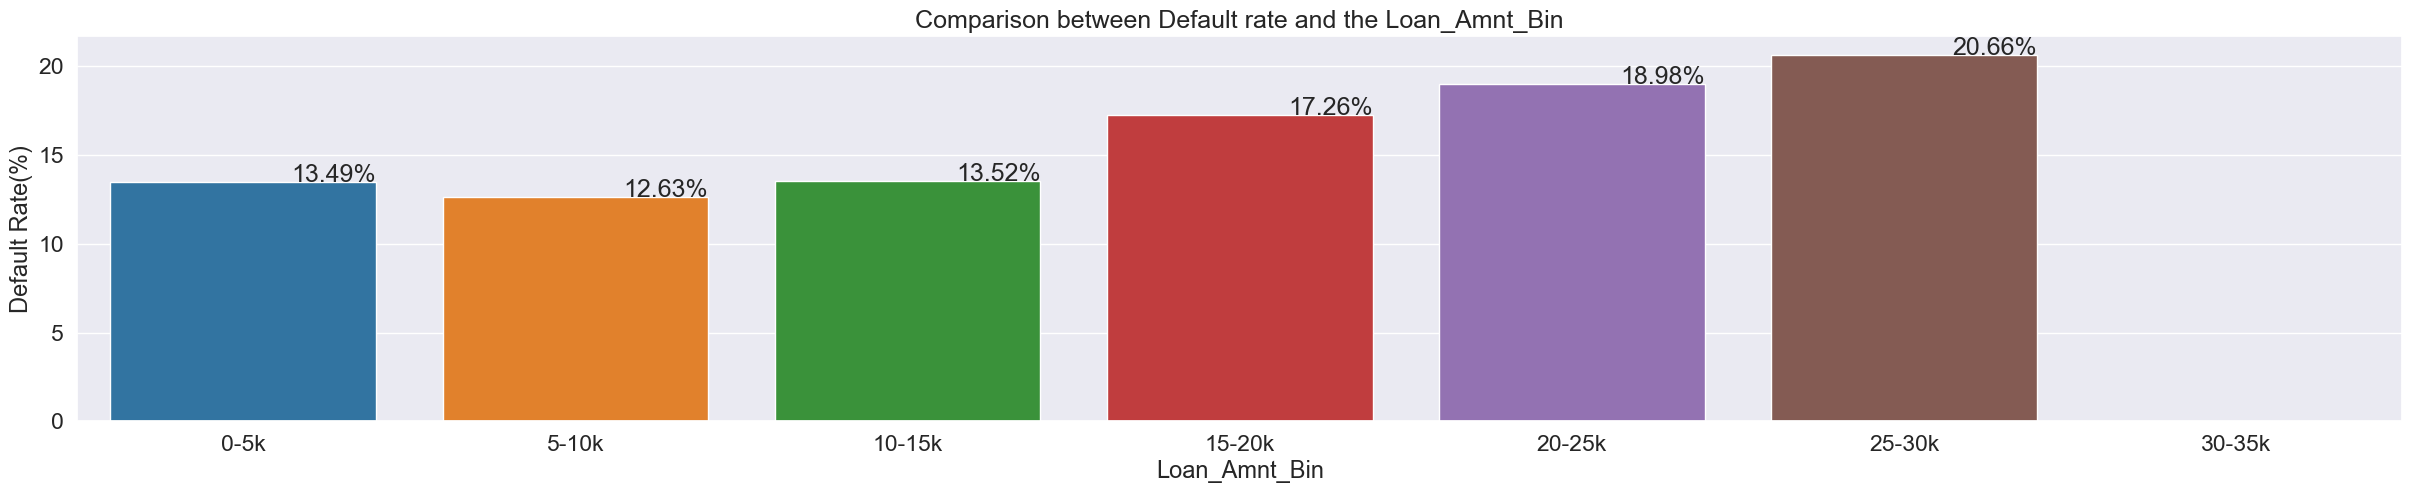

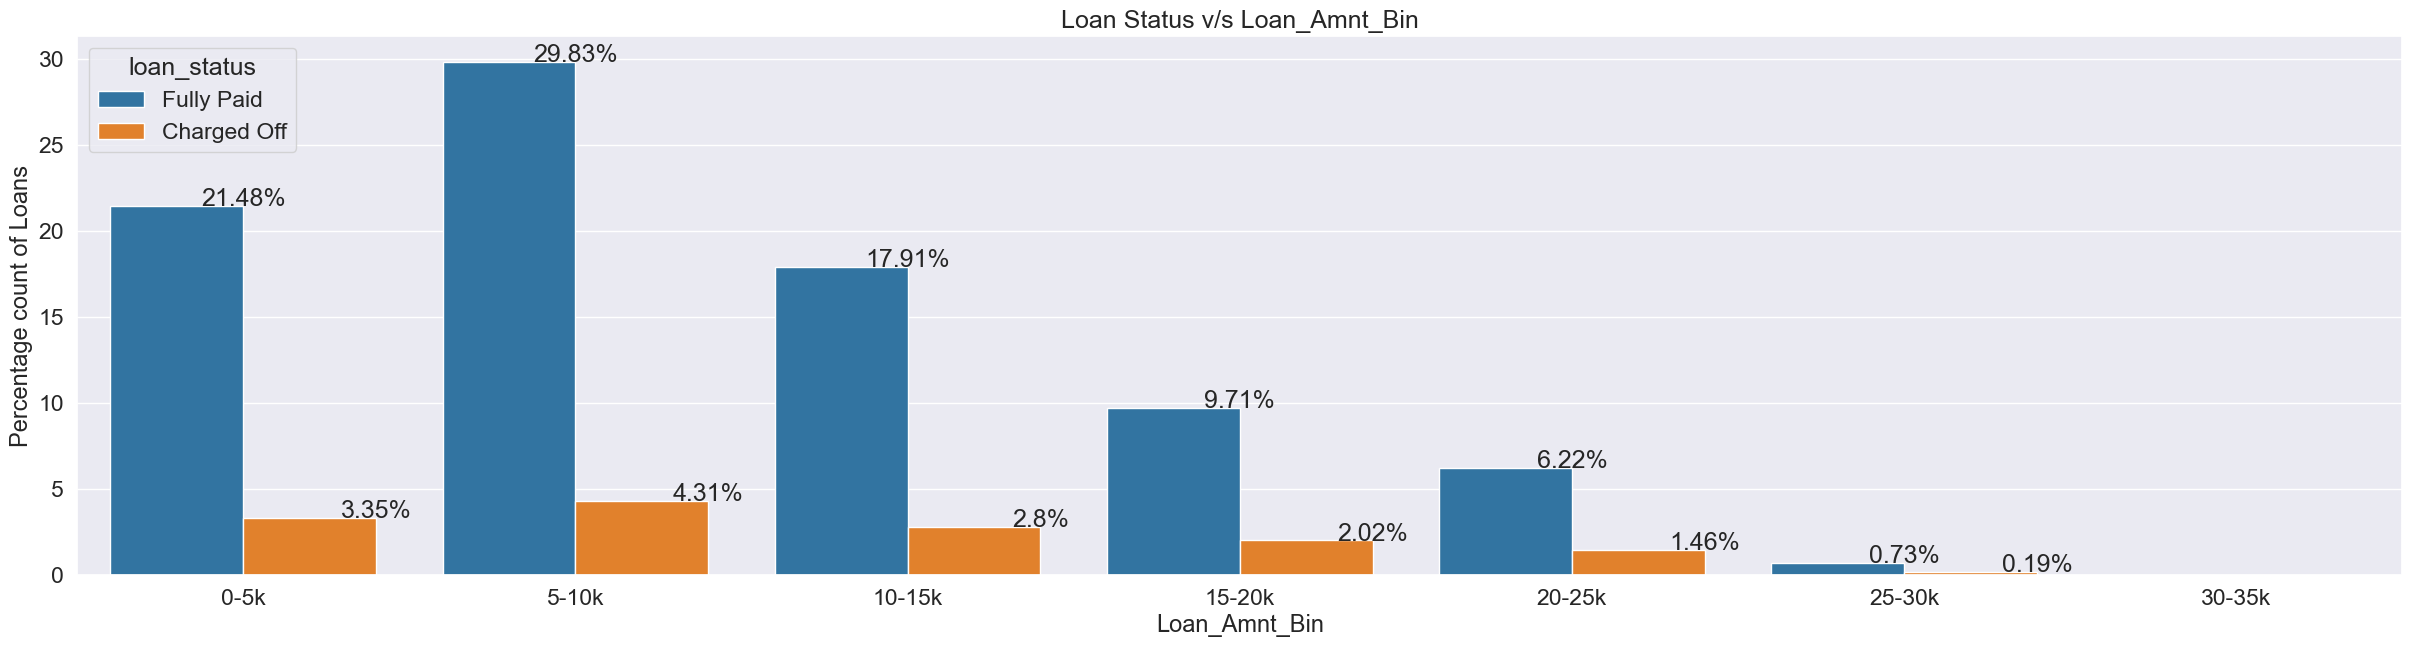

In [70]:
create_plot_default_rate('loan_amnt_bin', s=(30,5))
plot_defaulted_counts('loan_amnt_bin', s=(30,7), hues='loan_status')

11. We can see that for higher loan amounts, the default rate is high. It is for the loan amount between 0-15k where the default rate is comparitively lower. Also the number of loans that were charged off decreases as loan amount rises.</br>
- It indicates that the people who are taking a higher loan amount are more likely to default</br>
</br>

#### 4.2.3 Comparing the Default Rate with Anual income

In [71]:
loan_df.annual_inc.describe()

count      36,463.00
mean       67,739.32
std        63,400.98
min         4,000.00
25%        40,000.00
50%        58,000.00
75%        80,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

We can create a bucket of 20000 for describing annual_income class

In [72]:
loan_df['annual_inc_bin'] = pd.cut(loan_df['annual_inc'], 
                        [0,20000,40000,60000,80000,100000,500000,1500000,6000001], labels=['Very Low Income','Low income',
                         'Below Medium Income','Medium Income', 'Above Medium Income', 'High Income', 'Very High income',
                            'Rich'])

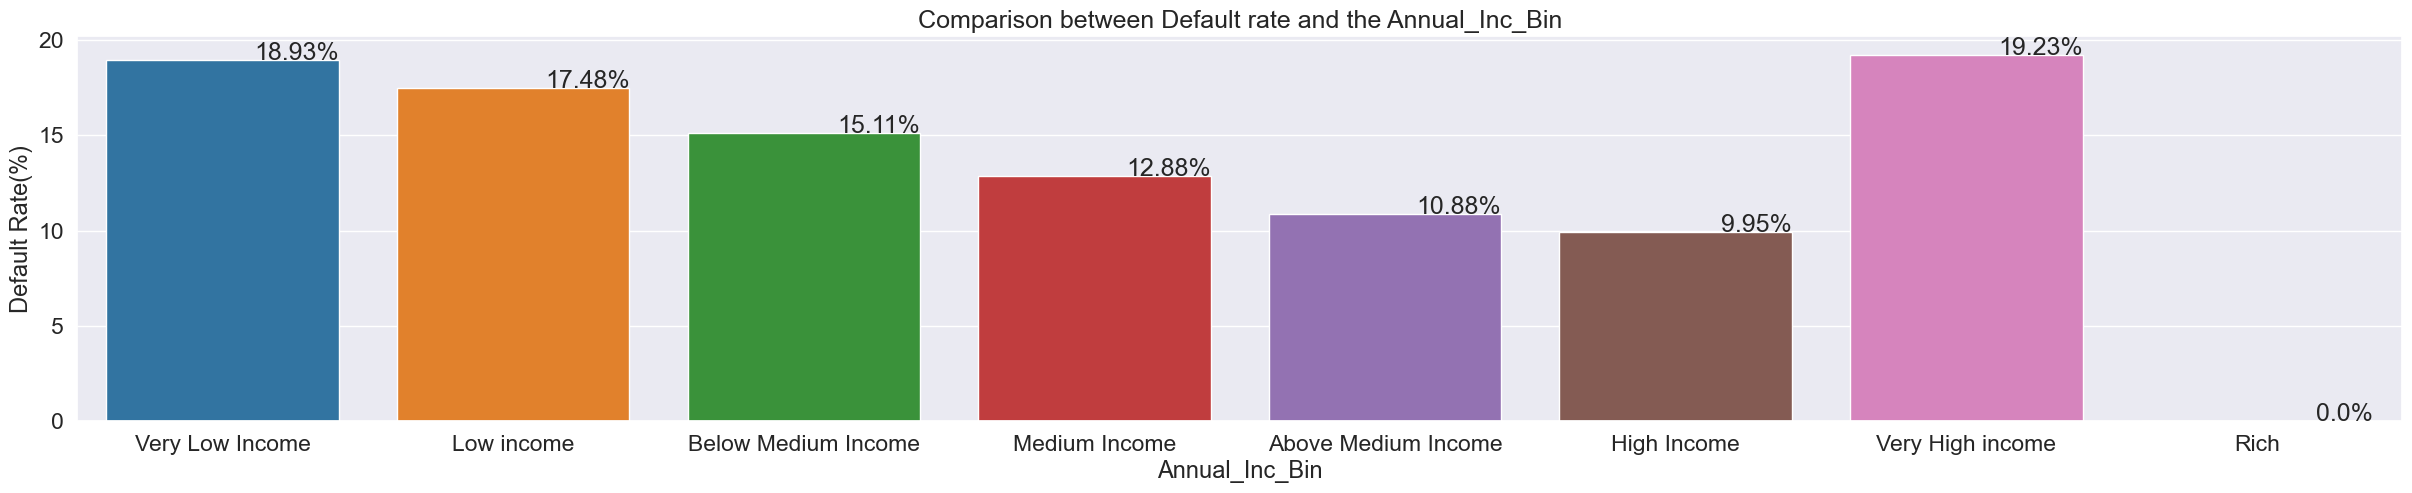

In [73]:
create_plot_default_rate('annual_inc_bin', s=(30,5))

12. It indicates that contradictorily very high income group people struggling to pay off loan. where as we can observe clear trend in default rate decreasing from very low income group to high income. Meaning middle income groups try and clear off loans more compared to very  low income</br>
</br>

<h2><center>Bivariate Analysis</center></h2>

#### 5. Defining function to plot 2 variables at once to perform bivariate analysis

In [74]:
# Defining a function to plot barplot for various categories.

size=[7,5]

def plot_bivariate(col1,col2, s=size, hues=None):
    #size=[7,5]
    
    plt.figure(figsize=s)
    sns.set(style="darkgrid")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.set_color_codes("muted")
    
    ax = sns.barplot(x=col1, y=col2, data=loan_df.sort_values(col1), hue=hues, 
                     palette='tab10', ci=None)

    plt.title(f'{col1.title()} v/s {col2.title()}')
    plt.ylabel(col2.title(), fontsize=17)
    plt.xlabel(col1.title(), fontsize=17)
    
    for p in ax.patches:
        height = round(p.get_height(),2)
        hei = str(height)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(hei, (x, y),ha='right')
        
    return plt.show()

#### 5.1.1 Purpose v/s Loan Amount

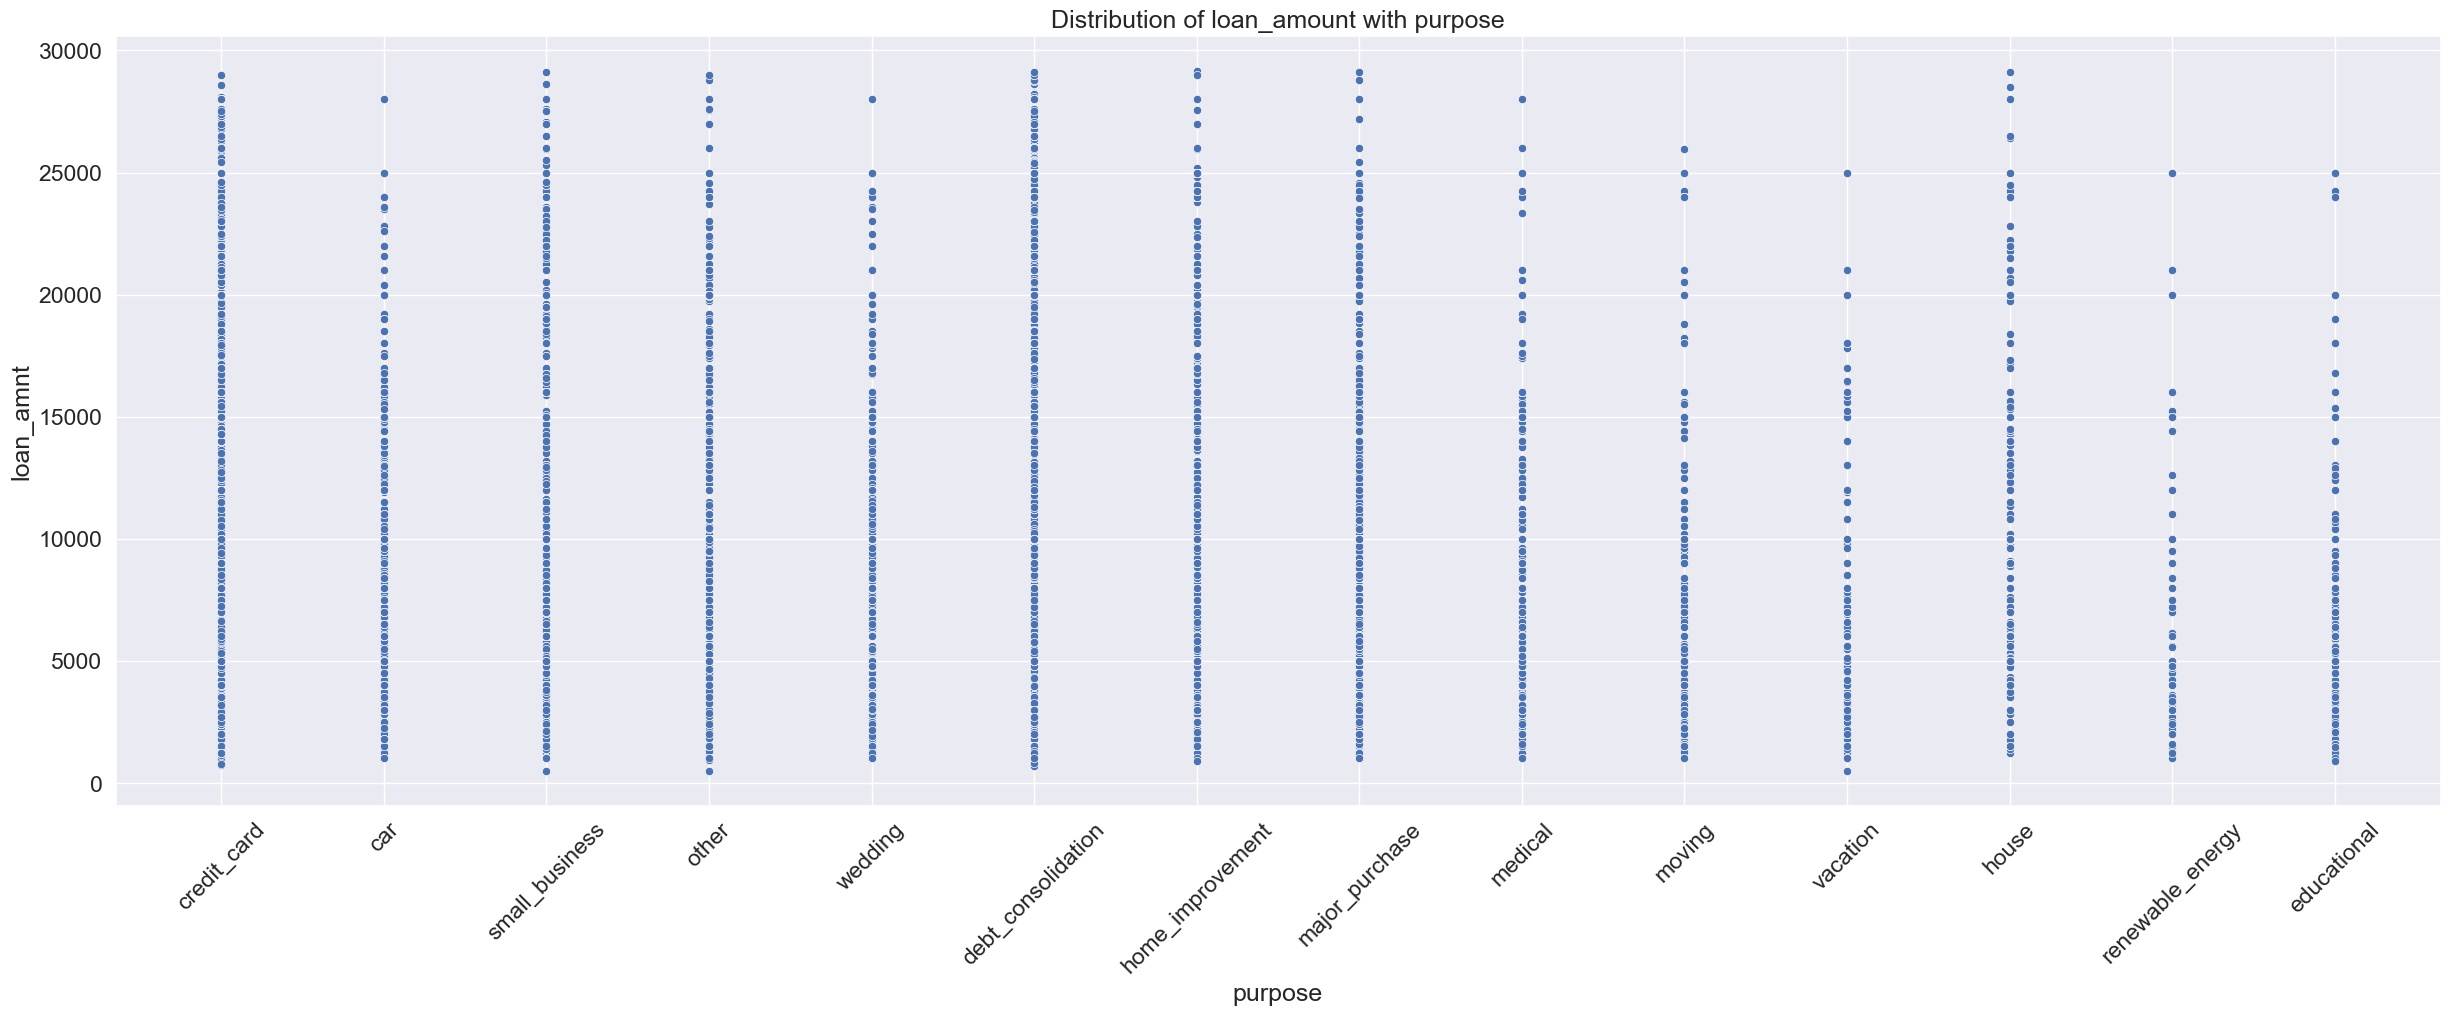

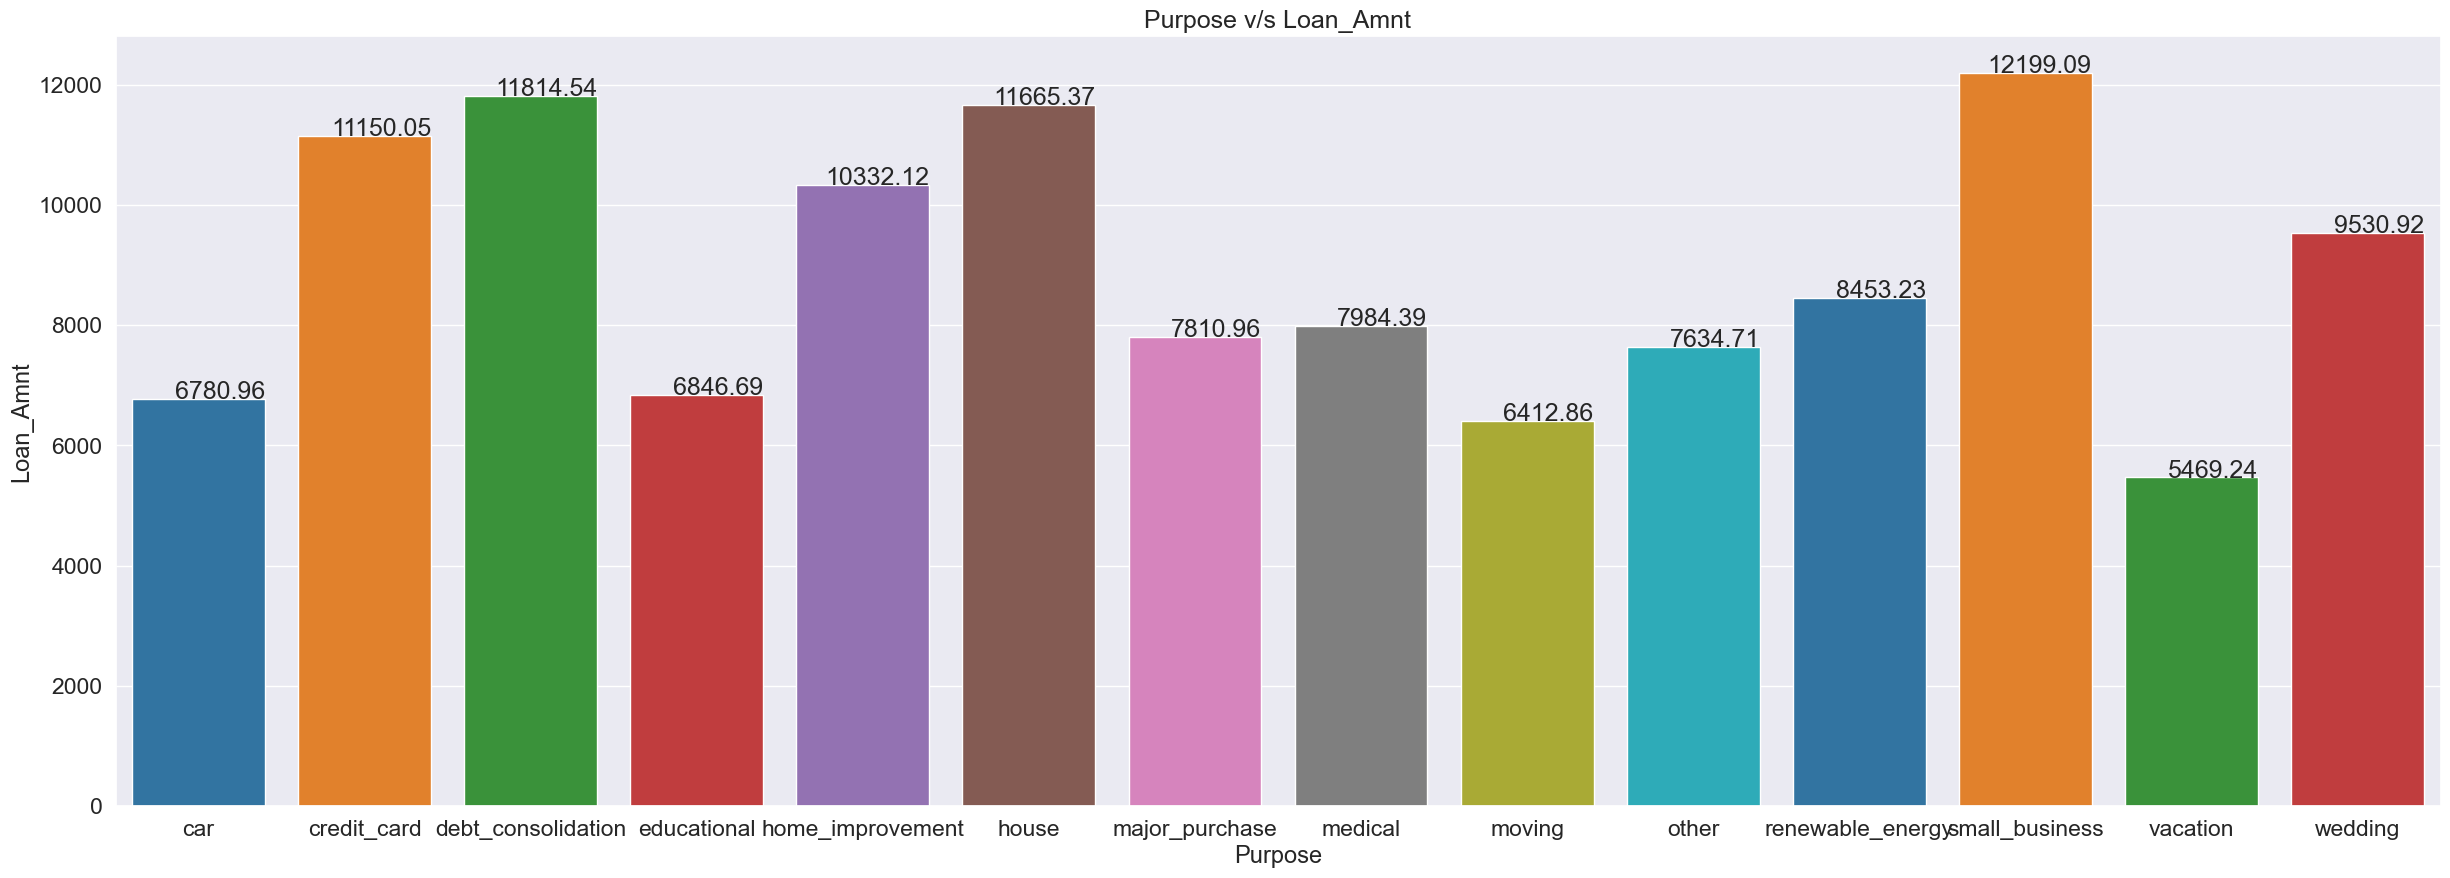

In [75]:
plt.figure(figsize=[30,10])
plt.title('Distribution of loan_amount with purpose')
sns.scatterplot(data=loan_df, x='purpose', y='loan_amnt')
plt.xticks(rotation=45)
plt.show()
plot_bivariate('purpose', 'loan_amnt', s=[30,10])

13. From plot *Distribution of loan_amount with purpose* we can observe that for credit_card, Small Business, debt_consolidation and home_improvement have the maximum loan density wise and with average. So loan applications from these category are quite high.</br>
</br>


#### 5.1.2 Purpose v/s Interest rate

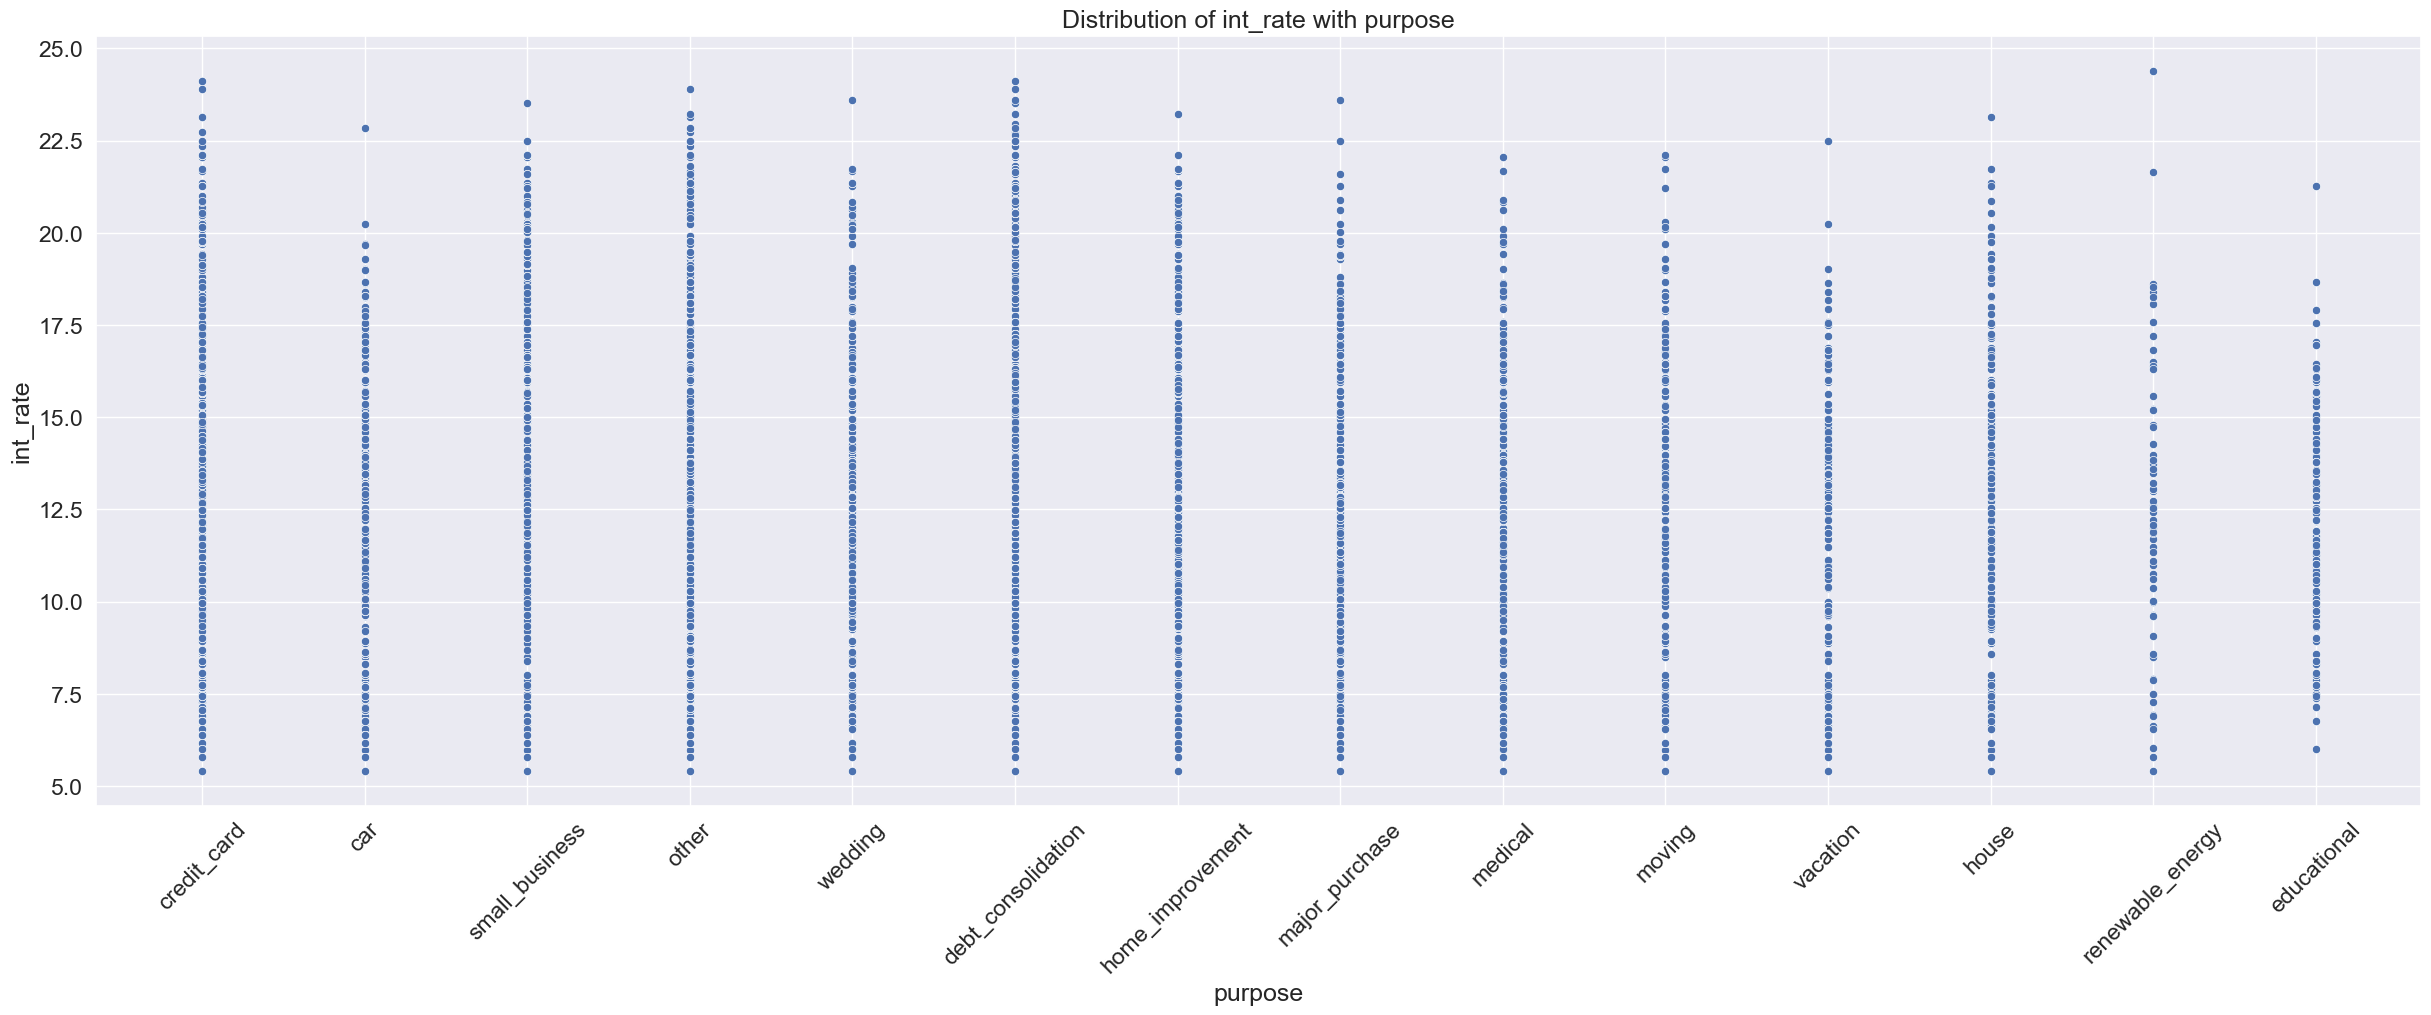

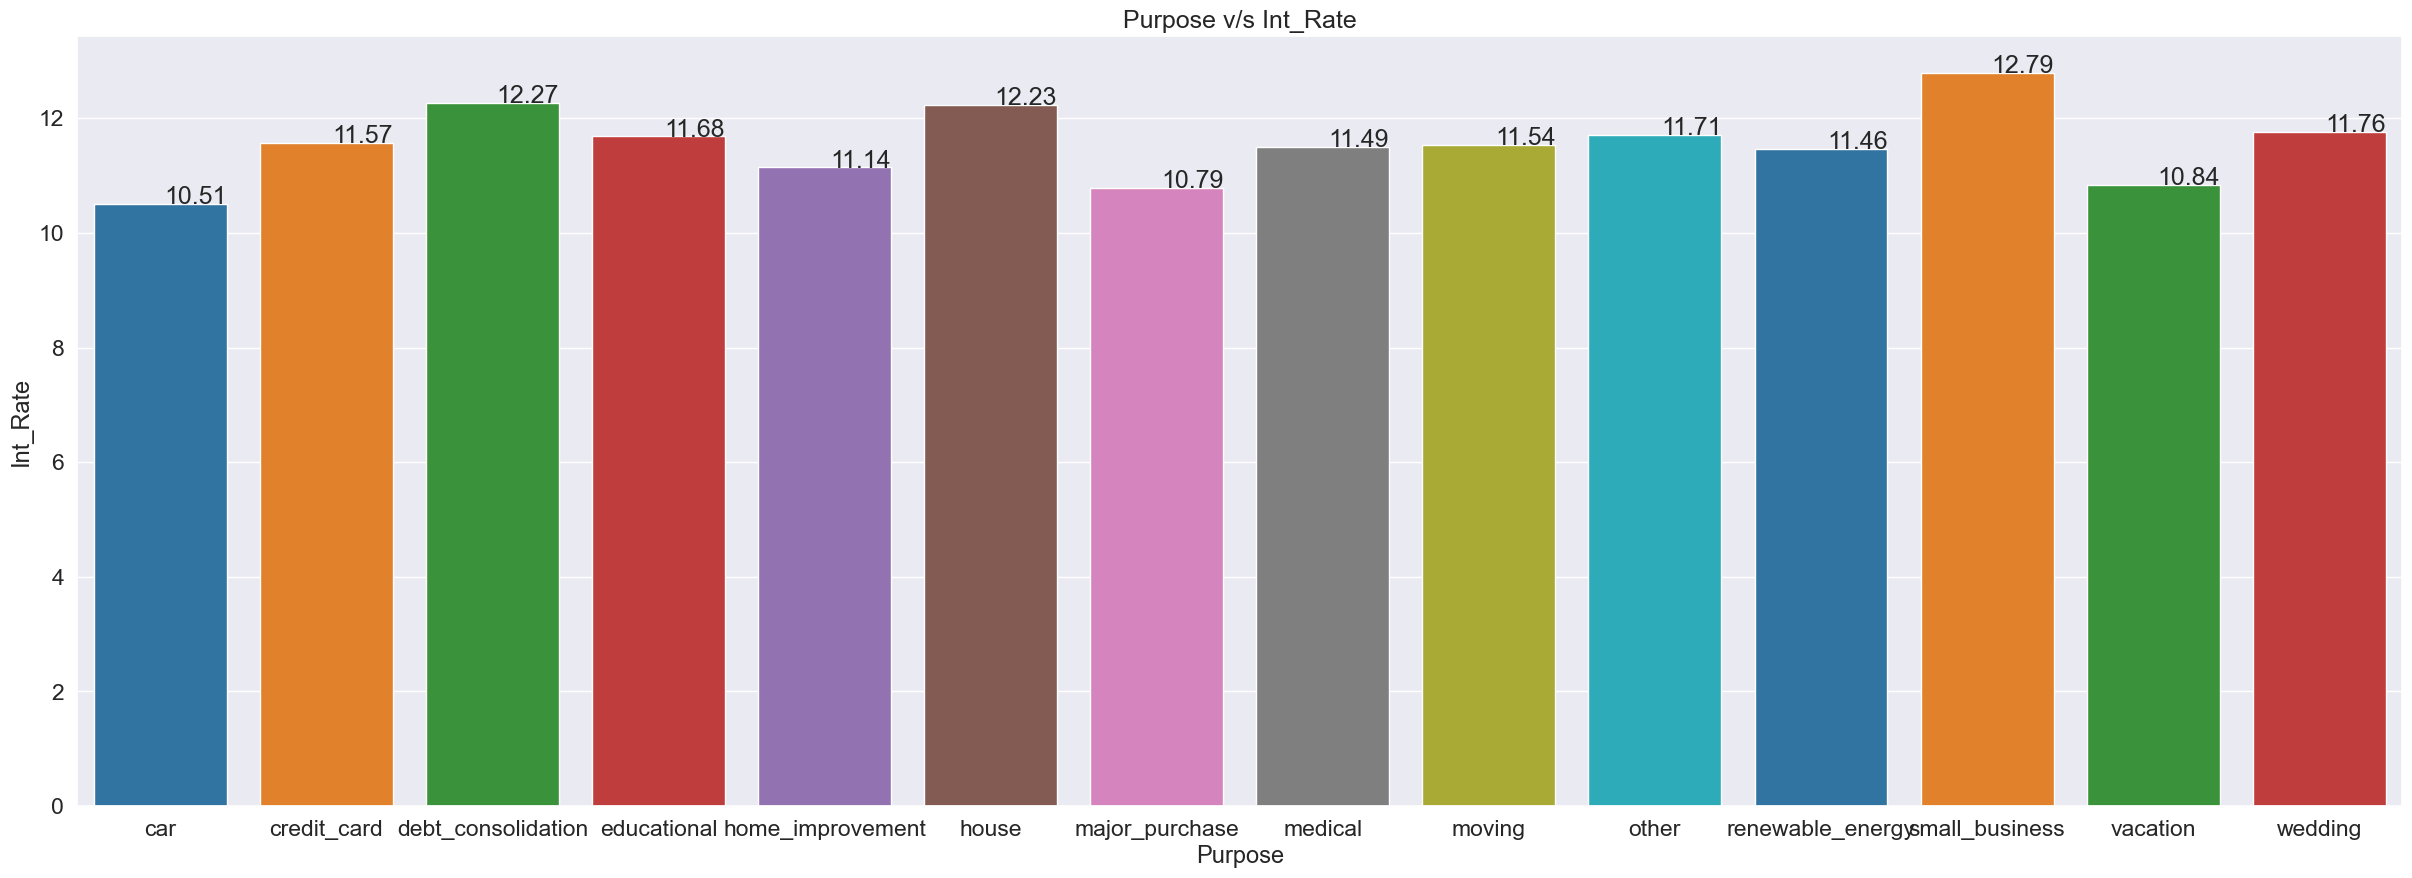

In [76]:
plt.figure(figsize=[30,10])
plt.title('Distribution of int_rate with purpose')
sns.scatterplot(data=loan_df, x='purpose', y='int_rate')
plt.xticks(rotation=45)
plt.show()
plot_bivariate('purpose', 'int_rate', s=[30,10])

</br>
14. a) From plot *Distribution of int_rate with purpose* we can see same trend as with purpose and loan_amnt, that for credit_card, Small Business, debt_consolidation and home_improvement have interest rates starting from and almost going till 25. Where as educational purpose loans, LC tends to provide loans on lower interest. Though we can't derive much information here, we can add third variable default and check how interest rate with purpose can behave.</br>
</br>

#### 5.1.3 Purpose v/s Interest rate v/s loan_status

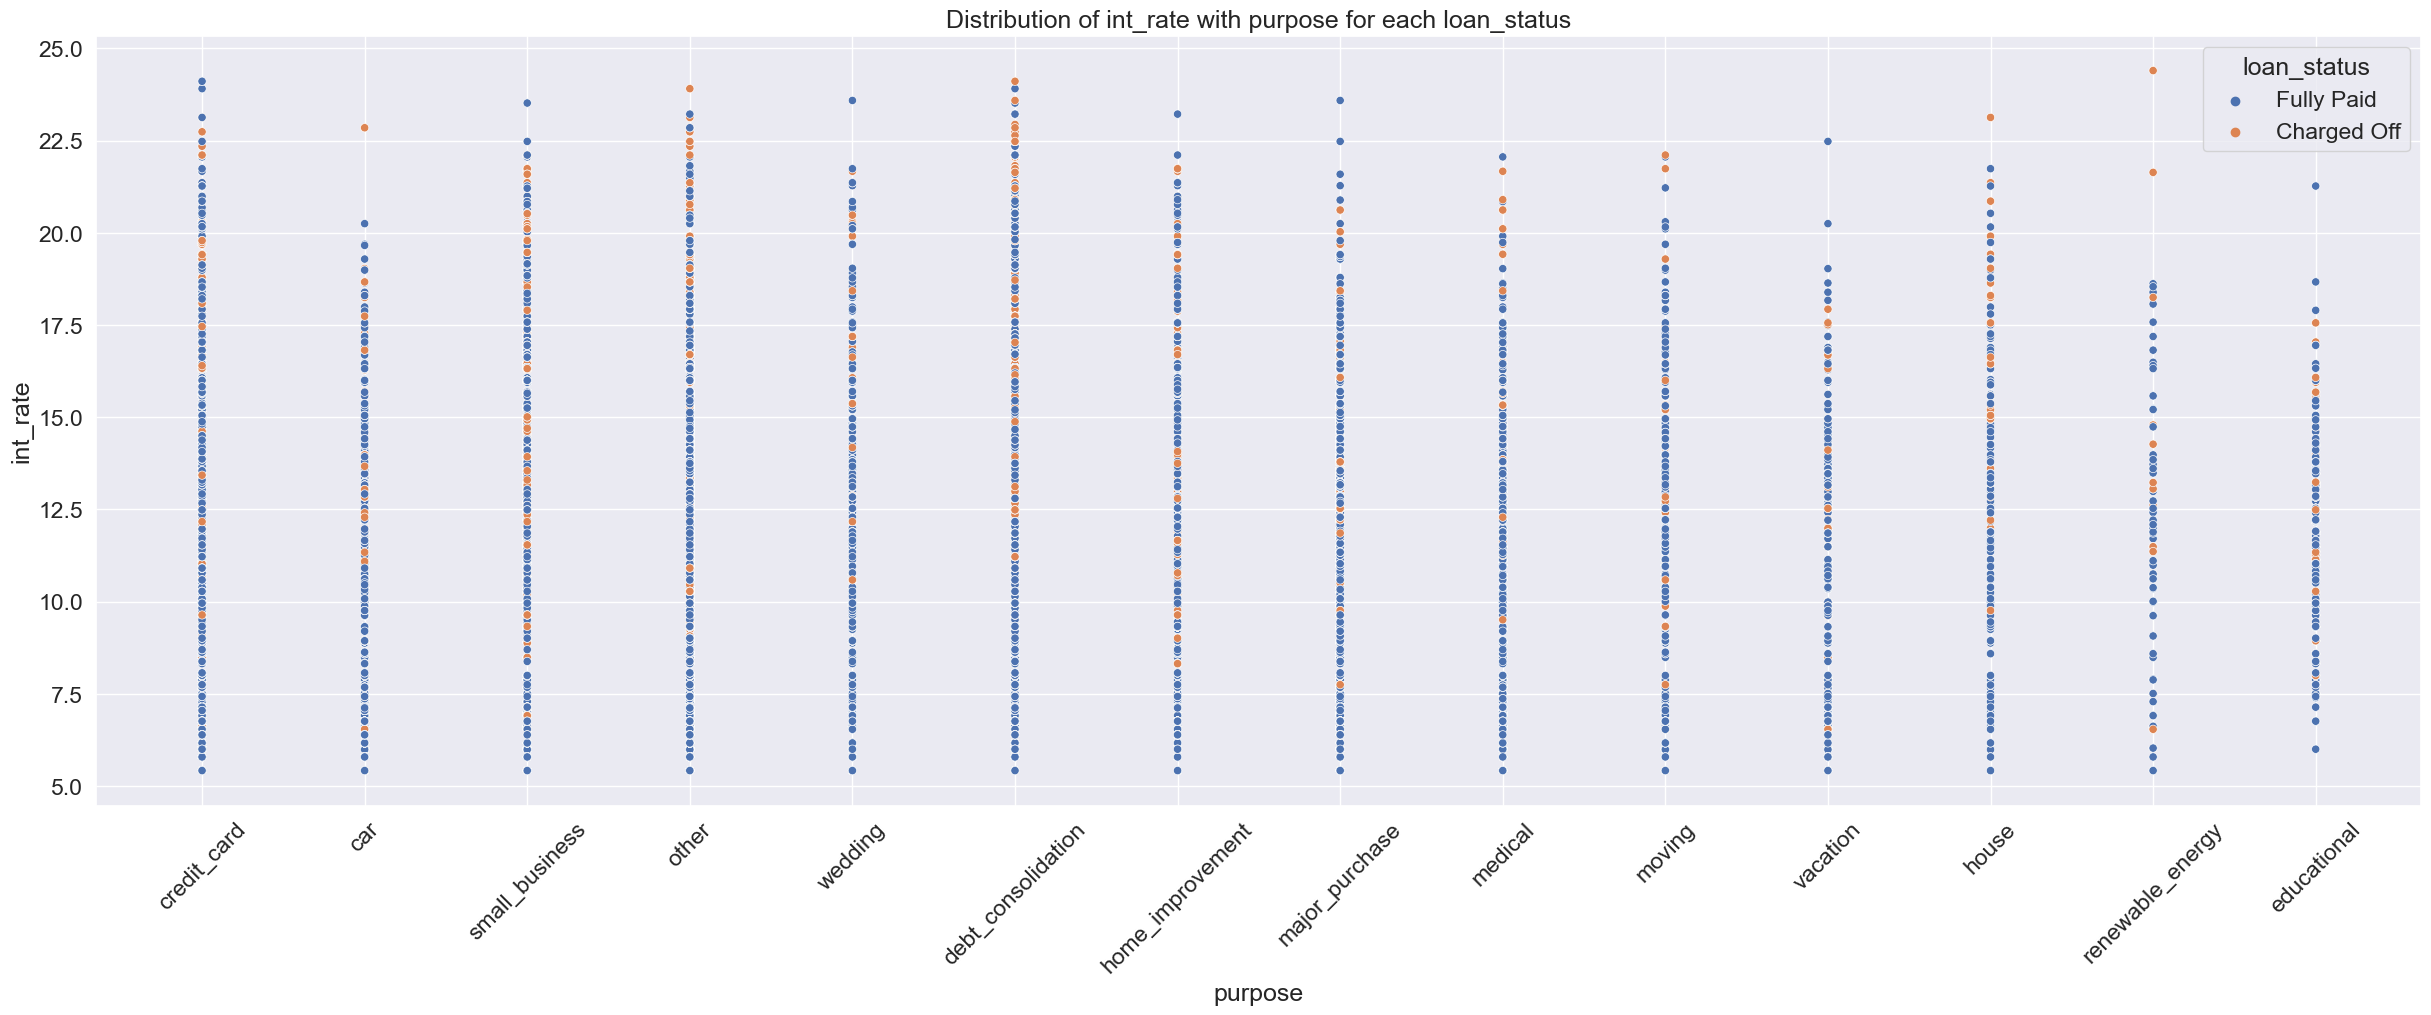

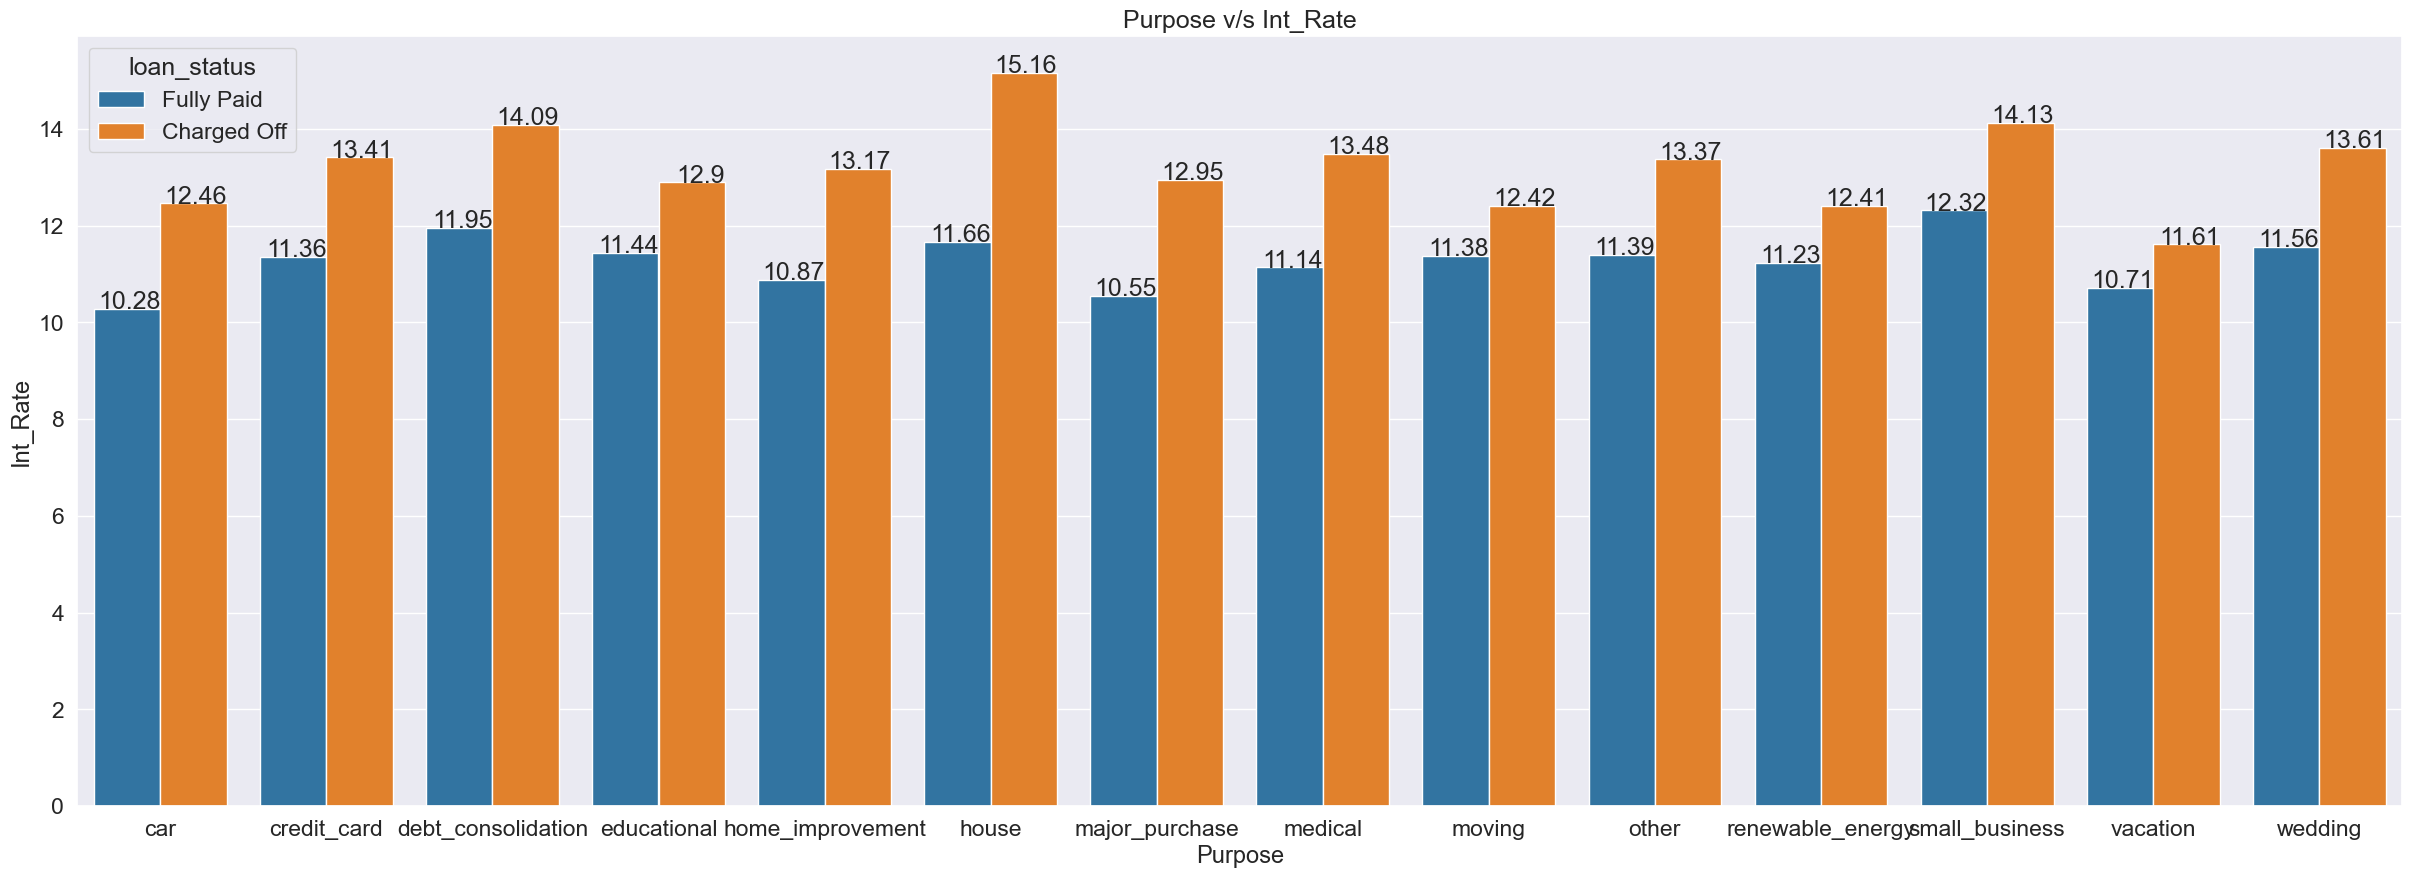

In [77]:
plt.figure(figsize=[30,10])
plt.title('Distribution of int_rate with purpose for each loan_status')
sns.scatterplot(data=loan_df, x='purpose', y='int_rate',  hue='loan_status')
plt.xticks(rotation=45)
plt.show()
plot_bivariate('purpose', 'int_rate', s=[30,10], hues='loan_status' )

</br>
14. b) As expected loans for any purpose with interest rate more than 15 are likeyly to be defaulted. Howver, if we dig further, we can observe that loans taken for purpose of small_business, credit_Cards, deby_cosolidation and home_improvement are struggling to pay off loan even at lonwer interest rates.</br>
</br>
We can observe how interest rates were across the years

#### 5.1.4 Variation of interest_rate across all purposes for every year

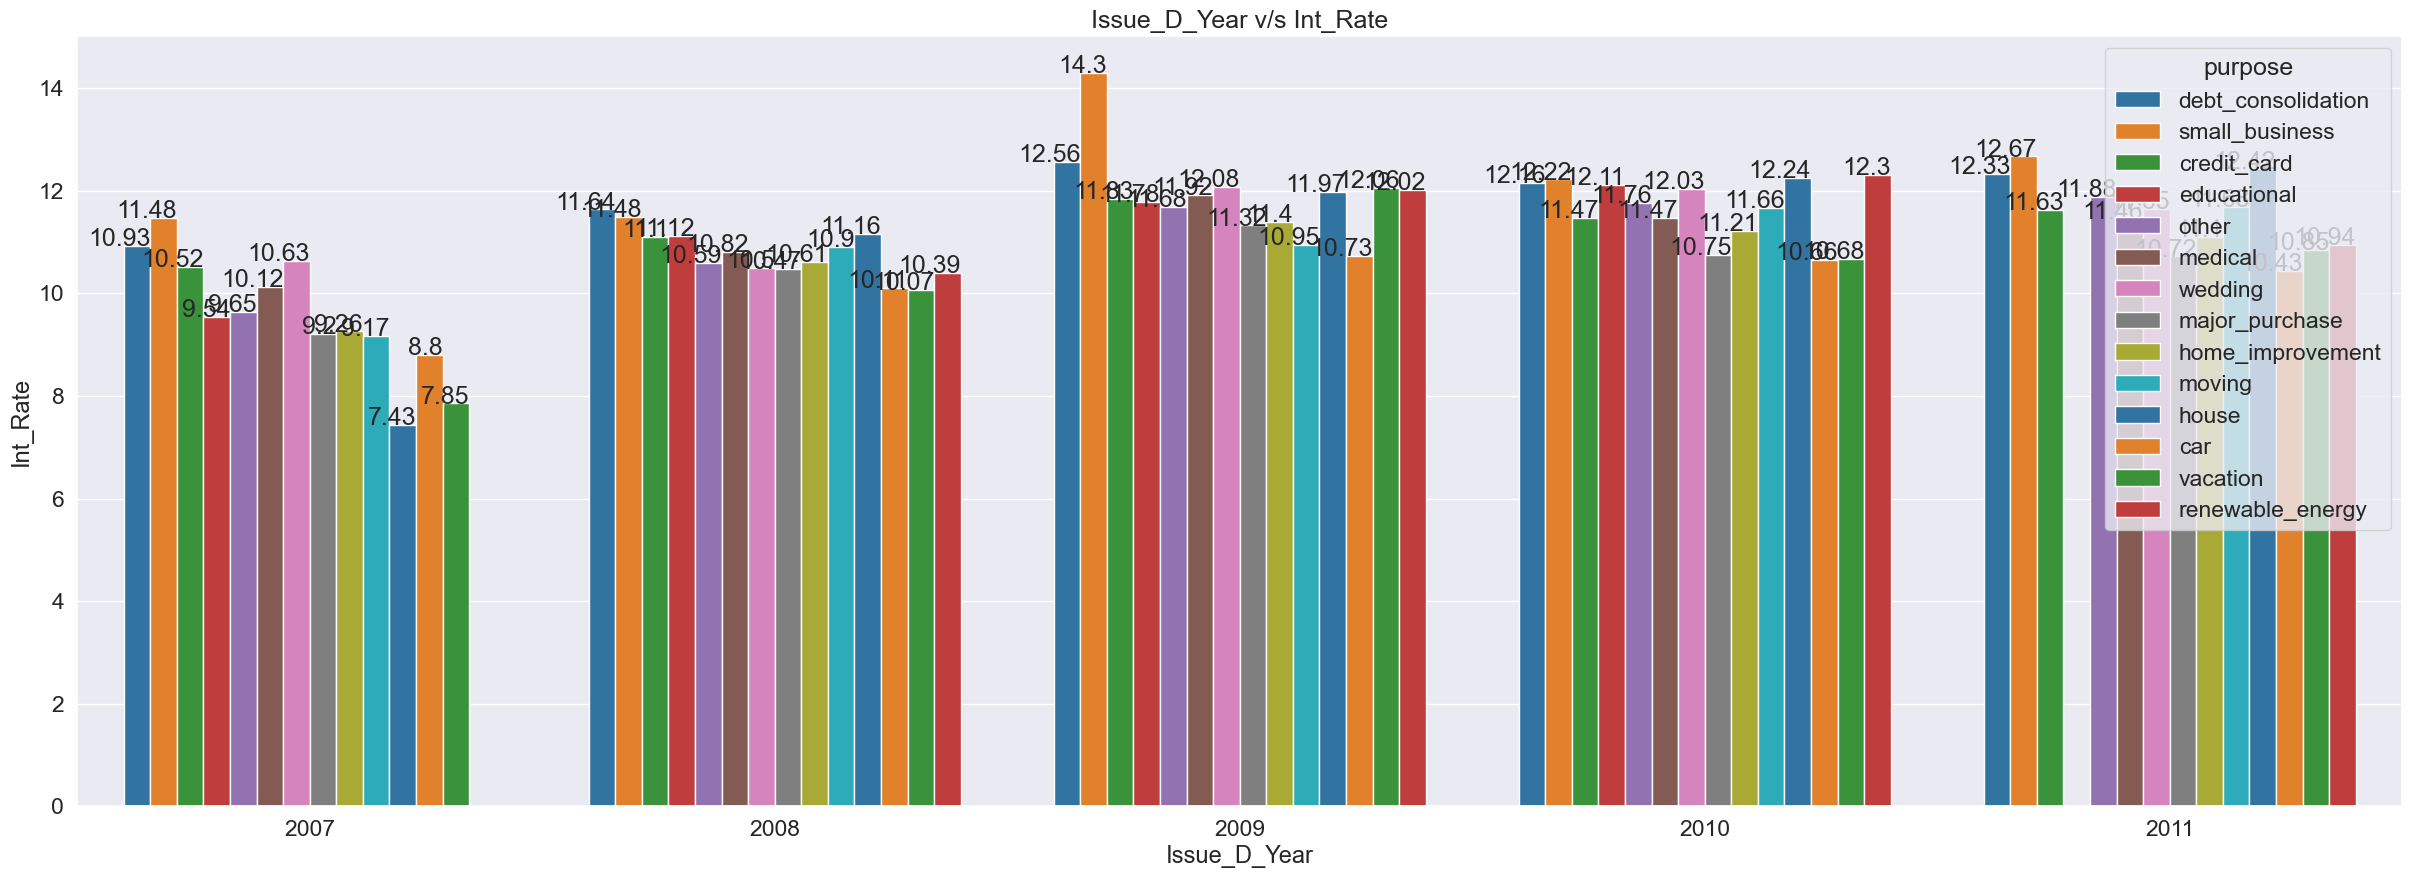

In [78]:
plot_bivariate('issue_d_year', 'int_rate', s=[30,10], hues='purpose' )

</br>
14. c) We know 2007 is a year for recission and because of the inflation happened, lenders started to raise interest rates on loans provided and we can see this clear trend here across all purposes.</br>
- Average interest rate offered for moving sky rocketed from 7.43 to 10.9 from 2007 to 2008.
- After 2007 crisis, because of price increase in oil and gas, country started to encourage renewable_energy. And so lenders started providing loans at higher rates to renewable_energy sector from 2008.
- From year 2007 to 2008 interest rates kept on increasing for all purposes.
</br>

#### 5.1.5 Loan issue_d_year v/s Interest rate v/s loan_status

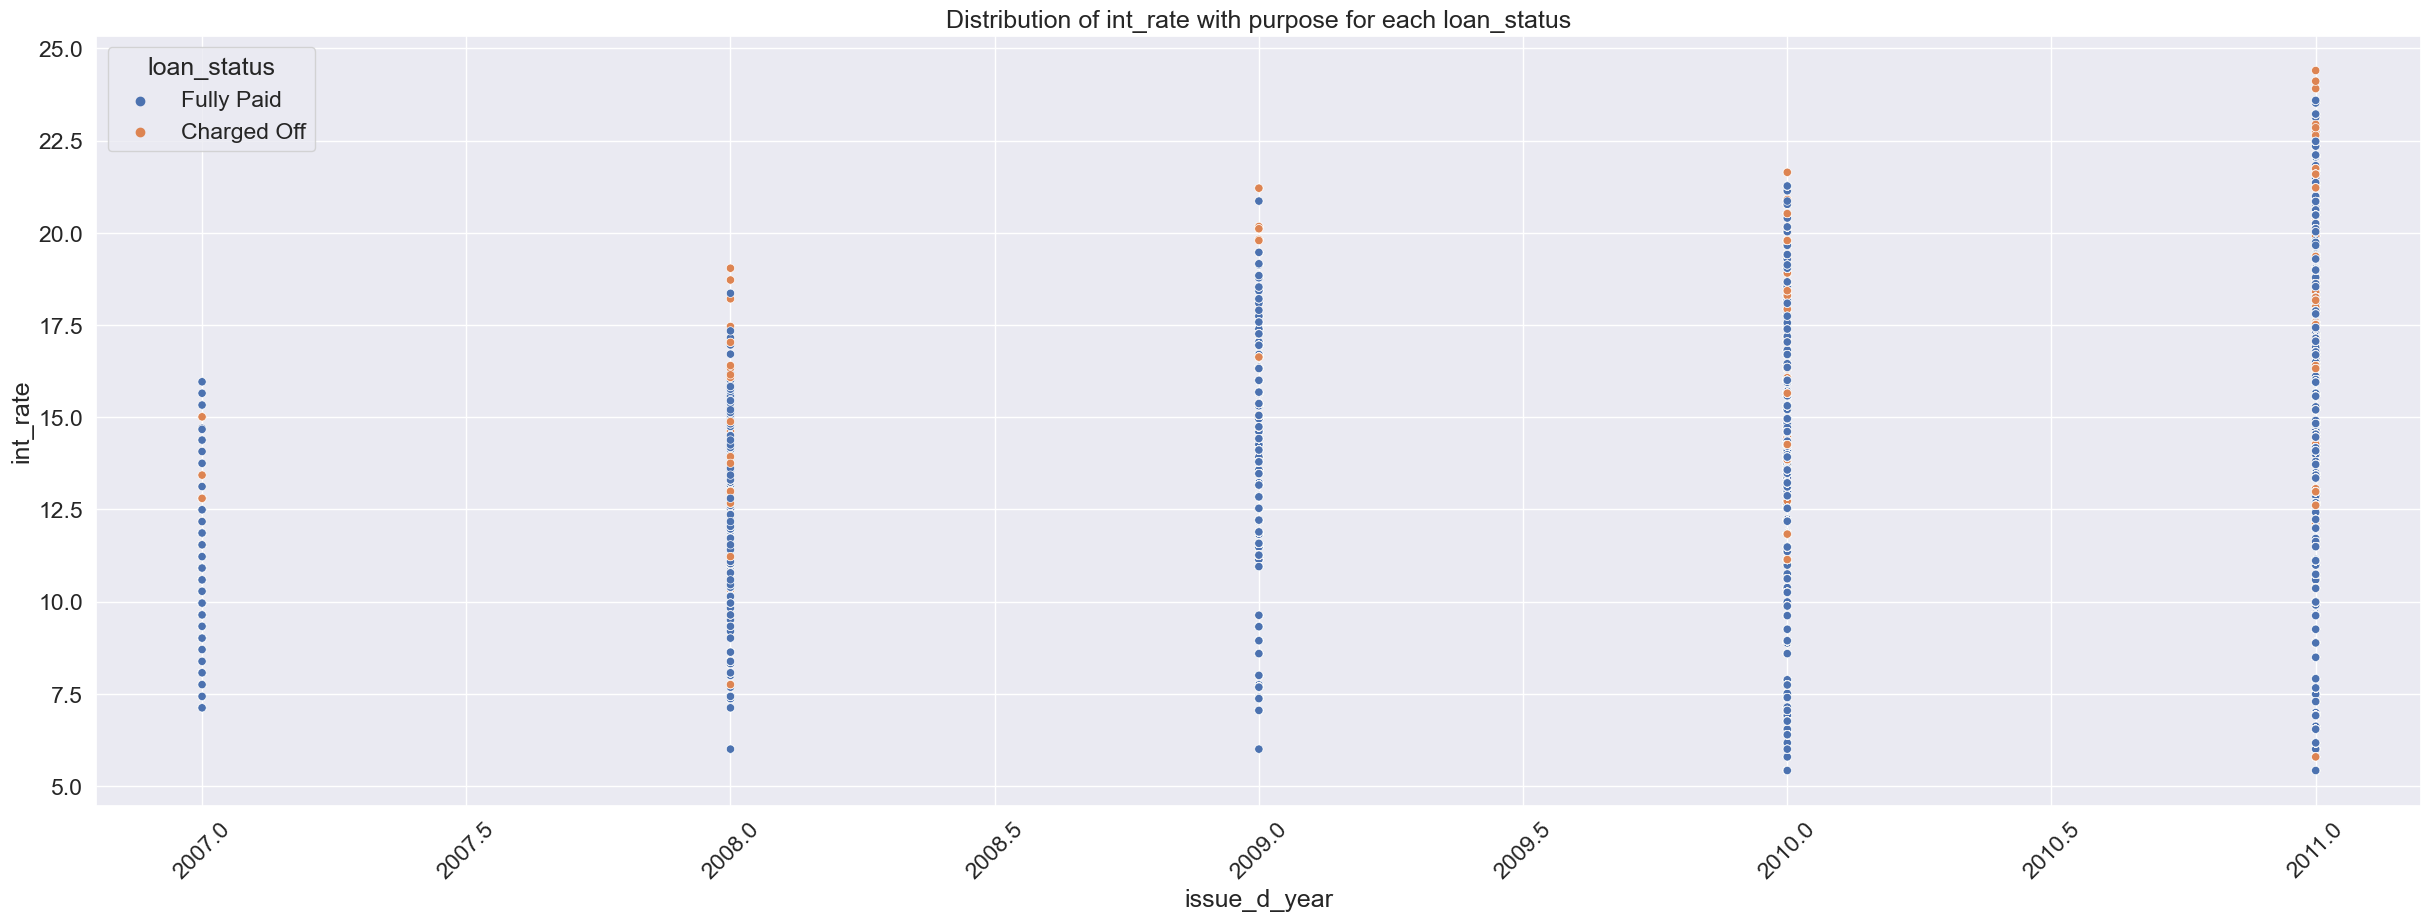

In [79]:
plt.figure(figsize=[30,10])
plt.title('Distribution of int_rate with purpose for each loan_status')
sns.scatterplot(data=loan_df, x='issue_d_year', y='int_rate',  hue='loan_status')
plt.xticks(rotation=45)
plt.show()

</br>
15. In 2007 interest rates were lower and it helped people to pay off loans on time.</br>
As year increasing, interest rate is increasing and so default rate percentage as well. LC need to keep interest_rate in check and should provide at medium rates to avoid high number of defaulters.
</br>

#### 5.1.6 interest_rate vs term

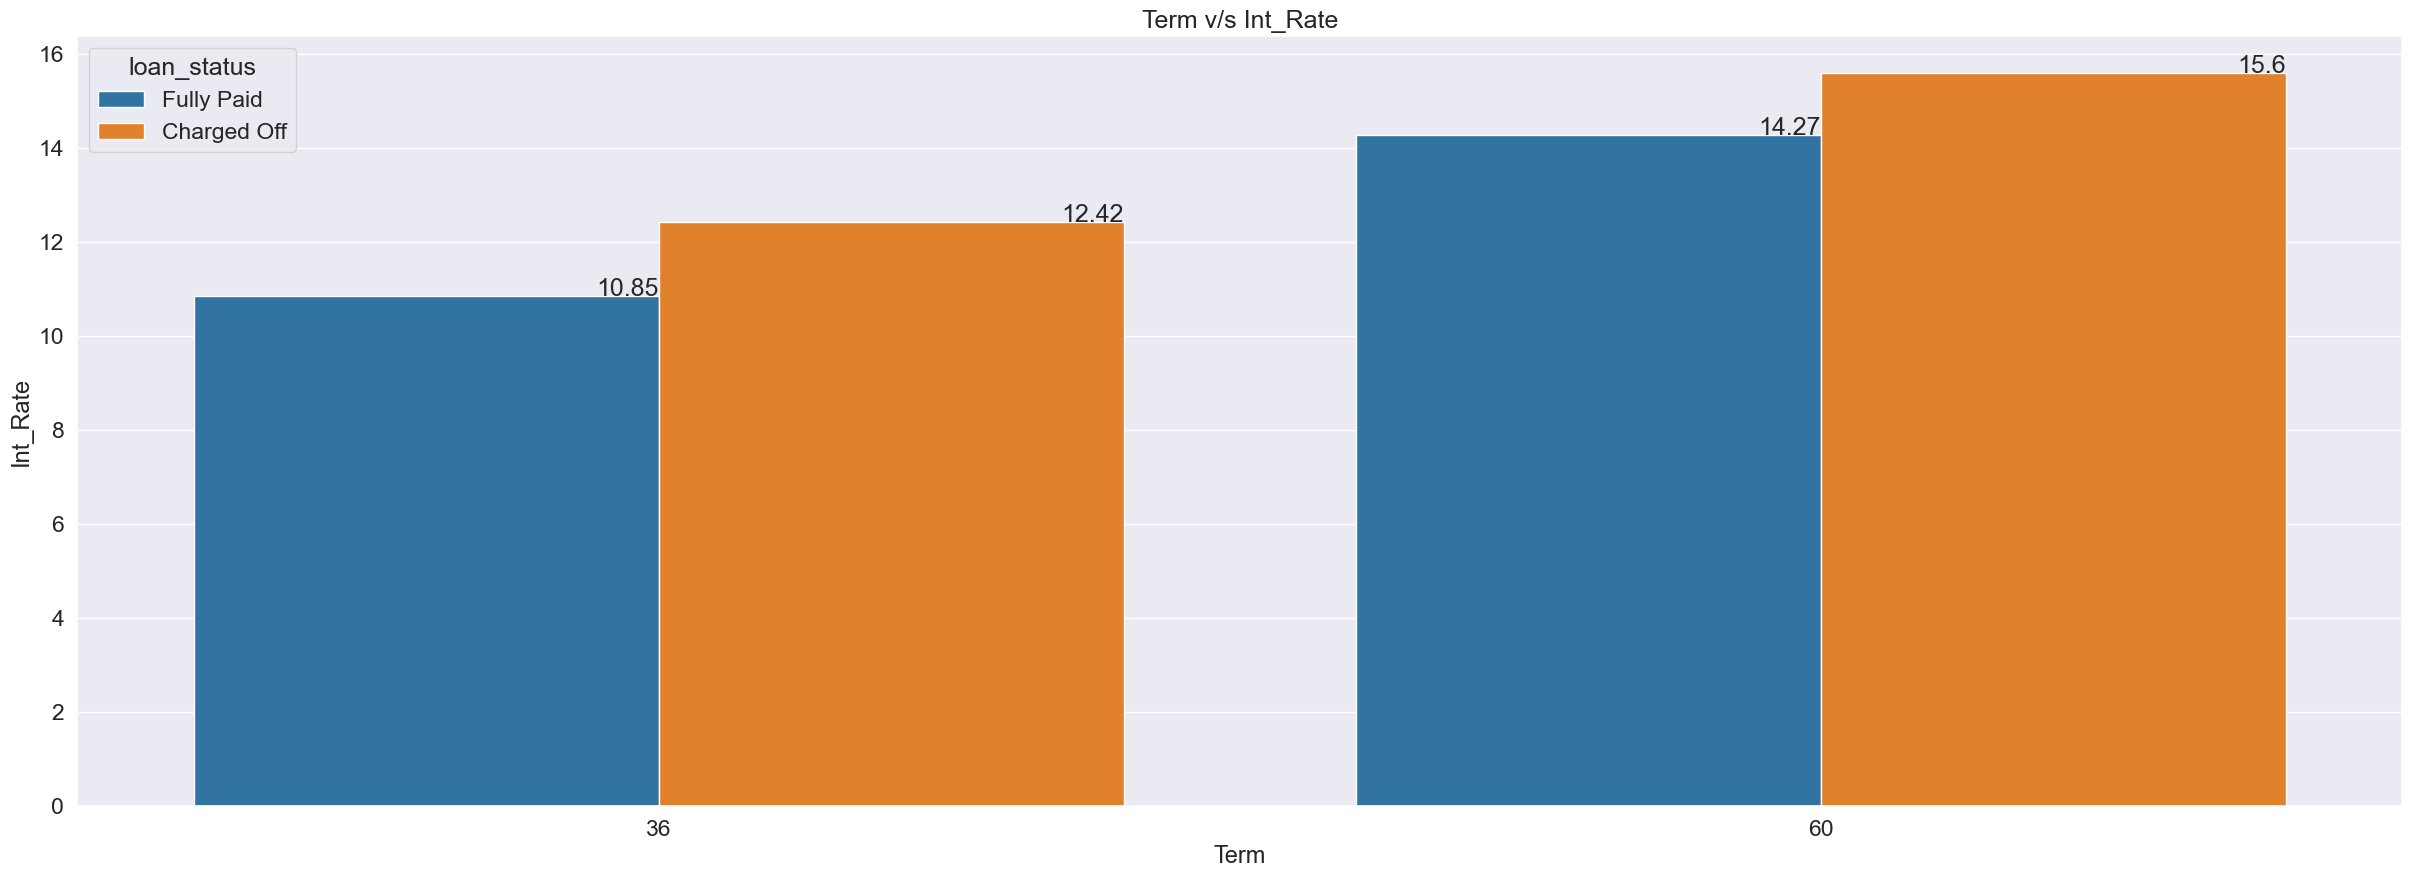

In [80]:
plot_bivariate('term', 'int_rate', s=[30,10], hues='loan_status' )

</br>
16. `Interest Rates` are generally more for the Charged Off loans and increases as the term of loan increases.
</br>

#### 5.1.7 interest_rate vs grade

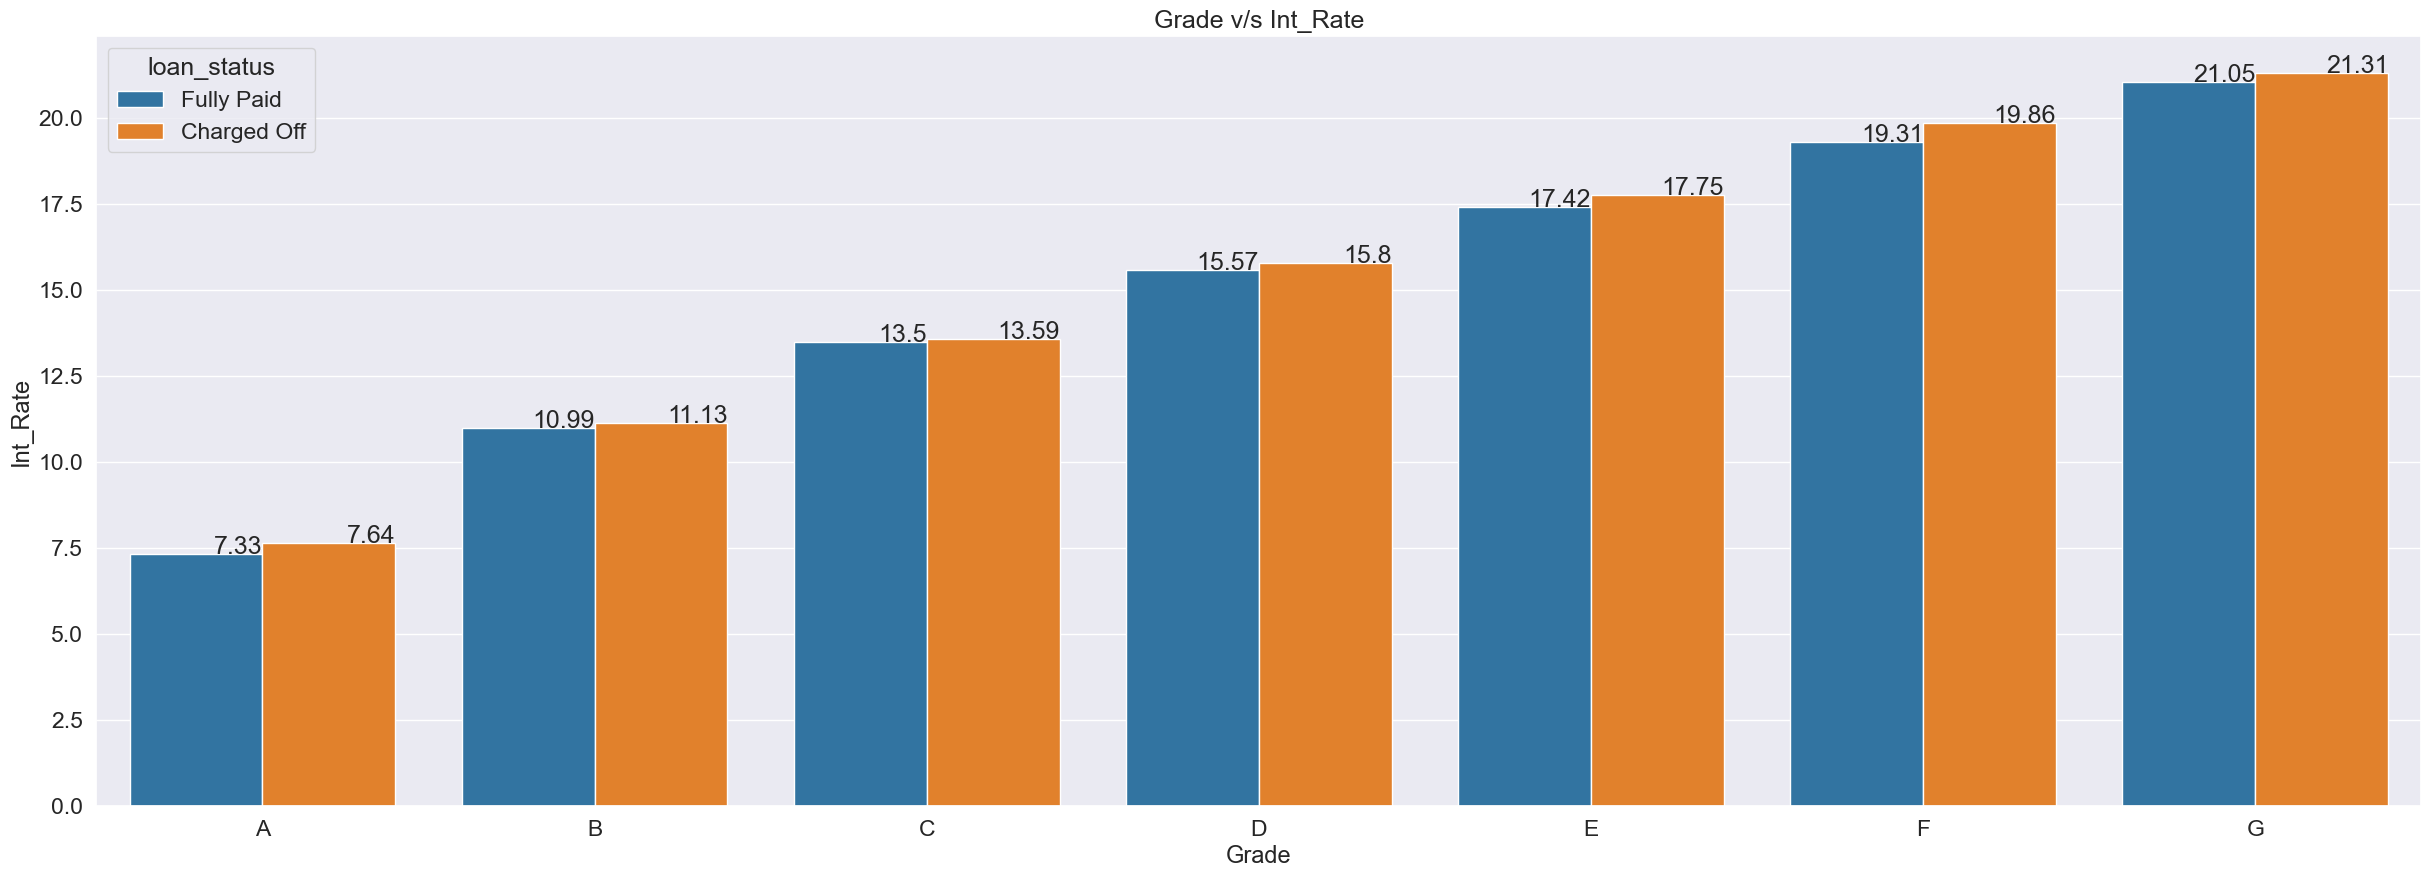

In [81]:
plot_bivariate('grade', 'int_rate', s=[30,10], hues='loan_status' )

</br>
17. As we saw ealier that higher grades have higher interest rates and so this obervation is not much usefull for our Analysis
</br>

#### 5.1.8 Understanding home_ownership vs loan_amnt vs verification_status

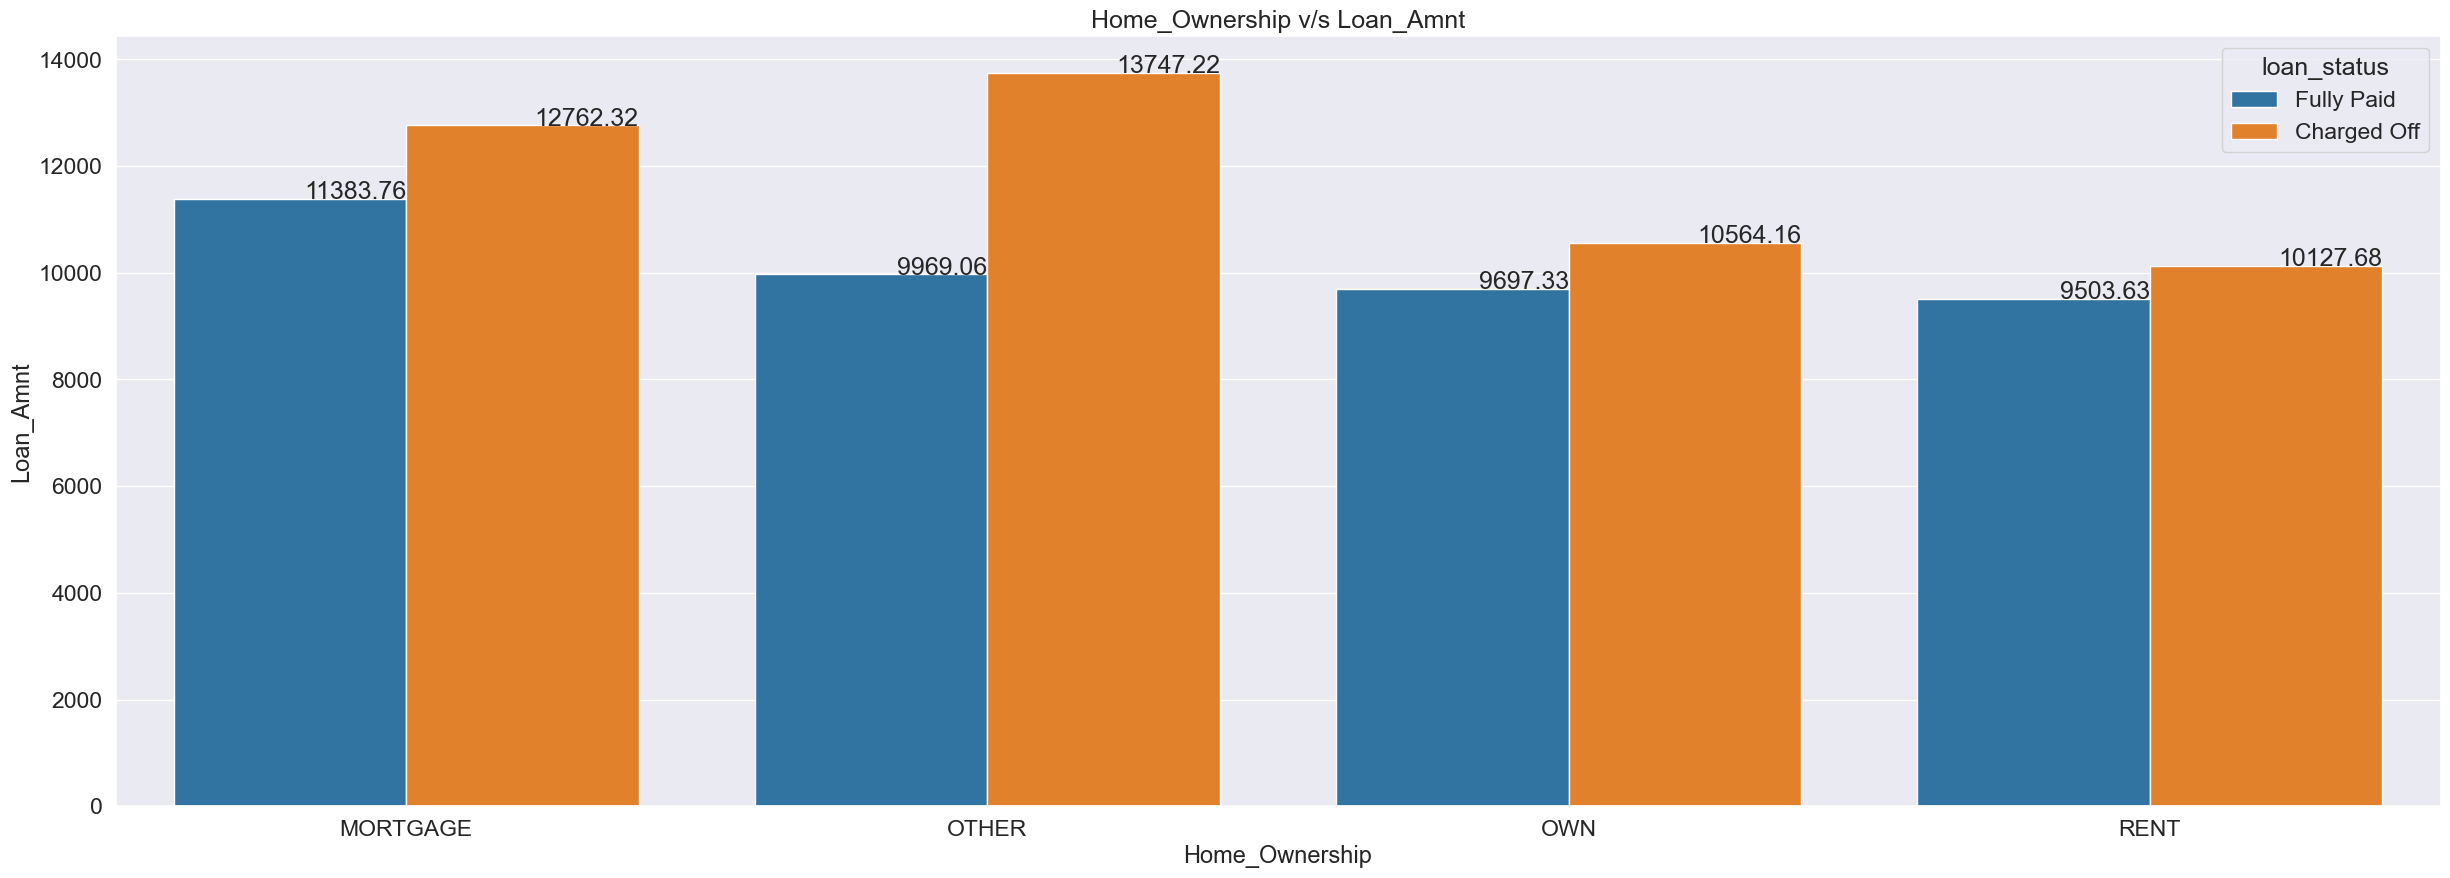

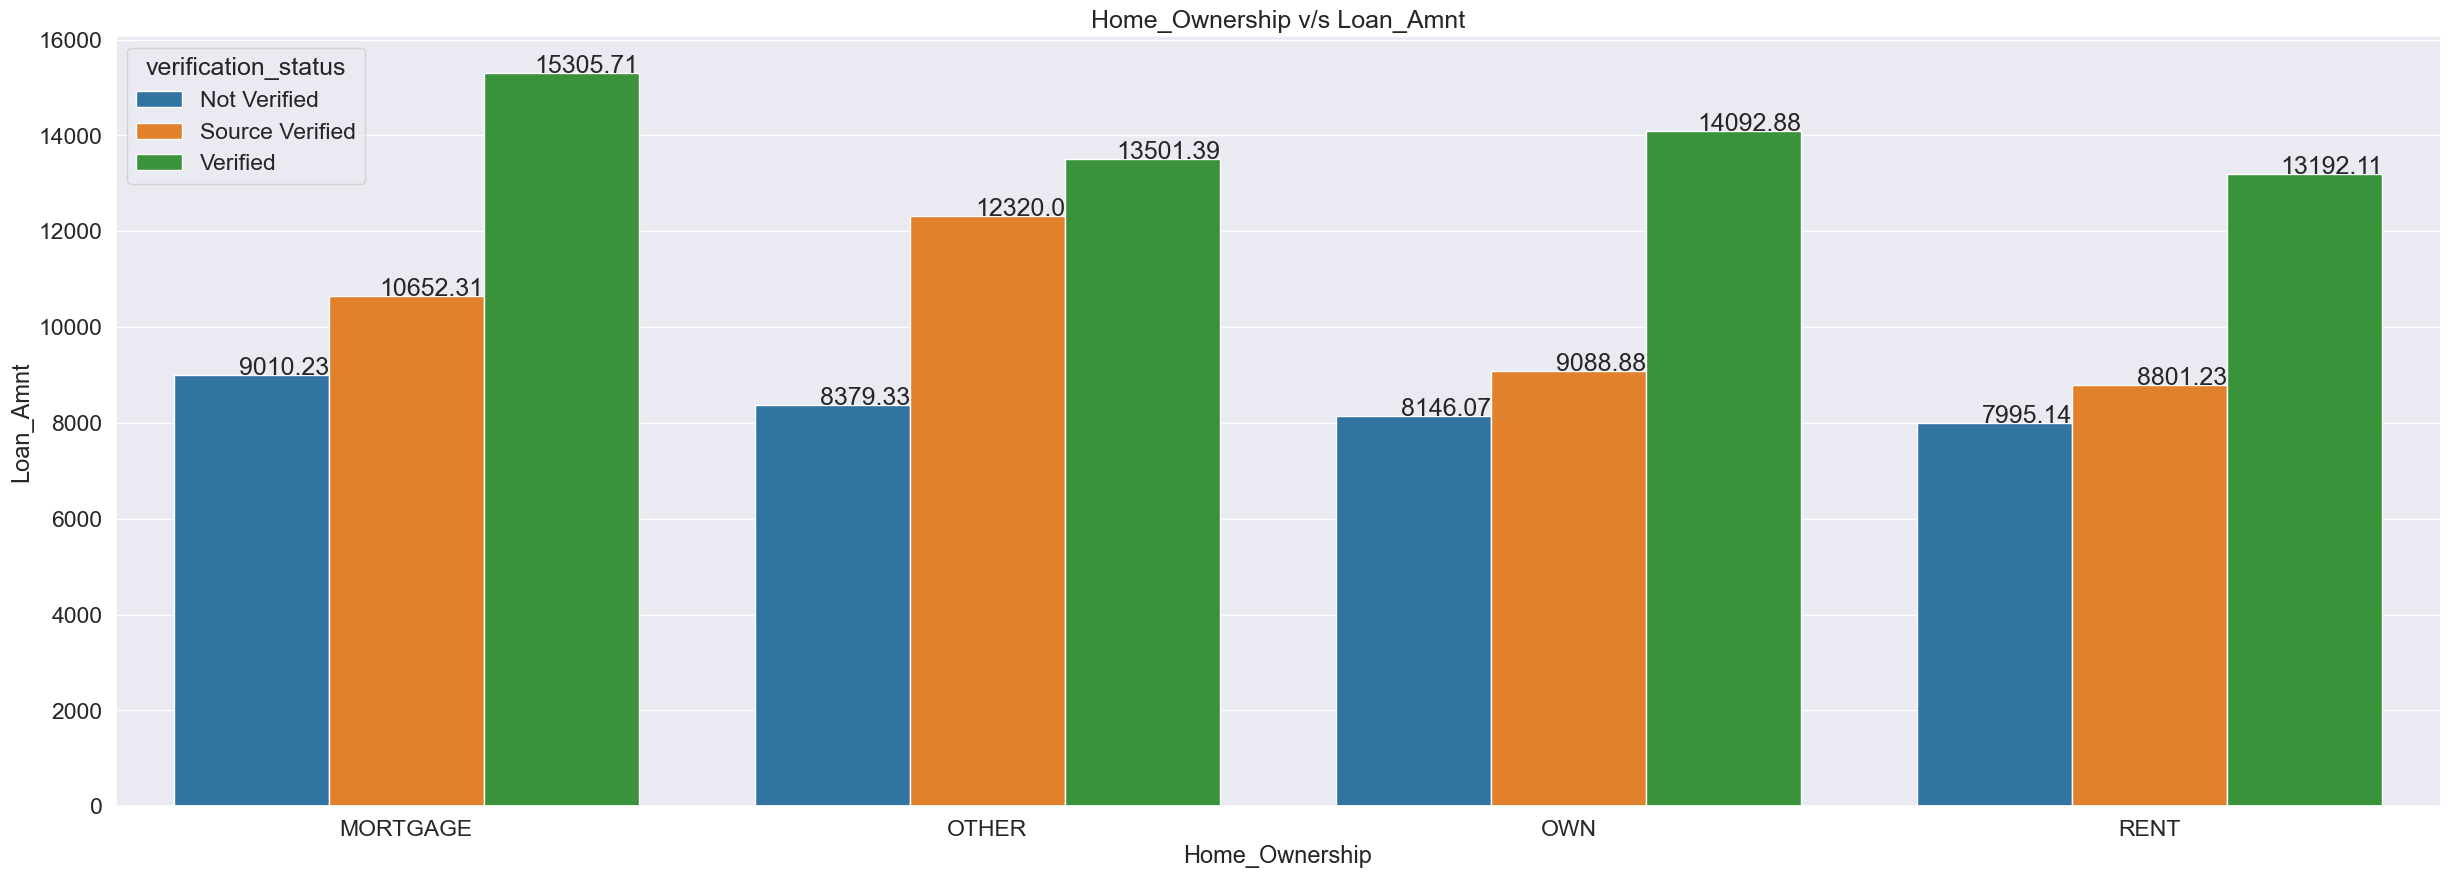

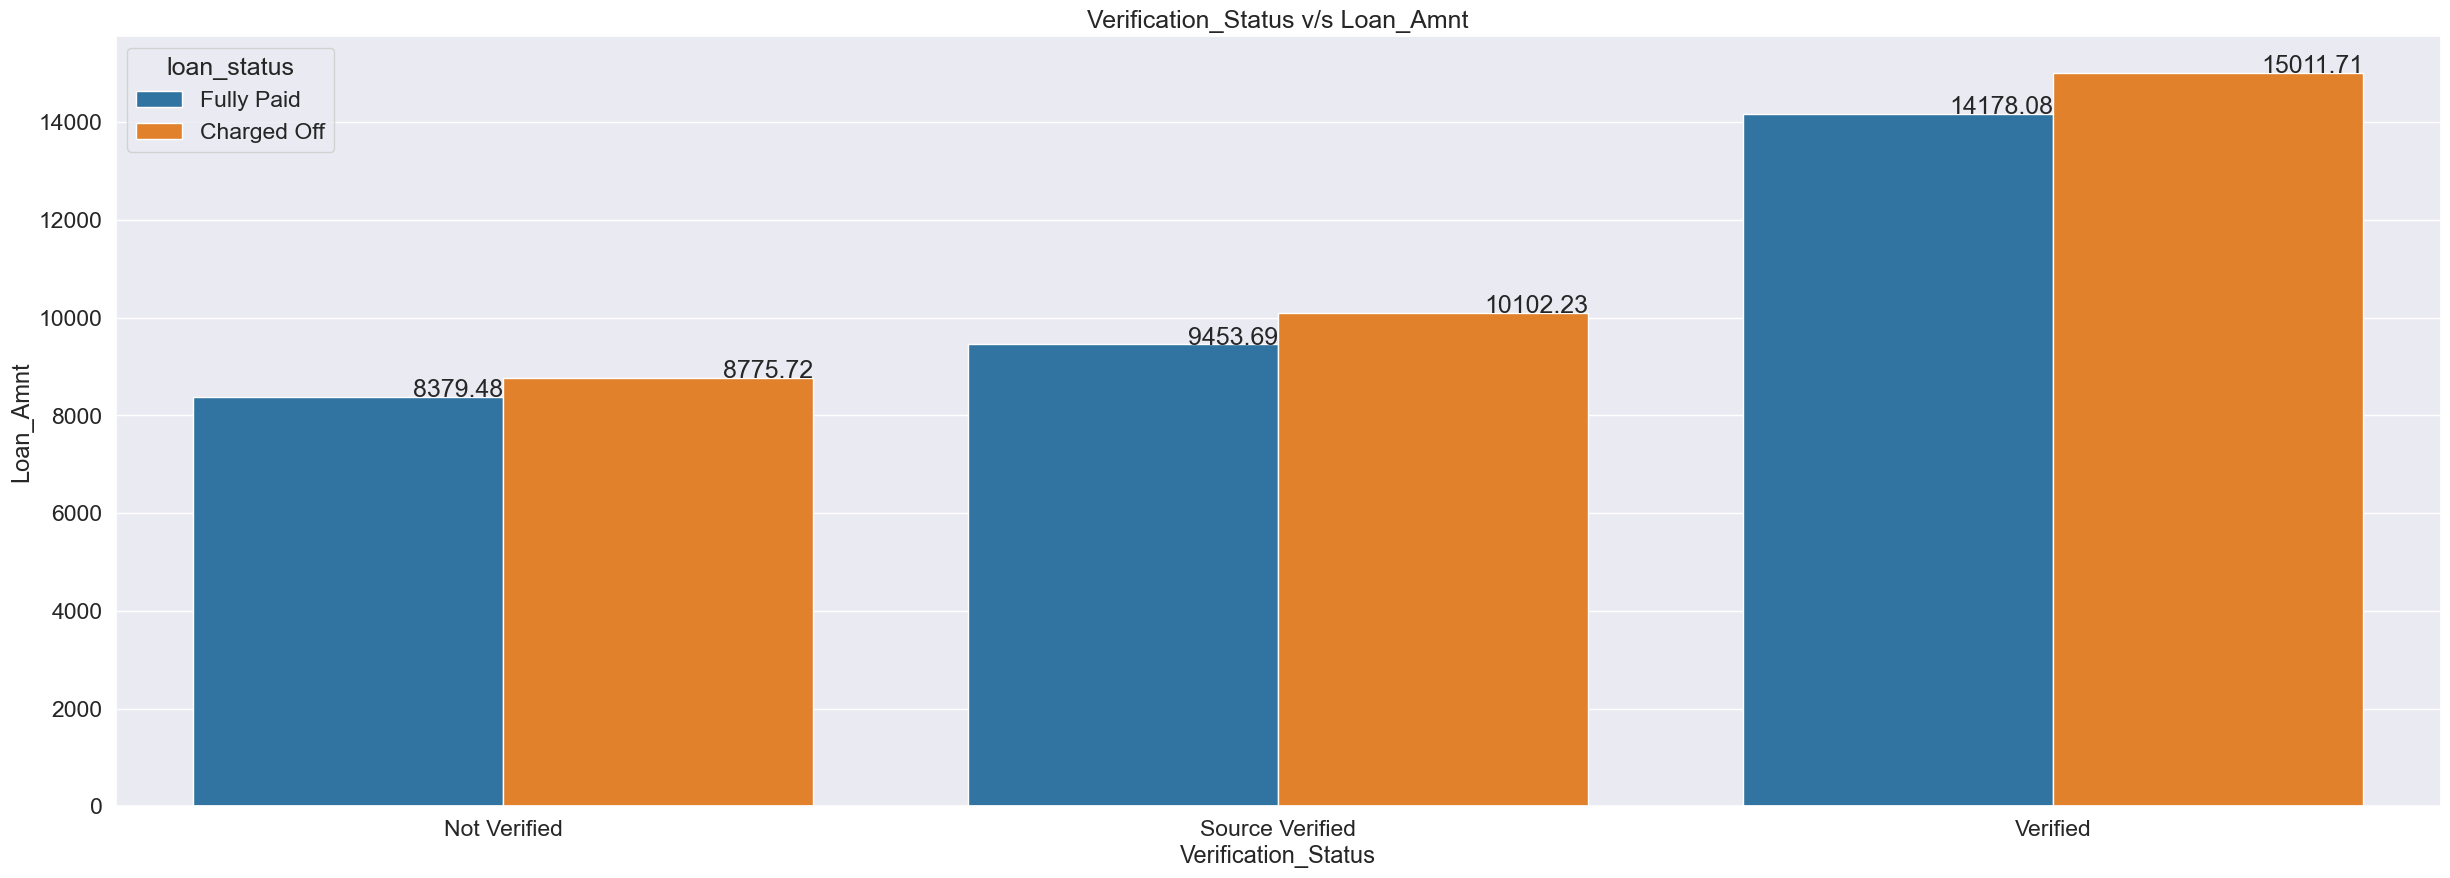

In [82]:
plot_bivariate('home_ownership', 'loan_amnt',  s=[30,10], hues='loan_status' )
plot_bivariate('home_ownership', 'loan_amnt',  s=[30,10], hues='verification_status')
plot_bivariate('verification_status', 'loan_amnt', s=[30,10], hues='loan_status')

</br>

18. Verified loans have on an average higher loan amount than others irrespective of home_ownership. However, as we saw before, Verified status loans also defaulted more than the other types. So combining these 3 graphsn it explains that it is due to the higher loan Amount on average that more verified loans default. Banks or lendes usually tend to give more loan amount if income is verified, which should be avoided.

</br>

#### 5.1.9 Understanding Interest Rates v/s DTI v/s annual income v/s verification status

We can divide dti it into bins of step size 6.

In [83]:
loan_df['dti_bin'] = pd.cut(loan_df['dti'], [x for x in range(0, 31, 5)], labels=[str(x)+'-'+str(x+5) for x in range (0, 29, 5)])

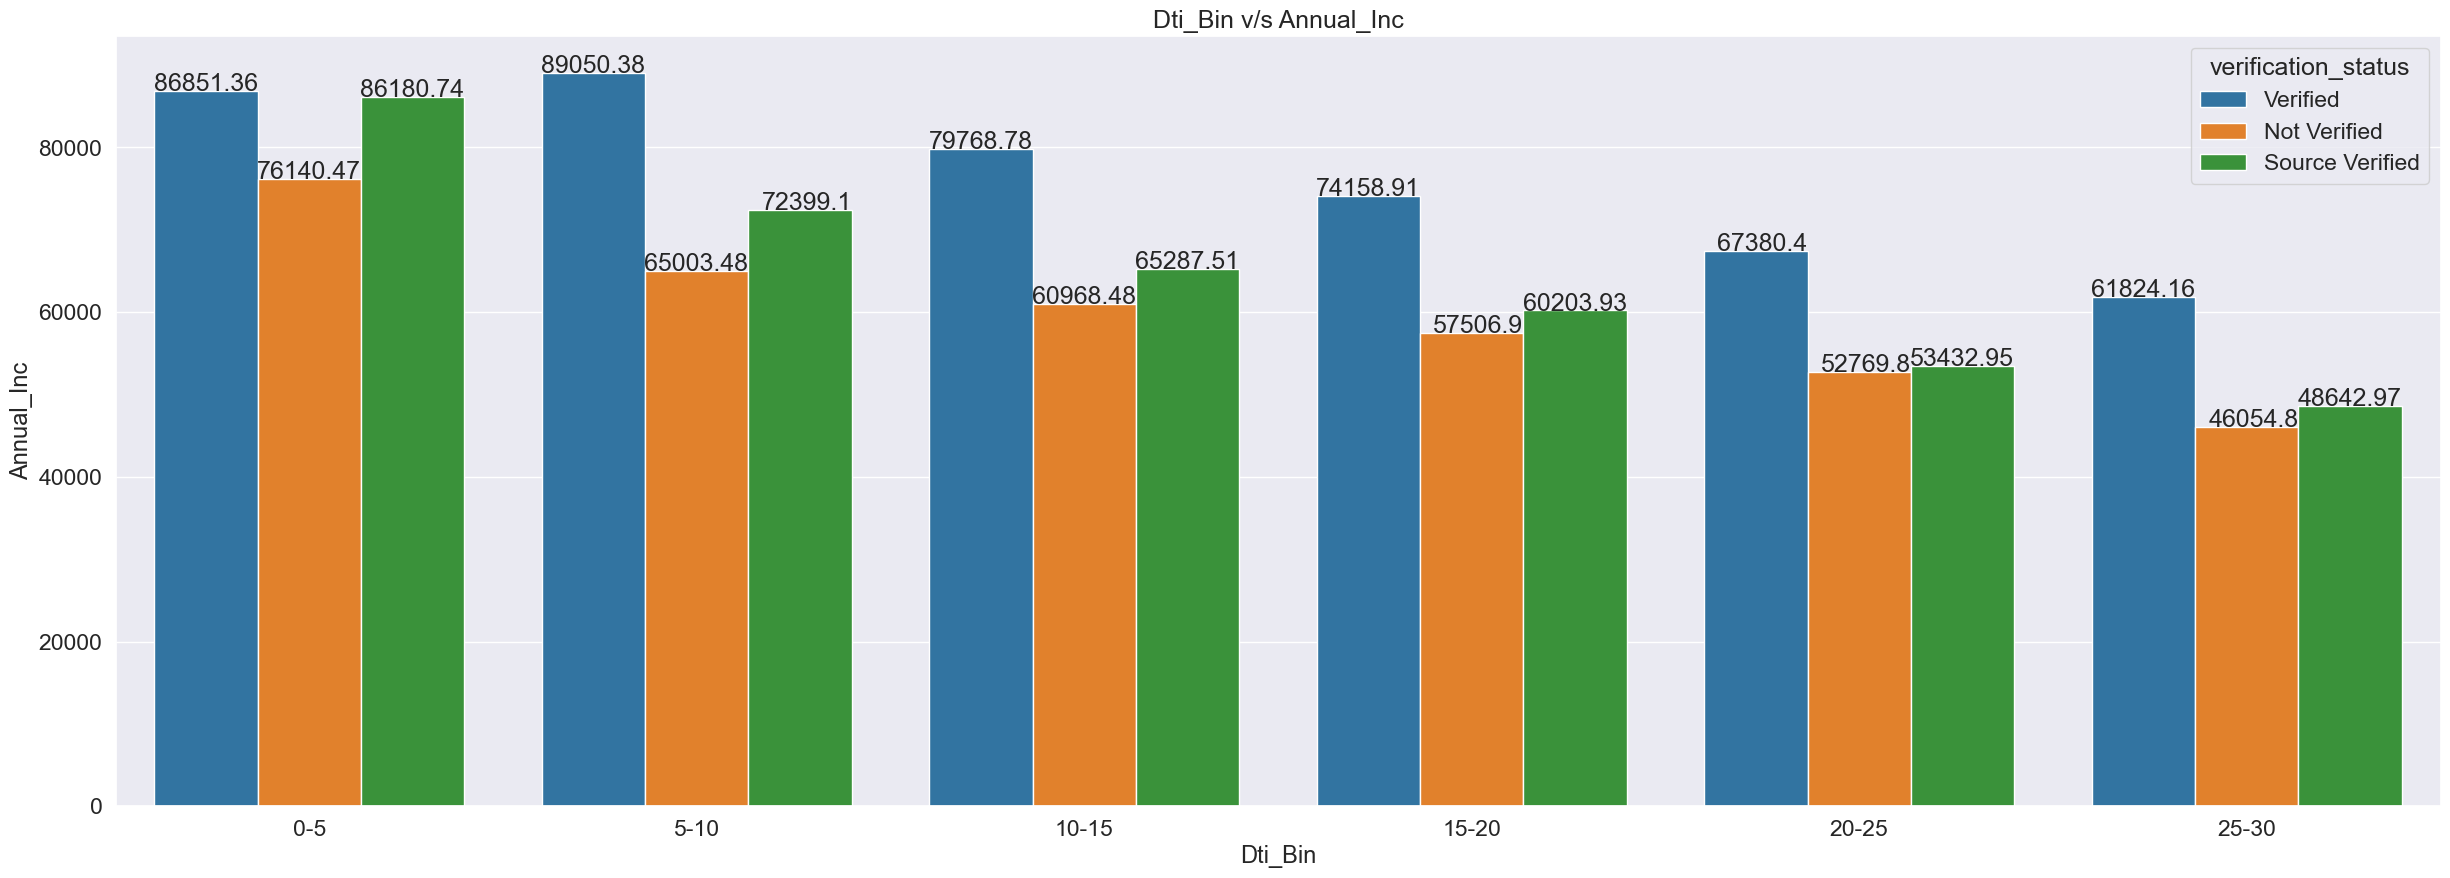

In [84]:
plot_bivariate('dti_bin', 'annual_inc', s=[30,10], hues='verification_status')

19 .**The interest rate increases very marginally as the DTI increases. However, it increases by a big margin across grades.
The overall annual income decreases as the DTI increases**
</br>

#### 5.1.10 Loan Amount v/s Installment buckets

In [85]:
loan_df.installment.describe(percentiles=[0.25,0.5,0.75,0.9,0.95])

count   36,463.00
mean       308.87
std        187.55
min         15.69
25%        164.87
50%        273.17
75%        407.17
90%        573.86
95%        680.27
max      1,022.93
Name: installment, dtype: float64

In [86]:
my_range = [x for x in range(0,700,100)]
my_range.append(1310)
lab_l = list('$'+ str(x)+'-'+str(x+100) for x in range (0, 600,100))
lab_l.append('$600+')
loan_df['installment_bin'] = pd.cut(loan_df['installment'], bins=my_range, labels=lab_l)

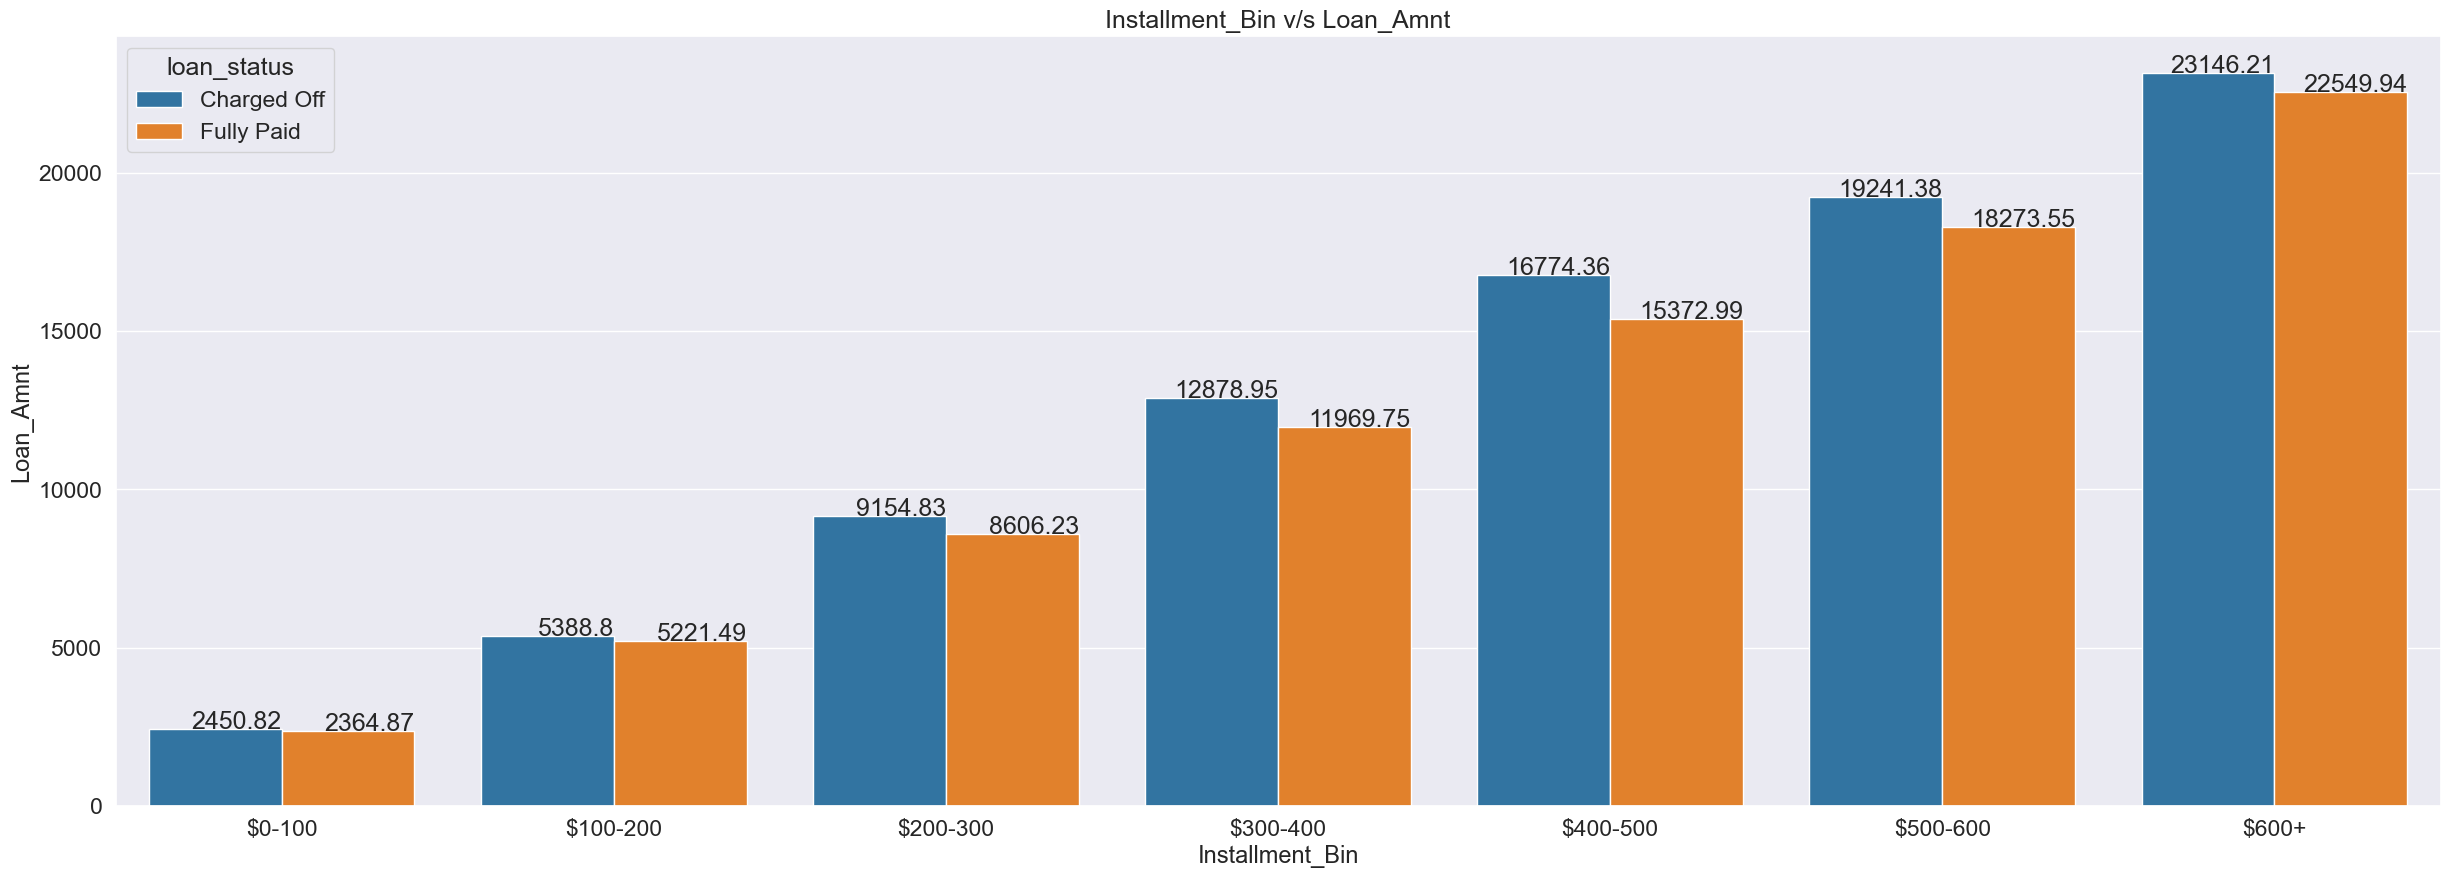

In [87]:
plot_bivariate('installment_bin', 'loan_amnt', s=[30,10], hues='loan_status')

</br> 
20. It is evident from plot that for higher loan amounts, the installments are also high. What's interesting is that the loan amount of charged off loans is linearly proportional to the installment.
</br>

#### 5.1.11 Understanding loan_amount v/s annual income v/s loan_status

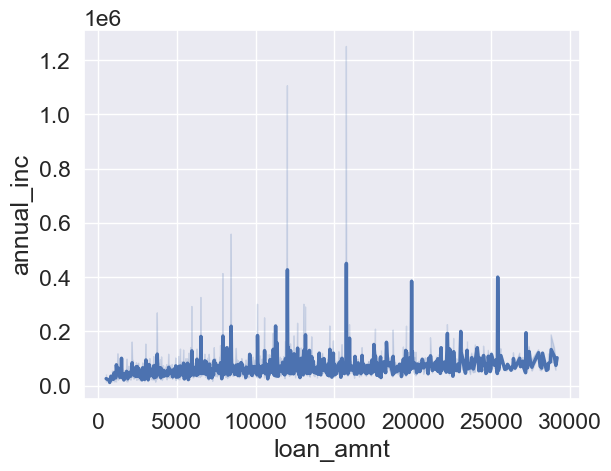

In [88]:
sns.lineplot(x='loan_amnt', y=loan_df['annual_inc'], data=loan_df, sizes=5)
plt.show()

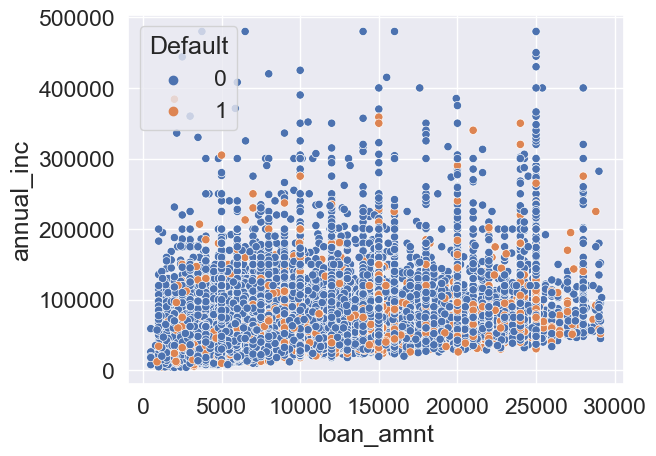

In [89]:
sns.scatterplot(y=loan_df[loan_df.annual_inc<500000].annual_inc, x=loan_df.loan_amnt, hue=loan_df.Default)
plt.show()

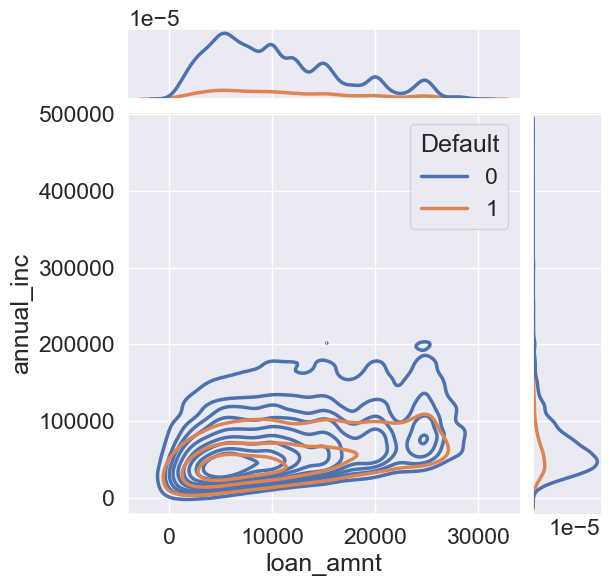

In [90]:
sns.jointplot(y=loan_df[loan_df.annual_inc<500000].annual_inc, x=loan_df.loan_amnt, hue=loan_df.Default, kind='kde')
plt.show()

</br>
21. A general trend can be seen that with lower Annual Income, the loan amount also decreases, i.e, as income increases average loan amount increases. However we can also see clusters forming for lower income group for defaulters. So Even though lower loan_amount is provided to lower income people, the default rate is high.
</br>

<h4>Heat Map of all numerical values</h4>

<Figure size 2000x1500 with 0 Axes>

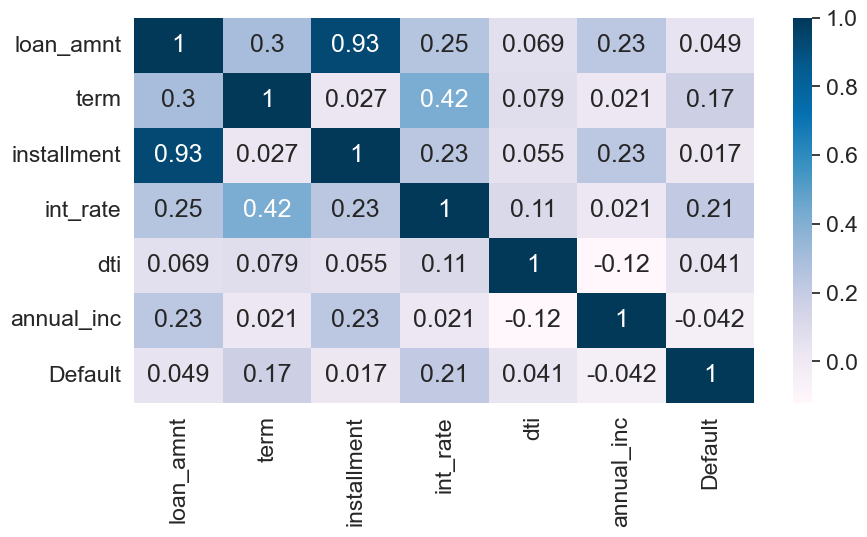

In [91]:
# Heatmap of correlation 
plt.figure(figsize=[20,15])

# creating temporary subset df to hold all numerica variable cols 
load_df_hm=loan_df.loc[:,['loan_amnt','term', 'installment', 'int_rate','dti', 'annual_inc', 'Default']]
plt.figure(figsize=(10, 5))

sns.heatmap(load_df_hm.corr(),cmap = 'PuBu' ,annot=True)
plt.show()

#### Post our plots, we can somewhat get an idea that it is kind of mixed scenerios at all variables, where charged_off rate and Fully_paid proportionally, w.r.t each variable and with-in subset of each variable.

#### So best approach is to take difference in default rate percentage between max and minimum for each variable and based on our analysis we can pick top 5

Let's take example of home_ownership

In [92]:
Variable_Distribution = loan_df.groupby(['home_ownership', 'Default']).Default.count().unstack().reset_index()
Variable_Distribution

Default home_ownership      0     1
0             MORTGAGE  13764  2086
1                OTHER     80    18
2                  OWN   2328   385
3                 RENT  15139  2663

In [93]:
Variable_Distribution['Total'] = Variable_Distribution[0] + Variable_Distribution[1]
Variable_Distribution['default_rate'] = Variable_Distribution[1] / Variable_Distribution['Total']*100
Variable_Distribution.sort_values('default_rate', ascending=False)
Variable_Distribution

Default home_ownership      0     1  Total  default_rate
0             MORTGAGE  13764  2086  15850         13.16
1                OTHER     80    18     98         18.37
2                  OWN   2328   385   2713         14.19
3                 RENT  15139  2663  17802         14.96

In [94]:
diff = round(Variable_Distribution.default_rate.max()-Variable_Distribution.default_rate.min(),2)
diff

5.21

#### Similarly creating a Dataframe for all variables.

In [95]:
#Creating a DataFrame with column name and its Default Rate


cols= ['Col_Name', 'Default_rate_difference']
var_default_max_diff = pd.DataFrame(columns=cols)

variables = ['term', 'issue_d_year', 'purpose', 'verification_status', 'home_ownership', 'emp_length', 'grade', 'sub_grade','loan_amnt', 'dti', 'annual_inc', 'installment', 'int_rate',]

for c in variables:
    Variable_Distribution = loan_df.groupby([loan_df[c], 'Default']).Default.count().unstack().reset_index()
    Variable_Distribution['Total'] = Variable_Distribution[0] + Variable_Distribution[1]
    Variable_Distribution['default_rate'] = Variable_Distribution[1] / Variable_Distribution['Total']*100
    Variable_Distribution.sort_values('default_rate', ascending=False)
    diff = round(Variable_Distribution.default_rate.max()-Variable_Distribution.default_rate.min(),2)
    
    var_default_max_diff = var_default_max_diff.append({'Col_Name': c, 'Default_rate_difference':diff},ignore_index=True)

In [96]:
var_default_max_diff.sort_values(by='Default_rate_difference', ascending=False)

Col_Name  Default_rate_difference
12             int_rate                    78.79
11          installment                    78.15
10           annual_inc                    72.30
8             loan_amnt                    71.97
9                   dti                    62.82
7             sub_grade                    46.03
6                 grade                    28.21
2               purpose                    16.23
0                  term                    13.97
1          issue_d_year                     5.49
4        home_ownership                     5.21
3   verification_status                     3.45
5            emp_length                     2.36

#### The higher the Default Rate Difference of a parameter, the higher will be the amount of information we get from that variable.


#### Therefore, we can pick the top 7 most appropriate columns from the table above. They are:-

 - 1. **`int_rate`** : Interest Rate on the loan
 - 2. **`installments`** : The monthly payment owed by the borrower if the loan originates. Indirectly it depends on int_rate, loan_amnt and term variables
 - 3. **`annual_inc`**  : The self-reported annual income provided by the borrower during registration.
 - 4. **`loan_amnt`**  : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
 - 5. **`dti`** : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
 - 6. **`grade and sub-grade`** : LC assigned loan grade
 - 7. **`purpose`** : A category provided by the borrower for the loan request. 

</br>

<h2><center>Final Conclusion</center></h2>

1. Though lending money at higher interest rate is profitable to the firm, at same time it can be dangerous as well as number of defaulters goes up. Hence:</br>

- The LC should not lend loans to people who fall in G or F or E grade as they are likely to default and they have higher interest rate.</br>
- While lending loans for these graded people, "purpose" should also be kept in consideration as above 15% interest rate purposes like credit_card, Small Business, debt_consolidation and home_improvement have more tendency to default.</br>

2. The LC should ensure that those who are being lent the loans at higher interest rates should have a higher income and low DTI.</br>
</br>
3. Loan amount should be decided by factoring it against the DTI, annual income , interest rates/ grade, purpose and number of installments.</br>
</br>
4. Income Verified people are likely to default more than the non-verified people which throws light on income verification process. This process needs to be improved. Additionally along with income verification, home_ownership verification must also be done as own home_ownership are also tending to default more.</br>
</br>
5. The people with low annual income have higher DTI and therefore more likely to default.</br>